<a href="https://colab.research.google.com/github/ITSAIDI/NLP_Chapitre/blob/main/Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ITSAIDI/NLP_Chapitre.git

Cloning into 'NLP_Chapitre'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 98 (delta 26), reused 15 (delta 5), pack-reused 0
Receiving objects: 100% (98/98), 48.24 MiB | 7.02 MiB/s, done.
Resolving deltas: 100% (26/26), done.
Updating files: 100% (32/32), done.


In [2]:
!cp /content/NLP_Chapitre/utils.py /content

In [ ]:
!pip install -r /content/NLP_Chapitre/requirements.txt

# Les Concepts de base :

## Libraries:

**A messege to restart will appear , just click restart**

In [ ]:
!pip install -U pip setuptools wheel

In [ ]:
!pip install -U spacy
!python -m spacy download en_core_web_sm
!python -m spacy download fr_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 19.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 21.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Restart the Kernel
exit(0)

In [ ]:
!pip install openai

## Cosine Similarity :

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Define the two vectors representing your documents
doc1 = np.array([3, 2, 0, 1, 4])
doc2 = np.array([1, 3, 1, 2, 0])

# Calculate cosine similarity
cosine_sim = cosine_similarity([doc1], [doc2])[0][0]

# Calculate cosine distance (complement of cosine similarity)
cosine_dist = 1 - cosine_sim

print(f"Cosine Similarity: {cosine_sim}")
print(f"Cosine Distance: {cosine_dist}")

Cosine Similarity: 0.5185449728701348
Cosine Distance: 0.4814550271298652


## Tokenization :

In [ ]:
import spacy
nlp = spacy.load('fr_core_news_sm') # French Language model

In [ ]:
Text = "Je veux comprendre le NLP"
doc = nlp(Text)

In [ ]:
for token in doc:
    print(token)

In [ ]:
# token here in an Object from the class Token of Spacy
token = doc[4]
print(token)
print(token.like_num)

In [ ]:
# Extract emails from a text with spacy
Text = "Cher client,Nous vous remercions pour votre commande passée sur notre site.Votre colis sera expédié demain matin. Merci pour votre confiance.Si vous avez des questions, n'hésitez pas à nous contacter à l'adresse suivante : support@exemple.com. De plus, pour toute demande de remboursement, veuillez nous écrire à refunds@exemple.com."
doc = nlp(Text)
for token in doc:
    if token.like_email:
        print(token)

## Lemmatization :

In [ ]:
import spacy

# English pipelines include a rule-based lemmatizer
nlp = spacy.load("en_core_web_sm")
lemmatizer = nlp.get_pipe("lemmatizer")
print(lemmatizer.mode)  # 'rule'

doc = nlp("I was reading the paper.")
print([token.lemma_ for token in doc])
# ['I', 'be', 'read', 'the', 'paper', '.']

## POS Tagging :

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
    print(token.text,token.pos_)


## Text representation (Vector Space Model) :


### BOW :

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Sample sentences
sentences = ["The cat in the hat",
"The dog in the house", "The bird in the sky"]
# Create a CountVectorizer object
vectorizer = CountVectorizer()
# Use the fit_transform method to transform the sentences into a bag of words
bow = vectorizer.fit_transform(sentences)
# Print the vocabulary (features) of the bag of words
print(vectorizer.get_feature_names_out())
# Print the bag of words
print(bow.toarray())


### N-Gram :
- Insted of creating a vocabulary singular tokens , we can create n-grams.(more meaningful)
- N-gram with single words is the BOW.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,1))
text = "My name is Simon, and I live in London"
vectorizer.fit([text])
vectorizer.vocabulary_


### TF-IDF :

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Example documents
docs = ["The cat jumped",
        "The white tiger roared",
        "Bird flying in the sky"]
# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()
# Use the fit_transform method to transform the documents into a TF-IDF matrix
tfidf = vectorizer.fit_transform(docs)
# Print the vocabulary (features) of the TF-IDF matrix
print(vectorizer.get_feature_names_out())
# Print the TF-IDF matrix
print(tfidf.toarray())


['bird' 'cat' 'flying' 'in' 'jumped' 'roared' 'sky' 'the' 'tiger' 'white']
[[0.         0.65249088 0.         0.         0.65249088 0.
  0.         0.38537163 0.         0.        ]
 [0.         0.         0.         0.         0.         0.54645401
  0.         0.32274454 0.54645401 0.54645401]
 [0.47952794 0.         0.47952794 0.47952794 0.         0.
  0.47952794 0.28321692 0.         0.        ]]


### Word Embidding :

#### Word2Vec :

In [ ]:
import spacy
from gensim.models import Word2Vec

# Load the English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

# Sample text corpus
corpus = [
    "Natural Language Processing (NLP) is a subfield of artificial intelligence concerned with the interaction between computers and humans through natural language.",
    "NLP techniques are used to analyze, understand, and generate human language in a meaningful way.",
    "NLP applications include sentiment analysis, machine translation, and text summarization, among others."
]

# Tokenize the corpus using spaCy
tokenized_corpus = [[token.text.lower() for token in nlp(sentence)] for sentence in corpus]

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Get word vector for a specific word
word_vector = model.wv["nlp"]
print("Vector representation of 'NLP':", word_vector)

# Find similar words
similar_words = model.wv.most_similar("nlp")
print("The most similar to 'NLP':", similar_words[0])


#### FastText :

In [ ]:
import spacy
from gensim.models import FastText

model = FastText(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)
# Get word vector for a specific word
word_vector = model.wv["nlp"]
print("Vector representation of 'NLP':", word_vector)
# Find similar words
similar_words = model.wv.most_similar("nlp")
print("The most similar to 'NLP':", similar_words[0:3])


#### GPT :

In [ ]:
import openai

openai.api_key = "YOUR_API_KEY"
text = "Natural Language Processing (NLP) is a subfield of artificial intelligence concerned with the interaction between computers and humans through natural language."
response = openai.Completion.create(engine="text-embedding-ada-002", prompt=text, max_tokens=50)
embedding = response["choices"][0]["embedding"]
print("Embedding:", embedding)


# NLP with Classification models : Sentiment Analitycs

## Libraries

In [ ]:
!pip install -U nltk

## Import Functions and Data

In [ ]:
# run this cell to import nltk
import nltk
from os import getcwd

nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Imported Functions


In [ ]:
import re
import string
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean


def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs


In [ ]:
import numpy as np
import pandas as pd
from nltk.corpus import twitter_samples

### Prepare the Data
* The `twitter_samples` contains subsets of five thousand positive_tweets, five thousand negative_tweets, and the full set of 10,000 tweets.  
    * If you used all three datasets, we would introduce duplicates of the positive tweets and negative tweets.  
    * You will select just the five thousand positive tweets and five thousand negative tweets.

In [ ]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

* Train test split: 20% will be in the test set, and 80% in the training set.


In [ ]:
# split the data into two pieces, one for training and one for testing (validation set)
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg
test_x = test_pos + test_neg

* Create the numpy array of positive labels and negative labels.

In [ ]:
# combine positive and negative labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [ ]:
# Print the shape train and test sets
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

train_y.shape = (8000, 1)
test_y.shape = (2000, 1)


* Create the frequency dictionary using build_freqs function.  
   

```Python
    for y,tweet in zip(ys, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
```
* Notice how the outer for loop goes through each tweet, and the inner for loop steps through each word in a tweet.
* The 'freqs' dictionary is the frequency dictionary that's being built.
* The key is the tuple (word, label), such as ("happy",1) or ("happy",0).  The value stored for each key is the count of how many times the word "happy" was associated with a positive label, or how many times "happy" was associated with a negative label.

In [ ]:
# create frequency dictionary
freqs = build_freqs(train_x, train_y)

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11427


### Process Tweet
The given function 'process_tweet' tokenizes the tweet into individual words, removes stop words and applies stemming.

In [ ]:
# test the function below
print('This is an example of a positive tweet: \n', train_x[0])
print('\nThis is an example of the processed version of the tweet: \n', process_tweet(train_x[0]))

This is an example of a positive tweet: 
 #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)

This is an example of the processed version of the tweet: 
 ['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']


<a name='1'></a>
## 1 - Logistic Regression

<a name='1-1'></a>
### 1.1 - Sigmoid
You will learn to use logistic regression for text classification.
* The sigmoid function is defined as:

$$ h(z) = \frac{1}{1+\exp^{-z}} \tag{1}$$

It maps the input 'z' to a value that ranges between 0 and 1, and so it can be treated as a probability.


In [ ]:
def sigmoid(z):
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    '''

    ### START CODE HERE ###
    # calculate the sigmoid of z
    h = 1/(1+np.exp(-z))
    ### END CODE HERE ###

    return h

In [ ]:
# Testing your function
if (sigmoid(0) == 0.5):
    print('SUCCESS!')
else:
    print('Oops!')

if (sigmoid(4.92) == 0.9927537604041685):
    print('CORRECT!')
else:
    print('Oops again!')

SUCCESS!
CORRECT!


### 1.2 - Cost function and Gradient

The cost function used for logistic regression is the average of the log loss across all training examples:

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)}))\tag{5} $$
* $m$ is the number of training examples
* $y^{(i)}$ is the actual label of training example 'i'.
* $h(z^{(i)})$ is the model's prediction for the training example 'i'.

The loss function for a single training example is
$$ Loss = -1 \times \left( y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)})) \right)$$

* All the $h$ values are between 0 and 1, so the logs will be negative. That is the reason for the factor of -1 applied to the sum of the two loss terms.
* Note that when the model predicts 1 ($h(z(\theta)) = 1$) and the label 'y' is also 1, the loss for that training example is 0.
* Similarly, when the model predicts 0 ($h(z(\theta)) = 0$) and the actual label is also 0, the loss for that training example is 0.
* However, when the model prediction is close to 1 ($h(z(\theta)) = 0.9999$) and the label is 0, the second term of the log loss becomes a large negative number, which is then multiplied by the overall factor of -1 to convert it to a positive loss value. $-1 \times (1 - 0) \times log(1 - 0.9999) \approx 9.2$ The closer the model prediction gets to 1, the larger the loss.

* Likewise, if the model predicts close to 0 ($h(z) = 0.0001$) but the actual label is 1, the first term in the loss function becomes a large number: $-1 \times log(0.0001) \approx 9.2$.  The closer the prediction is to zero, the larger the loss.

#### Update the weights

To update your weight vector $\theta$, you will apply gradient descent to iteratively improve your model's predictions.  
The gradient of the cost function $J$ with respect to one of the weights $\theta_j$ is:

$$\nabla_{\theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^m(h^{(i)}-y^{(i)})x^{(i)}_j \tag{5}$$
* 'i' is the index across all 'm' training examples.
* 'j' is the index of the weight $\theta_j$, so $x^{(i)}_j$ is the feature associated with weight $\theta_j$

* To update the weight $\theta_j$, we adjust it by subtracting a fraction of the gradient determined by $\alpha$:
$$\theta_j = \theta_j - \alpha \times \nabla_{\theta_j}J(\theta) $$
* The learning rate $\alpha$ is a value that we choose to control how big a single update will be.


**Implement gradient descent function.**
* The number of iterations 'num_iters" is the number of times that you'll use the entire training set.
* For each iteration, you'll calculate the cost function using all training examples (there are 'm' training examples), and for all features.
* Instead of updating a single weight $\theta_i$ at a time, we can update all the weights in the column vector:  
$$\mathbf{\theta} = \begin{pmatrix}
\theta_0
\\
\theta_1
\\
\theta_2
\\
\vdots
\\
\theta_n
\end{pmatrix}$$
* $\mathbf{\theta}$ has dimensions (n+1, 1), where 'n' is the number of features, and there is one more element for the bias term $\theta_0$ (note that the corresponding feature value $\mathbf{x_0}$ is 1).
* The 'logits', 'z', are calculated by multiplying the feature matrix 'x' with the weight vector 'theta'.  $z = \mathbf{x}\mathbf{\theta}$
    * $\mathbf{x}$ has dimensions (m, n+1)
    * $\mathbf{\theta}$: has dimensions (n+1, 1)
    * $\mathbf{z}$: has dimensions (m, 1)
* The prediction 'h', is calculated by applying the sigmoid to each element in 'z': $h(z) = sigmoid(z)$, and has dimensions (m,1).
* The cost function $J$ is calculated by taking the dot product of the vectors 'y' and 'log(h)'.  Since both 'y' and 'h' are column vectors (m,1), transpose the vector to the left, so that matrix multiplication of a row vector with column vector performs the dot product.
$$J = \frac{-1}{m} \times \left(\mathbf{y}^T \cdot log(\mathbf{h}) + \mathbf{(1-y)}^T \cdot log(\mathbf{1-h}) \right)$$
* The update of theta is also vectorized.  Because the dimensions of $\mathbf{x}$ are (m, n+1), and both $\mathbf{h}$ and $\mathbf{y}$ are (m, 1), we need to transpose the $\mathbf{x}$ and place it on the left in order to perform matrix multiplication, which then yields the (n+1, 1) answer we need:
$$\mathbf{\theta} = \mathbf{\theta} - \frac{\alpha}{m} \times \left( \mathbf{x}^T \cdot \left( \mathbf{h-y} \right) \right)$$

In [ ]:
def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    '''
    # get 'm', the number of rows in matrix x
    m = len(y)

    for i in range(0, num_iters):
        # get z, the dot product of x and theta
        z = np.dot(x, theta)

        # get the sigmoid of z
        h = 1 / (1 + np.exp(-z))

        # calculate the cost function
        J = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

        # update the weights theta
        theta = theta - (alpha / m) * np.dot(x.T, (h - y))

    return J, theta


In [ ]:
# Check the function
# Construct a synthetic test case using numpy PRNG functions
np.random.seed(1)
# X input is 10 x 3 with ones for the bias terms
tmp_X = np.append(np.ones((10, 1)), np.random.rand(10, 2) * 2000, axis=1)
# Y Labels are 10 x 1
tmp_Y = (np.random.rand(10, 1) > 0.35).astype(float)

# Apply gradient descent
tmp_J, tmp_theta = gradientDescent(tmp_X, tmp_Y, np.zeros((3, 1)), 1e-8, 700)
print(f"The cost after training is {tmp_J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(tmp_theta)]}")

The cost after training is 0.67094970.
The resulting vector of weights is [4.1e-07, 0.00035658, 7.309e-05]


### 1.3 Extracting the Features



* Given a list of tweets, extract the features and store them in a matrix. You will extract two features.
    * The first feature is the number of positive words in a tweet.
    * The second feature is the number of negative words in a tweet.
* Then train your logistic regression classifier on these features.
* Test the classifier on a validation set.

Implement the extract_features function.
* This function takes in a single tweet.
* Process the tweet using the imported `process_tweet` function and save the list of tweet words.
* Loop through each word in the list of processed words
    * For each word, check the 'freqs' dictionary for the count when that word has a positive '1' label. (Check for the key (word, 1.0)
    * Do the same for the count for when the word is associated with the negative label '0'. (Check for the key (word, 0.0).)

**Note:** In the implementation instructions provided above, the prediction of being positive or negative depends on feature vector which counts-in duplicate words.

In [ ]:
def extract_features(tweet, freqs, process_tweet=process_tweet):
    '''
    Input:
        tweet: a string containing one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output:
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)

    # 3 elements for [bias, positive, negative] counts
    x = np.zeros(3)

    # bias term is set to 1
    x[0] = 1

    # loop through each word in the list of words
    for word in word_l:
        # increment the word count for the positive label 1
        x[1] += freqs.get((word, 1), 0)

        # increment the word count for the negative label 0
        x[2] += freqs.get((word, 0), 0)

    x = x[None, :]  # adding batch dimension for further processing
    assert(x.shape == (1, 3))
    return x


In [ ]:
# Check your function
# test 1
# test on training data
tmp1 = extract_features(train_x[0], freqs)
print(tmp1)

[[1.000e+00 3.133e+03 6.100e+01]]


In [ ]:
# test 2:
# check for when the words are not in the freqs dictionary
tmp2 = extract_features('blorb bleeeeb bloooob', freqs)
print(tmp2)

[[1. 0. 0.]]


<a name='3'></a>
## 3 - Training Your Model

To train the model:
* Stack the features for all training examples into a matrix X.
* Call `gradientDescent`, which you've implemented above.

This section is given to you.  Please read it for understanding and run the cell.

In [ ]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.22521264.
The resulting vector of weights is [6e-08, 0.0005382, -0.0005583]


<a name='4'></a>
## 4 -  Test your Logistic Regression

It is time for you to test your logistic regression function on some new input that your model has not seen before.
<a name='ex-4'></a>
### predict_tweet
Implement `predict_tweet`.
Predict whether a tweet is positive or negative.

* Given a tweet, process it, then extract the features.
* Apply the model's learned weights on the features to get the logits.
* Apply the sigmoid to the logits to get the prediction (a value between 0 and 1).

$$y_{pred} = sigmoid(\mathbf{x} \cdot \theta)$$

In [ ]:
def predict_tweet(tweet, freqs, theta):
    '''
    Input:
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output:
        y_pred: the probability of a tweet being positive or negative
    '''
    # extract the features of the tweet and store it into x
    x = extract_features(tweet, freqs)

    # make the prediction using x and theta
    z = np.dot(x, theta)
    y_pred = sigmoid(z)

    return y_pred


In [ ]:
# Run this cell to test your function
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, theta)))


I am happy -> 0.519275
I am bad -> 0.494347
this movie should have been great. -> 0.515980
great -> 0.516065
great great -> 0.532097
great great great -> 0.548063
great great great great -> 0.563930


<ipython-input-30-f9df493d3348>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, theta)))


In [ ]:
# Feel free to check the sentiment of your own tweet below
my_tweet = 'I am learning :)'
predict_tweet(my_tweet, freqs, theta)

array([[0.83110764]])

<a name='4-1'></a>
### 4.1 -  Check the Performance using the Test Set
After training your model using the training set above, check how your model might perform on real, unseen data, by testing it against the test set.

<a name='ex-5'></a>
### test_logistic_regression
Implement `test_logistic_regression`.
* Given the test data and the weights of your trained model, calculate the accuracy of your logistic regression model.
* Use your 'predict_tweet' function to make predictions on each tweet in the test set.
* If the prediction is > 0.5, set the model's classification 'y_hat' to 1, otherwise set the model's classification 'y_hat' to 0.
* A prediction is accurate when the y_hat equals the test_y.  Sum up all the instances when they are equal and divide by m.


In [ ]:
def test_logistic_regression(test_x, test_y, freqs, theta, predict_tweet=predict_tweet):
    """
    Input:
        test_x: a list of tweets
        test_y: (m, 1) vector with the corresponding labels for the list of tweets
        freqs: a dictionary with the frequency of each pair (or tuple)
        theta: weight vector of dimension (3, 1)
    Output:
        accuracy: (# of tweets classified correctly) / (total # of tweets)
    """

    # the list for storing predictions
    y_hat = []

    for tweet in test_x:
        # get the label prediction for the tweet
        y_pred = predict_tweet(tweet, freqs, theta)

        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1.0)
        else:
            # append 0 to the list
            y_hat.append(0.0)

    # Convert both to one-dimensional arrays in order to compare them using the '==' operator
    y_hat = np.array(y_hat)
    test_y = np.squeeze(test_y)

    # Calculate accuracy
    accuracy = np.mean((y_hat == test_y).astype(int))

    return accuracy


In [ ]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

Logistic regression model's accuracy = 0.9950


## 5 - Predict with your own Tweet

In [ ]:
# Feel free to change the tweet below
my_tweet = 'This is a ridiculously bright movie. The plot was terrible and I was sad until the ending!'
print(process_tweet(my_tweet))
y_hat = predict_tweet(my_tweet, freqs, theta)
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else:
    print('Negative sentiment')

['ridicul', 'bright', 'movi', 'plot', 'terribl', 'sad', 'end']
[[0.48125421]]
Negative sentiment


**Note !!** After cloning, you should download utils. py file and add it to the same directory on your drive  where you save this copy of notebook.So you can imported and us it.

# NLP with Classification models :Translation Machine

## Libraries

In [ ]:
import pdb
import pickle
import string
import time
import nltk
import numpy as np
from nltk.corpus import stopwords, twitter_samples
from utils import (cosine_similarity, get_dict_0,
                   process_tweet)
import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Data :
- we load the english and french embedding data

In [ ]:
en_embeddings_subset = pickle.load(open("/content/NLP_Chapitre/data/NLP with Classification models Translation Machine/en_embeddings.p", "rb"))
fr_embeddings_subset = pickle.load(open("/content/NLP_Chapitre/data/NLP with Classification models Translation Machine/fr_embeddings.p", "rb"))

- **Look at the data**

* en_embeddings_subset: the key is an English word, and the value is a
300 dimensional array, which is the embedding for that word.
```
'the': array([ 0.08007812,  0.10498047,  0.04980469,  0.0534668 , -0.06738281, ....
```

* fr_embeddings_subset: the key is a French word, and the value is a 300
dimensional array, which is the embedding for that word.
```
'la': array([-6.18250e-03, -9.43867e-04, -8.82648e-03,  3.24623e-02,...
```

- **Load two dictionaries mapping the English to French words**
* A training dictionary
* and a testing dictionary.

In [ ]:
# loading the english to french dictionaries
en_fr_train = get_dict_0('/content/NLP_Chapitre/data/NLP with Classification models Translation Machine/en-fr.train.txt')
print('The length of the English to French training dictionary is', len(en_fr_train))
en_fr_test = get_dict_0('/content/NLP_Chapitre/data/NLP with Classification models Translation Machine/en-fr.test.txt')
print('The length of the English to French test dictionary is', len(en_fr_test))

The length of the English to French training dictionary is 5000
The length of the English to French test dictionary is 1500


**Looking at the English French dictionary**

* `en_fr_train` is a dictionary where the key is the English word and the value
is the French translation of that English word.
```
{'the': 'la',
 'and': 'et',
 'was': 'était',
 'for': 'pour',
```

* `en_fr_test` is similar to `en_fr_train`, but is a test set.  We won't look at it
until we get to testing.

## Transformation matrix R:

**get_matrices**

Translating English dictionary to French by using embeddings.

You will now implement a function `get_matrices`, which takes the loaded data
and returns matrices `X` and `Y`.

Inputs:
- `en_fr` : English to French dictionary
- `en_embeddings` : English to embeddings dictionary
- `fr_embeddings` : French to embeddings dictionary

Returns:
- Matrix `X` and matrix `Y`, where each row in X is the word embedding for an
english word, and the same row in Y is the word embedding for the French
version of that English word.

- The `en_fr` dictionary to ensure that the ith row in the `X` matrix
corresponds to the ith row in the `Y` matrix.

In [ ]:
def get_matrices(en_fr, french_vecs, english_vecs):
    """
    Input:
        en_fr: English to French dictionary
        french_vecs: French words to their corresponding word embeddings.
        english_vecs: English words to their corresponding word embeddings.
    Output:
        X: a matrix where the columns are the English embeddings.
        Y: a matrix where the columns correspong to the French embeddings.
        R: the projection matrix that minimizes the F norm ||X R -Y||^2.
    """

    # X_l and Y_l are lists of the english and french word embeddings
    X_l = list()
    Y_l = list()

    # get the english words (the keys in the dictionary) and store in a set()
    english_set = english_vecs.keys()

    # get the french words (keys in the dictionary) and store in a set()
    french_set =  french_vecs.keys()

    # store the french words that are part of the english-french dictionary (these are the values of the dictionary)
    french_words = set(en_fr.values())

    # loop through all english, french word pairs in the english french dictionary
    for en_word, fr_word in en_fr.items():

        # check that the french word has an embedding and that the english word has an embedding
        if fr_word in french_set and en_word in english_set:

            # get the english embedding
            en_vec = english_vecs[en_word]

            # get the french embedding
            fr_vec = french_vecs[fr_word]

            # add the english embedding to the list
            X_l.append(en_vec)

            # add the french embedding to the list
            Y_l.append(fr_vec)

    # stack the vectors of X_l into a matrix X
    X = np.array(X_l)

    # stack the vectors of Y_l into a matrix Y
    Y = np.array(Y_l)

    return X, Y

In [ ]:
# getting the training set:
X_train, Y_train = get_matrices(
    en_fr_train, fr_embeddings_subset, en_embeddings_subset)

Given dictionaries of English and French word embeddings you will create a transformation matrix `R`
* Given an English word embedding, $\mathbf{e}$, you can multiply $\mathbf{eR}$ to get a new word embedding $\mathbf{f}$.
    * Both $\mathbf{e}$ and $\mathbf{f}$ are [row vectors](https://en.wikipedia.org/wiki/Row_and_column_vectors).
* You can then compute the nearest neighbors to `f` in the french embeddings and recommend the word that is most similar to the transformed word embedding.

Find a matrix `R` that minimizes the following equation.

$$\arg \min _{\mathbf{R}}\| \mathbf{X R} - \mathbf{Y}\|_{F}\tag{1} $$

**Frobenius norm**

The Frobenius norm of a matrix $A$ (assuming it is of dimension $m,n$) is defined as the square root of the sum of the absolute squares of its elements:

$$\|\mathbf{A}\|_{F} \equiv \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n}\left|a_{i j}\right|^{2}}\tag{2}$$


**Actual loss function**
In the real world applications, the Frobenius norm loss:

$$\| \mathbf{XR} - \mathbf{Y}\|_{F}$$

is often replaced by it's squared value divided by $m$:

$$ \frac{1}{m} \|  \mathbf{X R} - \mathbf{Y} \|_{F}^{2}$$

where $m$ is the number of examples (rows in $\mathbf{X}$).

* The same R is found when using this loss function versus the original Frobenius norm.
* The reason for taking the square is that it's easier to compute the gradient of the squared Frobenius.
* The reason for dividing by $m$ is that we're more interested in the average loss per embedding than the  loss for the entire training set.
    * The loss for all training set increases with more words (training examples),
    so taking the average helps us to track the average loss regardless of the size of the training set.

**Computing the loss**
* The loss function will be squared Frobenius norm of the difference between
matrix and its approximation, divided by the number of training examples $m$.
* Its formula is:
$$ L(X, Y, R)=\frac{1}{m}\sum_{i=1}^{m} \sum_{j=1}^{n}\left( a_{i j} \right)^{2}$$

where $a_{i j}$ is value in $i$th row and $j$th column of the matrix $\mathbf{XR}-\mathbf{Y}$.

In [ ]:
def compute_loss(X, Y, R):
    '''
    Inputs:
        X: a matrix of dimension (m,n) where the columns are the English embeddings.
        Y: a matrix of dimension (m,n) where the columns correspong to the French embeddings.
        R: a matrix of dimension (n,n) - transformation matrix from English to French vector space embeddings.
    Outputs:
        L: a matrix of dimension (m,n) - the value of the loss function for given X, Y and R.
    '''
    # m is the number of rows in X
    m = X.shape[0]

    # diff is XR - Y
    diff = np.dot(X,R)-Y

    # diff_squared is the element-wise square of the difference
    diff_squared = diff**2

    # sum_diff_squared is the sum of the squared elements
    sum_diff_squared = np.sum(diff_squared)

    # loss i is the sum_diff_squared divided by the number of examples (m)
    loss = sum_diff_squared/m
    return loss

**Computing the gradient of loss with respect to transform matrix R**

* Calculate the gradient of the loss with respect to transform matrix `R`.
* The gradient is a matrix that encodes how much a small change in `R`
affect the change in the loss function.
* The gradient gives us the direction in which we should decrease `R`
to minimize the loss.
* $m$ is the number of training examples (number of rows in $X$).
* The formula for the gradient of the loss function $𝐿(𝑋,𝑌,𝑅)$ is:

$$\frac{d}{dR}𝐿(𝑋,𝑌,𝑅)=\frac{d}{dR}\Big(\frac{1}{m}\| X R -Y\|_{F}^{2}\Big) = \frac{2}{m}X^{T} (X R - Y)$$

In [ ]:
def compute_gradient(X, Y, R):
    '''
    Inputs:
        X: a matrix of dimension (m,n) where the columns are the English embeddings.
        Y: a matrix of dimension (m,n) where the columns correspong to the French embeddings.
        R: a matrix of dimension (n,n) - transformation matrix from English to French vector space embeddings.
    Outputs:
        g: a scalar value - gradient of the loss function L for given X, Y and R.
    '''
    # m is the number of rows in X
    m = X.shape[0]
    # gradient is X^T(XR - Y) * 2/m
    gradient = np.dot(X.T,(np.dot(X,R)-Y))*(2/m)
    return gradient

1. Calculate gradient $g$ of the loss with respect to the matrix $R$.
2. Update $R$ with the formula:
$$R_{\text{new}}= R_{\text{old}}-\alpha g$$

Where $\alpha$ is the learning rate, which is a scalar.

**Learning Rate**

* The learning rate or "step size" $\alpha$ is a coefficient which decides how much we want to change $R$ in each step.
* If we change $R$ too much, we could skip the optimum by taking too large of a step.
* If we make only small changes to $R$, we will need many steps to reach the optimum.
* Learning rate $\alpha$ is used to control those changes.
* Values of $\alpha$ are chosen depending on the problem, and we'll use `learning_rate`$=0.0003$ as the default value for our algorithm.

In [ ]:
def align_embeddings(X, Y, train_steps=100, learning_rate=0.0003, verbose=True, compute_loss=compute_loss, compute_gradient=compute_gradient):
    '''
    Inputs:
        X: a matrix of dimension (m,n) where the columns are the English embeddings.
        Y: a matrix of dimension (m,n) where the columns correspong to the French embeddings.
        train_steps: positive int - describes how many steps will gradient descent algorithm do.
        learning_rate: positive float - describes how big steps will  gradient descent algorithm do.
    Outputs:
        R: a matrix of dimension (n,n) - the projection matrix that minimizes the F norm ||X R -Y||^2
    '''
    np.random.seed(129)

    # the number of columns in X is the number of dimensions for a word vector (e.g. 300)
    # R is a square matrix with length equal to the number of dimensions in th  word embedding
    R = np.random.rand(X.shape[1], X.shape[1])

    for i in range(train_steps):
        if verbose and i % 25 == 0:
            print(f"loss at iteration {i} is: {compute_loss(X, Y, R):.4f}")
        # use the function that you defined to compute the gradient
        gradient = compute_gradient(X, Y, R)

        # update R by subtracting the learning rate times gradient
        R -= learning_rate*gradient
    return R

In [ ]:
R_train = align_embeddings(X_train, Y_train, train_steps=400, learning_rate=0.8)

loss at iteration 0 is: 963.0146
loss at iteration 25 is: 97.8292
loss at iteration 50 is: 26.8329
loss at iteration 75 is: 9.7893
loss at iteration 100 is: 4.3776
loss at iteration 125 is: 2.3281
loss at iteration 150 is: 1.4480
loss at iteration 175 is: 1.0338
loss at iteration 200 is: 0.8251
loss at iteration 225 is: 0.7145
loss at iteration 250 is: 0.6534
loss at iteration 275 is: 0.6185
loss at iteration 300 is: 0.5981
loss at iteration 325 is: 0.5858
loss at iteration 350 is: 0.5782
loss at iteration 375 is: 0.5735


## Test the translation:


#### k-Nearest Neighbors Algorithm

[k-Nearest neighbors algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
* k-NN is a method which takes a vector as input and finds the other vectors in the dataset that are closest to it.
* The 'k' is the number of "nearest neighbors" to find (e.g. k=2 finds the closest two neighbors).

#### Searching for the Translation Embedding
Since we're approximating the translation function from English to French embeddings by a linear transformation matrix $\mathbf{R}$, most of the time we won't get the exact embedding of a French word when we transform embedding $\mathbf{e}$ of some particular English word into the French embedding space.
* This is where $k$-NN becomes really useful! By using $1$-NN with $\mathbf{eR}$ as input, we can search for an embedding $\mathbf{f}$ (as a row) in the matrix $\mathbf{Y}$ which is the closest to the transformed vector $\mathbf{eR}$

#### Cosine Similarity
Cosine similarity between vectors $u$ and $v$ calculated as the cosine of the angle between them.
The formula is

$$\cos(u,v)=\frac{u\cdot v}{\left\|u\right\|\left\|v\right\|}$$

* $\cos(u,v)$ = $1$ when $u$ and $v$ lie on the same line and have the same direction.
* $\cos(u,v)$ is $-1$ when they have exactly opposite directions.
* $\cos(u,v)$ is $0$ when the vectors are orthogonal (perpendicular) to each other.

#### Note: Distance and similarity are pretty much opposite things.
* We can obtain distance metric from cosine similarity, but the cosine similarity can't be used directly as the distance metric.
* When the cosine similarity increases (towards $1$), the "distance" between the two vectors decreases (towards $0$).
* We can define the cosine distance between $u$ and $v$ as
$$d_{\text{cos}}(u,v)=1-\cos(u,v)$$

In [ ]:
def nearest_neighbor(v, candidates, k=1, cosine_similarity=cosine_similarity):
    """
    Input:
      - v, the vector you are going find the nearest neighbor for
      - candidates: a set of vectors where we will find the neighbors
      - k: top k nearest neighbors to find
    Output:
      - k_idx: the indices of the top k closest vectors in sorted form
    """
    similarity_l = []

    # for each candidate vector...
    for row in candidates:
        # get the cosine similarity
        cos_similarity = cosine_similarity(v,row)

        # append the similarity to the list
        similarity_l.append(cos_similarity)

    # sort the similarity list and get the indices of the sorted list
    sorted_ids =np.argsort(similarity_l)

    # Reverse the order of the sorted_ids array
    sorted_ids = sorted_ids[::-1]

    # get the indices of the k most similar candidate vectors
    k_idx = sorted_ids[0:k]
    return k_idx

**test_vocabulary**
Complete the function `test_vocabulary` which takes in English
embedding matrix $X$, French embedding matrix $Y$ and the $R$
matrix and returns the accuracy of translations from $X$ to $Y$ by $R$.

* Iterate over transformed English word embeddings and check if the
closest French word vector belongs to French word that is the actual
translation.
* Obtain an index of the closest French embedding by using
`nearest_neighbor` (with argument `k=1`), and compare it to the index
of the English embedding you have just transformed.
* Keep track of the number of times you get the correct translation.
* Calculate accuracy as $$\text{accuracy}=\frac{\#(\text{correct predictions})}{\#(\text{total predictions})}$$

In [ ]:
def test_vocabulary(X, Y, R, nearest_neighbor=nearest_neighbor):
    '''
    Input:
        X: a matrix where the columns are the English embeddings.
        Y: a matrix where the columns correspong to the French embeddings.
        R: the transform matrix which translates word embeddings from
        English to French word vector space.
    Output:
        accuracy: for the English to French capitals
    '''
    # The prediction is X times R
    pred = X @ R

    # initialize the number correct to zero
    num_correct = 0

    # loop through each row in pred (each transformed embedding)
    for i in range(len(pred)):
        # get the index of the nearest neighbor of pred at row 'i'; also pass in the candidates in Y
        pred_idx = nearest_neighbor(pred[i], Y)

        # if the index of the nearest neighbor equals the row of i...
        if pred_idx == i:
            # increment the number correct by 1.
            num_correct += 1

    # accuracy is the number correct divided by the number of rows in 'pred' (also number of rows in X)
    accuracy = num_correct / len(pred)
    return accuracy


In [ ]:
X_val, Y_val = get_matrices(en_fr_test, fr_embeddings_subset, en_embeddings_subset)

In [ ]:
acc = test_vocabulary(X_val, Y_val, R_train)  # this might take a minute or two
print(f"accuracy on test set is {acc:.3f}")

accuracy on test set is 0.557


You managed to translate words from one language to another language
without ever seing them with almost 56% accuracy by using some basic
linear algebra and learning a mapping of words from one language to another!

In [ ]:
def translate(En_Word,R,fr_embeddings_subset,en_embeddings_subset):
    En_Word = En_Word.lower()
    if En_Word in en_embeddings_subset.keys():
        En_embedding = en_embeddings_subset[En_Word]
        Fr_embedding = np.dot(En_embedding,R)
        fr_matrix = np.vstack(list(fr_embeddings_subset.values()))
        Fr_index = nearest_neighbor(Fr_embedding,fr_matrix,k=1)
        Fr_word = list(fr_embeddings_subset.keys())[Fr_index[0]]
        return Fr_word
        #print(f"French word: {Fr_Word} {fr_embeddings_subset[Fr_Word]}")
    else :
        return "Word not in vocabulary"


In [ ]:
print("yes :",translate("yes",R_train,fr_embeddings_subset,en_embeddings_subset))
print("no :",translate("no",R_train,fr_embeddings_subset,en_embeddings_subset))
print("dog :",translate("dog",R_train,fr_embeddings_subset,en_embeddings_subset))
print("chat :",translate("chat",R_train,fr_embeddings_subset,en_embeddings_subset))
print("lenght :",translate("length",R_train,fr_embeddings_subset,en_embeddings_subset))
print("Man :",translate("Man",R_train,fr_embeddings_subset,en_embeddings_subset))

yes : effectivement
no : Word not in vocabulary
dog : chien
chat : conversation
lenght : longueurs
Man : homme


# NLP with Probabilistic models : Autocorrect

## Libraries :

In [ ]:
import re
from collections import Counter
import numpy as np
import pandas as pd

## Preprocessing :

As in any other machine learning task, the first thing you have to do is process your data set.
- Many courses load in pre-processed data for you.
- However, in the real world, when you build these NLP systems, you load the datasets and process them.
- So let's get some real world practice in pre-processing the data!

**function `process_data` which**

1) Reads in a corpus (text file)

2) Changes everything to lowercase

3) Returns a list of words.

In [ ]:
def process_data(file_name):
    """
    Input:
        A file_name.
    Output:
        words: a list containing all the words in the corpus (text file you read) in lower case.
    """
    words = []  # return this variable correctly
    # Open the file, read its contents into a string variable
    with open(file_name, 'r', encoding='utf-8') as file:
        data = file.read()

    # Convert all letters to lower case
    data = data.lower()
    # Extract words using regular expression
    words = re.findall(r'\w+', data)

    return words

In [ ]:
word_l = process_data("/content/NLP_Chapitre/data/NLP with Probabilistic models  Autocorrect/shakespeare.txt")
vocab = set(word_l)  # this will be your new vocabulary
print(f"The first ten words in the text are: \n{word_l[0:10]}")
print(f"There are {len(vocab)} unique words in the vocabulary.")

The first ten words in the text are: 
['o', 'for', 'a', 'muse', 'of', 'fire', 'that', 'would', 'ascend', 'the']
There are 6116 unique words in the vocabulary.


**`get_count` function that returns a dictionary**
- The dictionary's keys are words
- The value for each word is the number of times that word appears in the corpus.

For example, given the following sentence: **"I am happy because I am learning"**, your dictionary should return the following:
<table style="width:20%">

  <tr>
    <td> <b>Key </b>  </td>
    <td> <b>Value </b> </td>


  </tr>
  <tr>
    <td> I  </td>
    <td> 2</td>

  </tr>
   
  <tr>
    <td>am</td>
    <td>2</td>
  </tr>

  <tr>
    <td>happy</td>
    <td>1</td>
  </tr>
  
   <tr>
    <td>because</td>
    <td>1</td>
  </tr>
  
   <tr>
    <td>learning</td>
    <td>1</td>
  </tr>
</table>


In [ ]:
def get_count(word_l):
    '''
    Input:
        word_l: a set of words representing the corpus.
    Output:
        word_count_dict: The wordcount dictionary where key is the word and value is its frequency.
    '''
    word_count_dict = {}  # fill this with word counts
    c = 0
    for word_i in word_l:
        for word_j in word_l:
            if word_i == word_j:
                c+=1
        word_count_dict[word_i] = c
        c = 0
    return word_count_dict

can take around 8 min to finish

In [ ]:
word_count_dict = get_count(word_l)
print(f"There are {len(word_count_dict)} key values pairs")
print(f"The count for the word 'thee' is {word_count_dict.get('thee',0)}")

There are 6116 key values pairs
The count for the word 'thee' is 240


 **get_probs**
- Given the dictionary of word counts, compute the probability that each word will appear if randomly selected from the corpus of words.

$$P(w_i) = \frac{C(w_i)}{M} \tag{Eqn-2}$$
where

$C(w_i)$ is the total number of times $w_i$ appears in the corpus.

$M$ is the total number of words in the corpus.

For example, the probability of the word 'am' in the sentence **'I am happy because I am learning'** is:

$$P(am) = \frac{C(w_i)}{M} = \frac {2}{7} \tag{Eqn-3}.$$

In [ ]:
def get_probs(word_count_dict):
    '''
    Input:
        word_count_dict: The wordcount dictionary where key is the word and value is its frequency.
    Output:
        probs: A dictionary where keys are the words and the values are the probability that a word will occur.
    '''
    probs = {}  # return this variable correctly
    M = 0
    for word in word_count_dict:
        M += word_count_dict[word] # Sum of frequences
    for word in word_count_dict:
        probs[word] = word_count_dict[word]/(M)
    # get the total count of words for all words in the dictionary
    return probs

In [ ]:
probs = get_probs(word_count_dict)
print(f"Length of probs is {len(probs)}")
print(f"P('thee') is {probs['thee']:.4f}")

Length of probs is 6116
P('thee') is 0.0045


## String Manipulations

Now that you have computed $P(w_i)$ for all the words in the corpus, you will write a few functions to manipulate strings so that you can edit the erroneous strings and return the right spellings of the words. In this section, you will implement four functions:

* `delete_letter`: given a word, it returns all the possible strings that have **one character removed**.
* `switch_letter`: given a word, it returns all the possible strings that have **two adjacent letters switched**.
* `replace_letter`: given a word, it returns all the possible strings that have **one character replaced by another different letter**.
* `insert_letter`: given a word, it returns all the possible strings that have an **additional character inserted**.

**Implement a `delete_letter()` function**
- that, given a word, returns a list of strings with one character deleted.

For example, given the word **nice**, it would return the set: {'ice', 'nce', 'nic', 'nie'}.

**Step 1:** Create a list of 'splits'. This is all the ways you can split a word into Left and Right: For example,   
'nice is split into : `[('', 'nice'), ('n', 'ice'), ('ni', 'ce'), ('nic', 'e'), ('nice', '')]`
This is common to all four functions (delete, replace, switch, insert).

**Step 2:** This is specific to `delete_letter`. Here, we are generating all words that result from deleting one character.  
This can be done in a single line with a list comprehension. You can make use of this type of syntax:  
`[f(a,b) for a, b in splits if condition]`  

For our 'nice' example you get:
['ice', 'nce', 'nie', 'nic']

In [ ]:
def delete_letter(word, verbose=False):
    '''
    Input:
        word: the string/word for which you will generate all possible words
                in the vocabulary which have 1 missing character
    Output:
        delete_l: a list of all possible strings obtained by deleting 1 character from word
    '''

    delete_l = []
    split_l = []

    # Step 1: Create a list of 'splits'
    for i in range(len(word)):
        split = (word[:i], word[i:])
        split_l.append(split)

    # Step 2: Generate words with one character deleted
    for left, right in split_l:
        if right:
            delete_l.append(left + right[1:])

    if verbose:
        print(f"input word {word}, \nsplit_l = {split_l}, \ndelete_l = {delete_l}")

    return delete_l


In [ ]:
delete_word_l = delete_letter(word="cans",
                        verbose=True)

input word cans, 
split_l = [('', 'cans'), ('c', 'ans'), ('ca', 'ns'), ('can', 's')], 
delete_l = ['ans', 'cns', 'cas', 'can']


**switch_letter()**

Now implement a function that switches two letters in a word. It takes in a word and returns a list of all the possible switches of two letters **that are adjacent to each other**.
- For example, given the word 'eta', it returns {'eat', 'tea'}, but does not return 'ate'.

**Step 1:** is the same as in delete_letter()  
**Step 2:** A list comprehension or for loop which forms strings by swapping adjacent letters. This is of the form:  
`[f(L,R) for L, R in splits if condition]`  where 'condition' will test the length of R in a given iteration. See below.

In [ ]:
def switch_letter(word, verbose=False):
    '''
    Input:
        word: input string
     Output:
        switches: a list of all possible strings with one adjacent charater switched
    '''

    switch_l = []
    split_l = list(word)

    for i in range(len(split_l) - 1):
        # Swap characters at position i and i+1
        split_l[i], split_l[i+1] = split_l[i+1], split_l[i]
        # Append the switched word to the switch_l list
        switch_l.append(''.join(split_l))
        # Swap back to restore the original word for the next iteration
        split_l[i], split_l[i+1] = split_l[i+1], split_l[i]

    if verbose:
        print(f"Input word = {word} \nsplit_l = {split_l} \nswitch_l = {switch_l}")

    return switch_l


In [ ]:
switch_word_l = switch_letter(word="eta",
                         verbose=True)

Input word = eta 
split_l = ['e', 't', 'a'] 
switch_l = ['tea', 'eat']


**replace_letter**

**Instructions for replace_letter()**: Now implement a function that takes in a word and returns a list of strings with one **replaced letter** from the original word.

**Step 1:** is the same as in `delete_letter()`

**Step 2:** A list comprehension or for loop which form strings by replacing letters.  This can be of the form:  
`[f(a,b,c) for a, b in splits if condition for c in string]`   Note the use of the second for loop.  
It is expected in this routine that one or more of the replacements will include the original word. For example, replacing the first letter of 'ear' with 'e' will return 'ear'.

**Step 3:** Remove the original input letter from the output.

In [ ]:
def replace_letter(word, verbose=False):
    '''
    Input:
        word: the input string/word
    Output:
        replaces: a list of all possible strings where we replaced one letter from the original word.
    '''

    letters = 'abcdefghijklmnopqrstuvwxyz'

    replace_l = []
    split_l = list(word)

    for i in range(len(split_l)):
        for letter in letters:
            # Skip if the letter is the same as the original character
            if letter == split_l[i]:
                continue
            # Replace the character at position i with the current letter
            split_l[i] = letter
            # Append the replaced word to the replace_l list
            replace_l.append(''.join(split_l))
            # Restore the original character for the next iteration
            split_l[i] = word[i]

    if verbose:
        print(f"Input word = {word} \nsplit_l = {split_l} \nreplace_l {replace_l} \nSize of replace_l = {len(replace_l)}")

    return replace_l


In [ ]:
replace_l = replace_letter(word='can',
                              verbose=True)

Input word = can 
split_l = ['c', 'a', 'n'] 
replace_l ['aan', 'ban', 'dan', 'ean', 'fan', 'gan', 'han', 'ian', 'jan', 'kan', 'lan', 'man', 'nan', 'oan', 'pan', 'qan', 'ran', 'san', 'tan', 'uan', 'van', 'wan', 'xan', 'yan', 'zan', 'cbn', 'ccn', 'cdn', 'cen', 'cfn', 'cgn', 'chn', 'cin', 'cjn', 'ckn', 'cln', 'cmn', 'cnn', 'con', 'cpn', 'cqn', 'crn', 'csn', 'ctn', 'cun', 'cvn', 'cwn', 'cxn', 'cyn', 'czn', 'caa', 'cab', 'cac', 'cad', 'cae', 'caf', 'cag', 'cah', 'cai', 'caj', 'cak', 'cal', 'cam', 'cao', 'cap', 'caq', 'car', 'cas', 'cat', 'cau', 'cav', 'caw', 'cax', 'cay', 'caz'] 
Size of replace_l = 75


**insert_letter**

**Step 1:** is the same as in `delete_letter()`

**Step 2:** This can be a list comprehension of the form:  
`[f(a,b,c) for a, b in splits if condition for c in string]`   

In [ ]:
def insert_letter(word, verbose=False):
    '''
    Input:
        word: the input string/word
    Output:
        inserts: a set of all possible strings with one new letter inserted at every offset
    '''
    letters = 'abcdefghijklmnopqrstuvwxyz'
    insert_l = []
    split_l = list(word)

    for i in range(len(split_l) + 1):  # Iterate over each position in the word and one position past the end
        for letter in letters:
            # Insert the letter at position i
            new_word = split_l[:i] + [letter] + split_l[i:]
            # Append the resulting word to the insert_l list
            insert_l.append(''.join(new_word))

    if verbose:
        print(f"Input word {word} \nsplit_l = {split_l} \ninsert_l = {insert_l}")

    return insert_l


In [ ]:
insert_l = insert_letter('at', True)
print(f"Number of strings output by insert_letter('at') is {len(insert_l)}")

Input word at 
split_l = ['a', 't'] 
insert_l = ['aat', 'bat', 'cat', 'dat', 'eat', 'fat', 'gat', 'hat', 'iat', 'jat', 'kat', 'lat', 'mat', 'nat', 'oat', 'pat', 'qat', 'rat', 'sat', 'tat', 'uat', 'vat', 'wat', 'xat', 'yat', 'zat', 'aat', 'abt', 'act', 'adt', 'aet', 'aft', 'agt', 'aht', 'ait', 'ajt', 'akt', 'alt', 'amt', 'ant', 'aot', 'apt', 'aqt', 'art', 'ast', 'att', 'aut', 'avt', 'awt', 'axt', 'ayt', 'azt', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz']
Number of strings output by insert_letter('at') is 78


## Combining the Edits:
Now that you have implemented the string manipulations, you will create two functions that, given a string, will return all the possible single and double edits on that string. These will be `edit_one_letter()` and `edit_two_letters()`.

`edit_one_letter`

function to get all the possible edits that are one edit away from a word. The edits  consist of the replace, insert, delete, and optionally the switch operation. You should use the previous functions you have already implemented to complete this function. The 'switch' function  is a less common edit function, so its use will be selected by an "allow_switches" input argument.

Note that those functions return *lists* while this function should return a *python set*. Utilizing a set eliminates any duplicate entries.

In [ ]:
def edit_one_letter(word, allow_switches=True):
    """
    Input:
        word: the string/word for which we will generate all possible words that are one edit away.
        allow_switches: a boolean indicating whether to allow switches of adjacent characters
    Output:
        edit_one_set: a set of words with one possible edit. Please return a set and not a list.
    """

    edit_one_set = set()

    # Generate all words with one deletion
    for i in range(len(word)):
        edit_one_set.add(word[:i] + word[i+1:])

    # Generate all words with one insertion
    letters = 'abcdefghijklmnopqrstuvwxyz'
    for i in range(len(word) + 1):
        for letter in letters:
            edit_one_set.add(word[:i] + letter + word[i:])

    # Generate all words with one replacement
    for i in range(len(word)):
        for letter in letters:
            if letter != word[i]:
                edit_one_set.add(word[:i] + letter + word[i+1:])

    # Generate all words with one switch (if allowed)
    if allow_switches:
        for i in range(len(word) - 1):
            edit_one_set.add(word[:i] + word[i+1] + word[i] + word[i+2:])

    return edit_one_set


In [ ]:
tmp_word = "at"
tmp_edit_one_set = edit_one_letter(tmp_word)
# turn this into a list to sort it, in order to view it
tmp_edit_one_l = sorted(list(tmp_edit_one_set))

print(f"input word {tmp_word} \nedit_one_l \n{tmp_edit_one_l}\n")
print(f"The type of the returned object should be a set {type(tmp_edit_one_set)}")
print(f"Number of outputs from edit_one_letter('at') is {len(edit_one_letter('at'))}")

input word at 
edit_one_l 
['a', 'aa', 'aat', 'ab', 'abt', 'ac', 'act', 'ad', 'adt', 'ae', 'aet', 'af', 'aft', 'ag', 'agt', 'ah', 'aht', 'ai', 'ait', 'aj', 'ajt', 'ak', 'akt', 'al', 'alt', 'am', 'amt', 'an', 'ant', 'ao', 'aot', 'ap', 'apt', 'aq', 'aqt', 'ar', 'art', 'as', 'ast', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz', 'au', 'aut', 'av', 'avt', 'aw', 'awt', 'ax', 'axt', 'ay', 'ayt', 'az', 'azt', 'bat', 'bt', 'cat', 'ct', 'dat', 'dt', 'eat', 'et', 'fat', 'ft', 'gat', 'gt', 'hat', 'ht', 'iat', 'it', 'jat', 'jt', 'kat', 'kt', 'lat', 'lt', 'mat', 'mt', 'nat', 'nt', 'oat', 'ot', 'pat', 'pt', 'qat', 'qt', 'rat', 'rt', 'sat', 'st', 't', 'ta', 'tat', 'tt', 'uat', 'ut', 'vat', 'vt', 'wat', 'wt', 'xat', 'xt', 'yat', 'yt', 'zat', 'zt']

The type of the returned object should be a set <class 'set'>
Number of outputs from edit_one_letter('at') is 129


`edit_two_letters`

Now you can generalize this to implement to get two edits on a word. To do so, you would have to get all the possible edits on a single word and then for each modified word, you would have to modify it again.

In [ ]:
def edit_two_letters(word, allow_switches=True):
    '''
    Input:
        word: the input string/word
    Output:
        edit_two_set: a set of strings with all possible two edits
    '''

    edit_two_set = set()

    # Generate all strings with one edit and then generate all possible edits for each of those strings
    edit_one = edit_one_letter(word, allow_switches=allow_switches)
    for w in edit_one:
        edit_two = edit_one_letter(w, allow_switches=allow_switches)
        edit_two_set.update(edit_two)

    return edit_two_set


In [ ]:
tmp_edit_two_set = edit_two_letters("at")
tmp_edit_two_l = sorted(list(tmp_edit_two_set))
print(f"Number of strings with edit distance of two: {len(tmp_edit_two_l)}")
print(f"First 10 strings {tmp_edit_two_l[:10]}")
print(f"Last 10 strings {tmp_edit_two_l[-10:]}")
print(f"The data type of the returned object should be a set {type(tmp_edit_two_set)}")
print(f"Number of strings that are 2 edit distances from 'at' is {len(edit_two_letters('at'))}")

Number of strings with edit distance of two: 7154
First 10 strings ['', 'a', 'aa', 'aaa', 'aaat', 'aab', 'aabt', 'aac', 'aact', 'aad']
Last 10 strings ['zwt', 'zx', 'zxat', 'zxt', 'zy', 'zyat', 'zyt', 'zz', 'zzat', 'zzt']
The data type of the returned object should be a set <class 'set'>
Number of strings that are 2 edit distances from 'at' is 7154


## Get the corrections:

 `get_corrections`

which returns a list of zero to n possible suggestion tuples of the form (word, probability_of_word).

**Step 1:** Generate suggestions for a supplied word: You'll use the edit functions you have developed. The 'suggestion algorithm' should follow this logic:
* If the word is in the vocabulary, suggest the word.
* Otherwise, if there are suggestions from `edit_one_letter` that are in the vocabulary, use those.
* Otherwise, if there are suggestions from `edit_two_letters` that are in the vocabulary, use those.
* Otherwise, suggest the input word.*  
* The idea is that words generated from fewer edits are more likely than words with more edits.

The logical `or` could be used to implement the suggestion algorithm very compactly. Alternately, if/elif/else constructs could be used.

**Step 2**: Create a 'best_words' dictionary where the 'key' is a suggestion and the 'value' is the probability of that word in your vocabulary. If the word is not in the vocabulary, assign it a probability of 0.

**Step 3**: Select the n best suggestions. There may be fewer than n.

In [ ]:
from collections import Counter

def known(words, vocab):
    """Return the subset of words that are actually in the vocabulary."""
    return set(w for w in words if w in vocab)

def edits0(word):
    """Return all strings that are zero edits away from the input word."""
    return {word}

def edits1(word):
    """Return all strings that are one edit away from the input word."""
    letters = 'abcdefghijklmnopqrstuvwxyz'
    splits = [(word[:i], word[i:]) for i in range(len(word) + 1)]
    deletes = [left + right[1:] for left, right in splits if right]
    inserts = [left + letter + right for left, right in splits for letter in letters]
    replaces = [left + letter + right[1:] for left, right in splits if right for letter in letters]
    switches = [left + right[1] + right[0] + right[2:] for left, right in splits if len(right) > 1]
    return set(deletes + inserts + replaces + switches)

def edits2(word):
    """Return all strings that are two edits away from the input word."""
    return {e2 for e1 in edits1(word) for e2 in edits1(e1)}

def get_corrections(word, probs, vocab, n=2, verbose=False):
    """
    Input:
        word: a user entered string to check for suggestions
        probs: a dictionary that maps each word to its probability in the corpus
        vocab: a set containing all the vocabulary
        n: number of possible word corrections you want returned in the dictionary
    Output:
        n_best: a list of tuples with the most probable n corrected words and their probabilities.
    """
    suggestions = []
    n_best = []

    # Step 1: Create suggestions as described above
    suggestions = (known(edits0(word), vocab) or
                   known(edits1(word), vocab) or
                   known(edits2(word), vocab) or
                   [word])

    # Step 2: Determine the probability of suggestions
    probs_suggestions = {w: probs[w] if w in probs else 0 for w in suggestions}

    # Step 3: Get the best words and return the most probable top n_suggested words as n_best
    n_best = Counter(probs_suggestions).most_common(n)

    if verbose:
        print("Entered word =", word, "\nSuggestions =", suggestions)

    return n_best


In [ ]:
# Test your implementation - feel free to try other words in my word
my_word = 'deah'
tmp_corrections = get_corrections(my_word, probs, vocab, 2) # keep verbose=True
for i, word_prob in enumerate(tmp_corrections):
    print(f"word {i}: {word_prob[0]}, probability {word_prob[1]:.6f}")

# CODE REVIEW COMMENT: using "tmp_corrections" insteads of "cors". "cors" is not defined
print(f"data type of corrections {type(tmp_corrections)}")

word 0: dear, probability 0.000839
word 1: death, probability 0.000783
data type of corrections <class 'list'>


# NLP with Probabilistic models : AutoComplete

## Libraries

In [ ]:
import math
import random
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Load and Preprocess Data
You will use twitter data.
Load the data and view the first few sentences by running the next cell.

Notice that data is a long string that contains many many tweets.
Observe that there is a line break "\n" between tweets.

In [ ]:
with open("/content/NLP_Chapitre/data/NLP with Probabilistic models  AutoComplete/en_US.twitter.txt", "r") as f:
    data = f.read()
print("Data type:", type(data))
print("Number of letters:", len(data))
print("First 300 letters of the data")
print("-------")
display(data[0:300])
print("-------")

print("Last 300 letters of the data")
print("-------")
display(data[-300:])
print("-------")

Data type: <class 'str'>
Number of letters: 3335471
First 300 letters of the data
-------


"How are you? Btw thanks for the RT. You gonna be in DC anytime soon? Love to see you. Been way, way too long.\nWhen you meet someone special... you'll know. Your heart will beat more rapidly and you'll smile for no reason.\nthey've decided its more fun if I don't.\nSo Tired D; Played Lazer Tag & Ran A "

-------
Last 300 letters of the data
-------


"ust had one a few weeks back....hopefully we will be back soon! wish you the best yo\nColombia is with an 'o'...“: We now ship to 4 countries in South America (fist pump). Please welcome Columbia to the Stunner Family”\n#GutsiestMovesYouCanMake Giving a cat a bath.\nCoffee after 5 was a TERRIBLE idea.\n"

-------


## Pre-process the Data

Preprocess this data with the following steps:

1. Split data into sentences using "\n" as the delimiter.
1. Split each sentence into tokens. Note that in this assignment we use "token" and "words" interchangeably.
1. Assign sentences into train or test sets.
1. Find tokens that appear at least N times in the training data.
1. Replace tokens that appear less than N times by `<unk>`

In [ ]:
def split_to_sentences(data):
    """
    Split data by linebreak "\n"

    Args:
        data: str

    Returns:
        A list of sentences
    """
    # Split the data by linebreak "\n" to get individual sentences
    sentences = data.split("\n")

    # Remove leading and trailing spaces from each sentence
    sentences = [s.strip() for s in sentences]

    # Drop sentences if they are empty strings.
    sentences = [s for s in sentences if len(s) > 0]

    return sentences


In [ ]:
# test
x = """
I have a pen.\nI have an apple. \nAh\nApple pen.\n
"""
print(x)

split_to_sentences(x)


I have a pen.
I have an apple. 
Ah
Apple pen.




['I have a pen.', 'I have an apple.', 'Ah', 'Apple pen.']

### tokenize_sentences
The next step is to tokenize sentences (split a sentence into a list of words).
- Convert all tokens into lower case so that words which are capitalized (for example, at the start of a sentence) in the original text are treated the same as the lowercase versions of the words.
- Append each tokenized list of words into a list of tokenized sentences.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

def tokenize_sentences(sentences):
    """
    Tokenize sentences into tokens (words) using NLTK tokenizer

    Args:
        sentences: List of strings

    Returns:
        List of lists of tokens
    """

    # Initialize the list of lists of tokenized sentences
    tokenized_sentences = []

    # Go through each sentence
    for sentence in sentences:

        # Convert to lowercase letters
        sentence = sentence.lower()

        # Tokenize the sentence using NLTK tokenizer
        tokenized = word_tokenize(sentence)

        # append the list of words to the list of lists
        tokenized_sentences.append(tokenized)

    return tokenized_sentences


In [ ]:
sentences = ["Sky is blue.", "Leaves are green.", "Roses are red."]
tokenize_sentences(sentences)

[['sky', 'is', 'blue', '.'],
 ['leaves', 'are', 'green', '.'],
 ['roses', 'are', 'red', '.']]

**get_tokenized_data**


Use the two functions that you have just implemented to get the tokenized data.
- split the data into sentences
- tokenize those sentences

In [ ]:
def get_tokenized_data(data):
    """
    Make a list of tokenized sentences

    Args:
        data: String

    Returns:
        List of lists of tokens
    """
    # Get the sentences by splitting up the data
    sentences = split_to_sentences(data)

    # Get the list of lists of tokens by tokenizing the sentences
    tokenized_sentences = tokenize_sentences(sentences)
    return tokenized_sentences

In [ ]:
x = "Sky is blue.\nLeaves are green\nRoses are red."
get_tokenized_data(x)

[['sky', 'is', 'blue', '.'],
 ['leaves', 'are', 'green'],
 ['roses', 'are', 'red', '.']]

In [ ]:
tokenized_data = get_tokenized_data(data)
random.seed(87)
random.shuffle(tokenized_data)

train_size = int(len(tokenized_data) * 0.8)
train_data = tokenized_data[0:train_size]
test_data = tokenized_data[train_size:]

In [ ]:
print("{} data are split into {} train and {} test set".format(
    len(tokenized_data), len(train_data), len(test_data)))

print("First training sample:")
print(train_data[0])

print("First test sample")
print(test_data[0])

47961 data are split into 38368 train and 9593 test set
First training sample:
['i', 'personally', 'would', 'like', 'as', 'our', 'official', 'glove', 'of', 'the', 'team', 'local', 'company', 'and', 'quality', 'production']
First test sample
['that', 'picture', 'i', 'just', 'seen', 'whoa', 'dere', '!', '!', '>', '>', '>', '>', '>', '>', '>']


**count_words**

You won't use all the tokens (words) appearing in the data for training. Instead, you will use the more frequently used words.  
- You will focus on the words that appear at least N times in the data.
- First count how many times each word appears in the data.

You will need a double for-loop, one for sentences and the other for tokens within a sentence.

In [ ]:
def count_words(tokenized_sentences):
    """
    Count the number of word appearence in the tokenized sentences

    Args:
        tokenized_sentences: List of lists of strings

    Returns:
        dict that maps word (str) to the frequency (int)
    """

    word_counts = {}
    # Loop through each sentence
    for sentence in tokenized_sentences: # complete this line

        # Go through each token in the sentence
        for token in sentence: # complete this line

            # If the token is not in the dictionary yet, set the count to 1
            if token not in word_counts: # complete this line with the proper condition
                word_counts[token] = 1

            # If the token is already in the dictionary, increment the count by 1
            else:
                word_counts[token] += 1

    return word_counts

In [ ]:
tokenized_sentences = [['sky', 'is', 'blue', '.'],
                       ['leaves', 'are', 'green', '.'],
                       ['roses', 'are', 'red', '.']]
count_words(tokenized_sentences)

{'sky': 1,
 'is': 1,
 'blue': 1,
 '.': 3,
 'leaves': 1,
 'are': 2,
 'green': 1,
 'roses': 1,
 'red': 1}

**Handling 'Out of Vocabulary' words**

If your model is performing autocomplete, but encounters a word that it never saw during training, it won't have an input word to help it determine the next word to suggest. The model will not be able to predict the next word because there are no counts for the current word.
- This 'new' word is called an 'unknown word', or <b>out of vocabulary (OOV)</b> words.
- The percentage of unknown words in the test set is called the <b> OOV </b> rate.

To handle unknown words during prediction, use a special token to represent all unknown words 'unk'.
- Modify the training data so that it has some 'unknown' words to train on.
- Words to convert into "unknown" words are those that do not occur very frequently in the training set.
- Create a list of the most frequent words in the training set, called the <b> closed vocabulary </b>.
- Convert all the other words that are not part of the closed vocabulary to the token 'unk'.

**get_words_with_nplus_frequency**

You will now create a function that takes in a text document and a threshold `count_threshold`.
- Any word whose count is greater than or equal to the threshold `count_threshold` is kept in the closed vocabulary.
- Returns the word closed vocabulary list.

In [ ]:
def get_words_with_nplus_frequency(tokenized_sentences, count_threshold):
    """
    Find the words that appear N times or more

    Args:
        tokenized_sentences: List of lists of sentences
        count_threshold: minimum number of occurrences for a word to be in the closed vocabulary.

    Returns:
        List of words that appear N times or more
    """
    # Initialize an empty list to contain the words that
    # appear at least 'minimum_freq' times.
    closed_vocab = []

    # Get the word couts of the tokenized sentences
    # Use the function that you defined earlier to count the words
    word_counts = count_words(tokenized_sentences)

    # for each word and its count
    for word, cnt in word_counts.items(): # complete this line

        # check that the word's count
        # is at least as great as the minimum count
        if cnt >= count_threshold: # complete this line with the proper condition

            # append the word to the list
            closed_vocab.append(word)

    return closed_vocab

In [ ]:
tokenized_sentences = [['sky', 'is', 'blue', '.'],
                       ['leaves', 'are', 'green', '.'],
                       ['roses', 'are', 'red', '.']]
tmp_closed_vocab = get_words_with_nplus_frequency(tokenized_sentences, count_threshold=2)
print(f"Closed vocabulary:")
print(tmp_closed_vocab)

Closed vocabulary:
['.', 'are']


**replace_oov_words_by_unk**

The words that appear `count_threshold` times or more are in the closed vocabulary.
- All other words are regarded as `unknown`.
- Replace words not in the closed vocabulary with the token `<unk>`.

In [ ]:
def replace_oov_words_by_unk(tokenized_sentences, vocabulary, unknown_token="<unk>"):
    """
    Replace words not in the given vocabulary with '<unk>' token.

    Args:
        tokenized_sentences: List of lists of strings
        vocabulary: List of strings that we will use
        unknown_token: A string representing unknown (out-of-vocabulary) words

    Returns:
        List of lists of strings, with words not in the vocabulary replaced
    """

    # Place vocabulary into a set for faster search
    vocabulary = set(vocabulary)

    # Initialize a list that will hold the sentences
    # after less frequent words are replaced by the unknown token
    replaced_tokenized_sentences = []

    # Go through each sentence
    for sentence in tokenized_sentences:

        # Initialize the list that will contain
        # a single sentence with "unknown_token" replacements
        replaced_sentence = []

        # for each token in the sentence
        for token in sentence: # complete this line

            # Check if the token is in the closed vocabulary
            if token in vocabulary: # complete this line with the proper condition
                # If so, append the word to the replaced_sentence
                replaced_sentence.append(token)
            else:
                # otherwise, append the unknown token instead
                replaced_sentence.append(unknown_token)
        # Append the list of tokens to the list of lists
        replaced_tokenized_sentences.append(replaced_sentence)
    return replaced_tokenized_sentences

In [ ]:
tokenized_sentences = [["dogs", "run"], ["cats", "sleep"]]
vocabulary = ["dogs", "sleep"]
tmp_replaced_tokenized_sentences = replace_oov_words_by_unk(tokenized_sentences, vocabulary)
print(f"Original sentence:")
print(tokenized_sentences)
print(f"tokenized_sentences with less frequent words converted to '<unk>':")
print(tmp_replaced_tokenized_sentences)

Original sentence:
[['dogs', 'run'], ['cats', 'sleep']]
tokenized_sentences with less frequent words converted to '<unk>':
[['dogs', '<unk>'], ['<unk>', 'sleep']]


**preprocess_data**

Now we are ready to process our data by combining the functions.

1. Find tokens that appear at least count_threshold times in the training data.
1. Replace tokens that appear less than count_threshold times by "<unk\>" both for training and test data.

In [ ]:
def preprocess_data(train_data, test_data, count_threshold, unknown_token="<unk>",
                    get_words_with_nplus_frequency=get_words_with_nplus_frequency,
                    replace_oov_words_by_unk=replace_oov_words_by_unk):
    """
    Preprocess data, i.e.,
        - Find tokens that appear at least N times in the training data.
        - Replace tokens that appear less than N times by "<unk>" both for training and test data.
    Args:
        train_data, test_data: List of lists of strings.
        count_threshold: Words whose count is less than this are treated as unknown.

    Returns:
        Tuple of
        - training data with low frequent words replaced by "<unk>"
        - test data with low frequent words replaced by "<unk>"
        - vocabulary of words that appear n times or more in the training data
    """
    # Get the closed vocabulary using the train data
    vocabulary = get_words_with_nplus_frequency(train_data, count_threshold)

    # For the train data, replace less common words with "<unk>"
    train_data_replaced = replace_oov_words_by_unk(train_data, vocabulary, unknown_token)

    # For the test data, replace less common words with "<unk>"
    test_data_replaced = replace_oov_words_by_unk(test_data, vocabulary, unknown_token)

    return train_data_replaced, test_data_replaced, vocabulary


In [ ]:
tmp_train = [['sky', 'is', 'blue', '.'],
     ['leaves', 'are', 'green']]
tmp_test = [['roses', 'are', 'red', '.']]

tmp_train_repl, tmp_test_repl, tmp_vocab = preprocess_data(tmp_train,
                                                           tmp_test,
                                                           count_threshold = 1
                                                          )

print("tmp_train_repl")
print(tmp_train_repl)
print()
print("tmp_test_repl")
print(tmp_test_repl)
print()
print("tmp_vocab")
print(tmp_vocab)

tmp_train_repl
[['sky', 'is', 'blue', '.'], ['leaves', 'are', 'green']]

tmp_test_repl
[['<unk>', 'are', '<unk>', '.']]

tmp_vocab
['sky', 'is', 'blue', '.', 'leaves', 'are', 'green']


In [ ]:
minimum_freq = 2
train_data_processed, test_data_processed, vocabulary = preprocess_data(train_data,
                                                                        test_data,
                                                                        minimum_freq)

In [ ]:
print("First preprocessed training sample:")
print(train_data_processed[0])
print()
print("First preprocessed test sample:")
print(test_data_processed[0])
print()
print("First 10 vocabulary:")
print(vocabulary[0:10])
print()
print("Size of vocabulary:", len(vocabulary))

First preprocessed training sample:
['i', 'personally', 'would', 'like', 'as', 'our', 'official', 'glove', 'of', 'the', 'team', 'local', 'company', 'and', 'quality', 'production']

First preprocessed test sample:
['that', 'picture', 'i', 'just', 'seen', 'whoa', 'dere', '!', '!', '>', '>', '>', '>', '>', '>', '>']

First 10 vocabulary:
['i', 'personally', 'would', 'like', 'as', 'our', 'official', 'glove', 'of', 'the']

Size of vocabulary: 14823


## Develop n-gram based Language Models

In this section, we will develop the n-grams language model.
- Assume the probability of the next word depends only on the previous n-gram.
- The previous n-gram is the series of the previous 'n' words.

The conditional probability for the word at position 't' in the sentence, given that the words preceding it are $w_{t-n}\cdots w_{t-2}, w_{t-1}$ is:

$$ P(w_t | w_{t-n}\dots w_{t-1} ) \tag{1}$$

You can estimate this probability  by counting the occurrences of these series of words in the training data.
- The probability can be estimated as a ratio, where
- The numerator is the number of times word 't' appears after words t-n through t-1 appear in the training data.
- The denominator is the number of times word t-n through t-1 appears in the training data.


$$ \hat{P}(w_t | w_{t-n} \dots w_{t-1}) = \frac{C(w_{t-n}\dots w_{t-1}, w_t)}{C(w_{t-n}\dots w_{t-1})} \tag{2} $$


- The function $C(\cdots)$ denotes the number of occurence of the given sequence.
- $\hat{P}$ means the estimation of $P$.
- Notice that denominator of the equation (2) is the number of occurence of the previous $n$ words, and the numerator is the same sequence followed by the word $w_t$.

Later, you will modify the equation (2) by adding k-smoothing, which avoids errors when any counts are zero.

The equation (2) tells us that to estimate probabilities based on n-grams, you need the counts of n-grams (for denominator) and (n+1)-grams (for numerator).

**count_n_grams**

function that computes the counts of n-grams for an arbitrary number $n$.

When computing the counts for n-grams, prepare the sentence beforehand by prepending $n-1$ starting markers "<s\>" to indicate the beginning of the sentence.  
- For example, in the tri-gram model (n=3), a sequence with two start tokens "<s\>" should predict the first word of a sentence.
- So, if the sentence is "I like food", modify it to be "<s\> <s\> I like food".
- Also prepare the sentence for counting by appending an end token "<e\>" so that the model can predict when to finish a sentence.

Technical note: In this implementation, you will store the counts as a dictionary.
- The key of each key-value pair in the dictionary is a **tuple** of n words (and not a list)
- The value in the key-value pair is the number of occurrences.  
- The reason for using a tuple as a key instead of a list is because a list in Python is a mutable object (it can be changed after it is first created).  A tuple is "immutable", so it cannot be altered after it is first created.  This makes a tuple suitable as a data type for the key in a dictionary.
- Although for a n-gram you need to use n-1 starting markers for a sentence.

In [ ]:
def count_n_grams(data, n, start_token='<s>', end_token='<e>'):
    """
    Count all n-grams in the data

    Args:
        data: List of lists of words
        n: number of words in a sequence

    Returns:
        A dictionary that maps a tuple of n-words to its frequency
    """

    # Initialize dictionary of n-grams and their counts
    n_grams = {}

    # Go through each sentence in the data
    for sentence in data:
        # prepend start token n times, and  append the end token one time
        sentence = [start_token] * (n) + sentence + [end_token]

        # convert list to tuple
        # So that the sequence of words can be used as
        # a key in the dictionary
        sentence = tuple(sentence)

        # Use 'i' to indicate the start of the n-gram
        # from index 0
        # to the last index where the end of the n-gram
        # is within the sentence.
        for i in range(len(sentence) - n + 1):
            # Get the n-gram from i to i+n
            n_gram = sentence[i:i + n]

            # check if the n-gram is in the dictionary
            if n_gram in n_grams:
                # Increment the count for this n-gram
                n_grams[n_gram] += 1
            else:
                # Initialize this n-gram count to 1
                n_grams[n_gram] = 1

    return n_grams


In [ ]:
sentences = [['i', 'like', 'a', 'cat'],
             ['this', 'dog', 'is', 'like', 'a', 'cat']]
print("Uni-gram:")
print(count_n_grams(sentences, 1))
print("Bi-gram:")
print(count_n_grams(sentences, 2))

Uni-gram:
{('<s>',): 2, ('i',): 1, ('like',): 2, ('a',): 2, ('cat',): 2, ('<e>',): 2, ('this',): 1, ('dog',): 1, ('is',): 1}
Bi-gram:
{('<s>', '<s>'): 2, ('<s>', 'i'): 1, ('i', 'like'): 1, ('like', 'a'): 2, ('a', 'cat'): 2, ('cat', '<e>'): 2, ('<s>', 'this'): 1, ('this', 'dog'): 1, ('dog', 'is'): 1, ('is', 'like'): 1}


**estimate_probability**

Next, estimate the probability of a word given the prior 'n' words using the n-gram counts.

$$ \hat{P}(w_t | w_{t-n} \dots w_{t-1}) = \frac{C(w_{t-n}\dots w_{t-1}, w_t)}{C(w_{t-n}\dots w_{t-1})} \tag{2} $$

This formula doesn't work when a count of an n-gram is zero..
- Suppose we encounter an n-gram that did not occur in the training data.  
- Then, the equation (2) cannot be evaluated (it becomes zero divided by zero).

A way to handle zero counts is to add k-smoothing.  
- K-smoothing adds a positive constant $k$ to each numerator and $k \times |V|$ in the denominator, where $|V|$ is the number of words in the vocabulary.

$$ \hat{P}(w_t | w_{t-n} \dots w_{t-1}) = \frac{C(w_{t-n}\dots w_{t-1}, w_t) + k}{C(w_{t-n}\dots w_{t-1}) + k|V|} \tag{3} $$


For n-grams that have a zero count, the equation (3) becomes $\frac{1}{|V|}$.
- This means that any n-gram with zero count has the same probability of $\frac{1}{|V|}$.

Define a function that computes the probability estimate (3) from n-gram counts and a constant $k$.

- The function takes in a dictionary 'n_gram_counts', where the key is the n-gram and the value is the count of that n-gram.
- The function also takes another dictionary n_plus1_gram_counts, which you'll use to find the count for the previous n-gram plus the current word.

In [ ]:
def estimate_probability(word, previous_n_gram,
                         n_gram_counts, n_plus1_gram_counts, vocabulary_size, k=1.0):
    """
    Estimate the probabilities of a next word using the n-gram counts with k-smoothing

    Args:
        word: next word
        previous_n_gram: A sequence of words of length n (Contexte)
        n_gram_counts: Dictionary of counts of n-grams
        n_plus1_gram_counts: Dictionary of counts of (n+1)-grams
        vocabulary_size: number of words in the vocabulary
        k: positive constant, smoothing parameter

    Returns:
        A probability
    """
    # convert list to tuple to use it as a dictionary key
    previous_n_gram = tuple(previous_n_gram)

    # Set the denominator
    # If the previous n-gram exists in the dictionary of n-gram counts,
    # Get its count.  Otherwise set the count to zero
    # Use the dictionary that has counts for n-grams
    previous_n_gram_count = n_gram_counts.get(previous_n_gram, 0)

    # Calculate the denominator using the count of the previous n gram
    # and apply k-smoothing
    denominator = previous_n_gram_count + k * vocabulary_size

    # Define n plus 1 gram as the previous n-gram plus the current word as a tuple
    n_plus1_gram = previous_n_gram + (word,)

    # Set the count to the count in the dictionary,
    # otherwise 0 if not in the dictionary
    # use the dictionary that has counts for the n-gram plus current word
    n_plus1_gram_count = n_plus1_gram_counts.get(n_plus1_gram, 0)

    # Define the numerator use the count of the n-gram plus current word,
    # and apply smoothing
    numerator = n_plus1_gram_count + k

    # Calculate the probability as the numerator divided by denominator
    probability = numerator / denominator

    return probability


In [ ]:
sentences = [['i', 'like', 'a', 'cat'],
             ['this', 'dog', 'is', 'like', 'a', 'cat']]
unique_words = list(set(sentences[0] + sentences[1]))

unigram_counts = count_n_grams(sentences, 1)
bigram_counts = count_n_grams(sentences, 2)
tmp_prob = estimate_probability("cat", ["a"], unigram_counts, bigram_counts, len(unique_words), k=1)

print(f"The estimated probability of word 'cat' given the previous n-gram 'a' is: {tmp_prob:.4f}")

The estimated probability of word 'cat' given the previous n-gram 'a' is: 0.3333


The function defined below loops over all words in vocabulary to calculate probabilities for all possible words.

In [ ]:
def estimate_probabilities(previous_n_gram, n_gram_counts, n_plus1_gram_counts, vocabulary, end_token='<e>', unknown_token="<unk>",  k=1.0):
    """
    Estimate the probabilities of next words using the n-gram counts with k-smoothing

    Args:
        previous_n_gram: A sequence of words of length n
        n_gram_counts: Dictionary of counts of n-grams
        n_plus1_gram_counts: Dictionary of counts of (n+1)-grams
        vocabulary: List of words
        k: positive constant, smoothing parameter

    Returns:
        A dictionary mapping from next words to the probability.
    """
    # convert list to tuple to use it as a dictionary key
    previous_n_gram = tuple(previous_n_gram)

    # add <e> <unk> to the vocabulary
    # <s> is not needed since it should not appear as the next word
    vocabulary = vocabulary + [end_token, unknown_token]
    vocabulary_size = len(vocabulary)

    probabilities = {}
    for word in vocabulary:
        probability = estimate_probability(word, previous_n_gram,
                                           n_gram_counts, n_plus1_gram_counts,
                                           vocabulary_size, k=k)

        probabilities[word] = probability

    return probabilities

In [ ]:
sentences = [['i', 'like', 'a', 'cat'],
             ['this', 'dog', 'is', 'like', 'a', 'cat']]
unique_words = list(set(sentences[0] + sentences[1]))
unigram_counts = count_n_grams(sentences, 1)
bigram_counts = count_n_grams(sentences, 2)

estimate_probabilities(["like"], unigram_counts, bigram_counts, unique_words, k=1)

{'dog': 0.09090909090909091,
 'a': 0.2727272727272727,
 'i': 0.09090909090909091,
 'is': 0.09090909090909091,
 'this': 0.09090909090909091,
 'like': 0.09090909090909091,
 'cat': 0.09090909090909091,
 '<e>': 0.09090909090909091,
 '<unk>': 0.09090909090909091}

**Count and probability matrices**

As we have seen so far, the n-gram counts computed above are sufficient for computing the probabilities of the next word.  
- It can be more intuitive to present them as count or probability matrices.
- The functions defined in the next cells return count or probability matrices.

In [ ]:
def make_count_matrix(n_plus1_gram_counts, vocabulary):
    # add <e> <unk> to the vocabulary
    # <s> is omitted since it should not appear as the next word
    vocabulary = vocabulary + ["<e>", "<unk>"]

    # obtain unique n-grams
    n_grams = []
    for n_plus1_gram in n_plus1_gram_counts.keys():
        n_gram = n_plus1_gram[0:-1]
        n_grams.append(n_gram)
    n_grams = list(set(n_grams))

    # mapping from n-gram to row
    row_index = {n_gram:i for i, n_gram in enumerate(n_grams)}
    # mapping from next word to column
    col_index = {word:j for j, word in enumerate(vocabulary)}

    nrow = len(n_grams)
    ncol = len(vocabulary)
    count_matrix = np.zeros((nrow, ncol))
    for n_plus1_gram, count in n_plus1_gram_counts.items():
        n_gram = n_plus1_gram[0:-1]
        word = n_plus1_gram[-1]
        if word not in vocabulary:
            continue
        i = row_index[n_gram]
        j = col_index[word]
        count_matrix[i, j] = count

    count_matrix = pd.DataFrame(count_matrix, index=n_grams, columns=vocabulary)
    return count_matrix

In [ ]:
sentences = [['i', 'like', 'a', 'cat'],
                 ['this', 'dog', 'is', 'like', 'a', 'cat']]
unique_words = list(set(sentences[0] + sentences[1]))
bigram_counts = count_n_grams(sentences, 2)

print('bigram counts')
display(make_count_matrix(bigram_counts, unique_words))

bigram counts


,dog,a,i,is,this,like,cat,<e>,<unk>
"(<s>,)",0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
"(a,)",0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
"(like,)",0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(this,)",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(dog,)",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
"(is,)",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
"(i,)",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
"(cat,)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


The following function calculates the probabilities of each word given the previous n-gram, and stores this in matrix form.

In [ ]:
def make_probability_matrix(n_plus1_gram_counts, vocabulary, k):
    count_matrix = make_count_matrix(n_plus1_gram_counts, unique_words)
    count_matrix += k
    prob_matrix = count_matrix.div(count_matrix.sum(axis=1), axis=0)
    return prob_matrix

In [ ]:
sentences = [['i', 'like', 'a', 'cat'],
                 ['this', 'dog', 'is', 'like', 'a', 'cat']]
unique_words = list(set(sentences[0] + sentences[1]))
bigram_counts = count_n_grams(sentences, 2)
print("bigram probabilities")
display(make_probability_matrix(bigram_counts, unique_words, k=1))

bigram probabilities


,dog,a,i,is,this,like,cat,<e>,<unk>
"(<s>,)",0.090909,0.090909,0.181818,0.090909,0.181818,0.090909,0.090909,0.090909,0.090909
"(a,)",0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.272727,0.090909,0.090909
"(like,)",0.090909,0.272727,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909
"(this,)",0.200000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
"(dog,)",0.100000,0.100000,0.100000,0.200000,0.100000,0.100000,0.100000,0.100000,0.100000
"(is,)",0.100000,0.100000,0.100000,0.100000,0.100000,0.200000,0.100000,0.100000,0.100000
"(i,)",0.100000,0.100000,0.100000,0.100000,0.100000,0.200000,0.100000,0.100000,0.100000
"(cat,)",0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.272727,0.090909


## Perplexity

In this section, you will generate the perplexity score to evaluate your model on the test set.
- You will also use back-off when needed.
- Perplexity is used as an evaluation metric of your language model.
- To calculate the perplexity score of the test set on an n-gram model, use:

$$ PP(W) =\sqrt[N]{ \prod_{t=n+1}^N \frac{1}{P(w_t | w_{t-n} \cdots w_{t-1})} } \tag{4}$$

- where $N$ is the length of the sentence.
- $n$ is the number of words in the n-gram (e.g. 2 for a bigram).
- In math, the numbering starts at one and not zero.

In code, array indexing starts at zero, so the code will use ranges for $t$ according to this formula:

$$ PP(W) =\sqrt[N]{ \prod_{t=n}^{N-1} \frac{1}{P(w_t | w_{t-n} \cdots w_{t-1})} } \tag{4.1}$$

The higher the probabilities are, the lower the perplexity will be.
- The more the n-grams tell us about the sentence, the lower the perplexity score will be.

In [ ]:
def calculate_perplexity(sentence, n_gram_counts, n_plus1_gram_counts, vocabulary_size, start_token='<s>', end_token='<e>', k=1.0):
    """
    Calculate perplexity for a list of sentences

    Args:
        sentence: List of strings
        n_gram_counts: Dictionary of counts of n-grams
        n_plus1_gram_counts: Dictionary of counts of (n+1)-grams
        vocabulary_size: number of unique words in the vocabulary
        k: Positive smoothing constant

    Returns:
        Perplexity score
    """
    # length of previous words
    n = len(list(n_gram_counts.keys())[0])

    # prepend <s> and append <e>
    sentence = [start_token] * n + sentence + [end_token]

    # Cast the sentence from a list to a tuple
    sentence = tuple(sentence)

    # length of sentence (after adding <s> and <e> tokens)
    N = len(sentence)

    # The variable p will hold the product
    # that is calculated inside the n-root
    # Update this in the code below
    product_pi = 1.0

    # Index t ranges from n to N - 1, inclusive on both ends
    for t in range(n, N):

        # get the n-gram preceding the word at position t
        n_gram = sentence[t - n:t]

        # get the word at position t
        word = sentence[t]

        # Estimate the probability of the word given the n-gram
        # using the n-gram counts, n-plus1-gram counts,
        # vocabulary size, and smoothing constant
        probability = estimate_probability(word, n_gram, n_gram_counts, n_plus1_gram_counts, vocabulary_size, k)

        # Update the product of the probabilities
        # This 'product_pi' is a cumulative product
        # of the (1/P) factors that are calculated in the loop
        product_pi *= 1 / probability

    # Take the Nth root of the product
    perplexity = (product_pi)**(1/N)

    return perplexity


In [ ]:
sentences = [['i', 'like', 'a', 'cat'],
                 ['this', 'dog', 'is', 'like', 'a', 'cat']]
unique_words = list(set(sentences[0] + sentences[1]))

unigram_counts = count_n_grams(sentences, 1)
bigram_counts = count_n_grams(sentences, 2)


perplexity_train = calculate_perplexity(sentences[0],
                                         unigram_counts, bigram_counts,
                                         len(unique_words), k=1.0)
print(f"Perplexity for first train sample: {perplexity_train:.4f}")

test_sentence = ['i', 'like', 'a', 'dog']
perplexity_test = calculate_perplexity(test_sentence,
                                       unigram_counts, bigram_counts,
                                       len(unique_words), k=1.0)
print(f"Perplexity for test sample: {perplexity_test:.4f}")

Perplexity for first train sample: 2.8040
Perplexity for test sample: 3.9654


**suggest_a_word**

Compute probabilities for all possible next words and suggest the most likely one.
- This function also take an optional argument `start_with`, which specifies the first few letters of the next words.

In [ ]:
def suggest_a_word(previous_tokens, n_gram_counts, n_plus1_gram_counts, vocabulary, end_token='<e>', unknown_token="<unk>", k=1.0, start_with=None):
    """
    Get suggestion for the next word

    Args:
        previous_tokens: The sentence you input where each token is a word. Must have length >= n
        n_gram_counts: Dictionary of counts of n-grams
        n_plus1_gram_counts: Dictionary of counts of (n+1)-grams
        vocabulary: List of words
        k: positive constant, smoothing parameter
        start_with: If not None, specifies the first few letters of the next word

    Returns:
        A tuple of
          - string of the most likely next word
          - corresponding probability
    """

    # Length of previous words
    n = len(list(n_gram_counts.keys())[0])

    # Append "<s>" tokens to previous tokens
    previous_tokens = ['<s>'] * n + previous_tokens

    # Get the most recent 'n' words as the previous n-gram
    previous_n_gram = previous_tokens[-n:]

    # Estimate the probabilities that each word in the vocabulary
    # is the next word, given the previous n-gram, the dictionary of n-gram counts,
    # the dictionary of n plus 1 gram counts, and the smoothing constant
    probabilities = estimate_probabilities(previous_n_gram,
                                           n_gram_counts, n_plus1_gram_counts,
                                           vocabulary, k=k)

    # Initialize suggested word and its corresponding probability
    suggestion = None
    max_prob = 0

    # Iterate over each word and its probability in the probabilities dictionary
    for word, prob in probabilities.items():

        # If the optional start_with string is set
        if start_with is not None:

            # Check if the beginning of word does not match with the letters in 'start_with'
            if not word.startswith(start_with):

                # If they don't match, skip this word (move onto the next word)
                continue

        # Check if this word's probability is greater than the current maximum probability
        if prob > max_prob:

            # If so, update the suggestion and maximum probability
            suggestion = word
            max_prob = prob

    return suggestion, max_prob



In [ ]:
sentences = [['i', 'like','my', 'cat'],
             ['this', 'dog', 'is', 'like', 'my', 'cat']]
unique_words = list(set(sentences[0] + sentences[1]))

unigram_counts = count_n_grams(sentences, 1)
bigram_counts = count_n_grams(sentences, 2)

previous_tokens = ["i", "like"]
tmp_suggest1 = suggest_a_word(previous_tokens, unigram_counts, bigram_counts, unique_words, k=1.0)
print(f"The previous words are 'i like',\n\tand the suggested word is `{tmp_suggest1[0]}` with a probability of {tmp_suggest1[1]:.4f}")

print()
# test your code when setting the starts_with
tmp_starts_with = 'c'
tmp_suggest2 = suggest_a_word(previous_tokens, unigram_counts, bigram_counts, unique_words, k=1.0, start_with=tmp_starts_with)
print(f"The previous words are 'i like', the suggestion must start with `{tmp_starts_with}`\n\tand the suggested word is `{tmp_suggest2[0]}` with a probability of {tmp_suggest2[1]:.4f}")

The previous words are 'i like',
	and the suggested word is `my` with a probability of 0.2727

The previous words are 'i like', the suggestion must start with `c`
	and the suggested word is `cat` with a probability of 0.0909


**Get multiple suggestions**

The function defined below loop over varioud n-gram models to get multiple suggestions.

In [ ]:
def get_suggestions(previous_tokens, n_gram_counts_list, vocabulary, k=1.0, start_with=None):
    model_counts = len(n_gram_counts_list)
    suggestions = []
    for i in range(model_counts-1):
        n_gram_counts = n_gram_counts_list[i]
        n_plus1_gram_counts = n_gram_counts_list[i+1]

        suggestion = suggest_a_word(previous_tokens, n_gram_counts,
                                    n_plus1_gram_counts, vocabulary,
                                    k=k, start_with=start_with)
        suggestions.append(suggestion)
    return suggestions

In [ ]:
sentences = [['i', 'like', 'a', 'cat'],
             ['this', 'dog', 'is', 'like', 'a', 'cat']]
unique_words = list(set(sentences[0] + sentences[1]))

unigram_counts = count_n_grams(sentences, 1)
bigram_counts = count_n_grams(sentences, 2)
trigram_counts = count_n_grams(sentences, 3)
quadgram_counts = count_n_grams(sentences, 4)
qintgram_counts = count_n_grams(sentences, 5)

n_gram_counts_list = [unigram_counts, bigram_counts, trigram_counts, quadgram_counts, qintgram_counts]
previous_tokens = ["i", "like"]
tmp_suggest3 = get_suggestions(previous_tokens, n_gram_counts_list, unique_words, k=1.0)

print(f"The previous words are 'i like', the suggestions are:")
display(tmp_suggest3)

The previous words are 'i like', the suggestions are:


[('a', 0.2727272727272727), ('a', 0.2), ('a', 0.2), ('a', 0.2)]

**Suggest multiple words using n-grams of varying length**

Let's see this with n-grams of varying lengths (unigrams, bigrams, trigrams, 4-grams...6-grams),In the traning data.

In [ ]:
n_gram_counts_list = []
for n in range(1, 6):
    print("Computing n-gram counts with n =", n, "...")
    n_model_counts = count_n_grams(train_data_processed, n)
    n_gram_counts_list.append(n_model_counts)

Computing n-gram counts with n = 1 ...
Computing n-gram counts with n = 2 ...
Computing n-gram counts with n = 3 ...
Computing n-gram counts with n = 4 ...
Computing n-gram counts with n = 5 ...


In [ ]:
len(train_data_processed) # 38368 Sentences

38368

In [ ]:
previous_tokens = ["Can","you","please"]
tmp_suggest4 = get_suggestions(previous_tokens, n_gram_counts_list, vocabulary, k=1.0)

print(f"The previous words are {previous_tokens}, the suggestions are:")
display(tmp_suggest4)

The previous words are ['Can', 'you', 'please'], the suggestions are:


[('follow', 0.00451009869926139),
 ('follow', 0.000673536741429245),
 ('i', 6.745362563237774e-05),
 ('i', 6.745362563237774e-05)]

# NLP with Probabilistic models : CBOW model

## Libraries:

In [ ]:
import nltk
import numpy as np
from collections import Counter
from utils import get_batches, compute_pca, get_dict
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Load Data :

In [ ]:
# Load, tokenize and process the data
import re                                                           #  Load the Regex-modul
with open("/content/NLP_Chapitre/data/NLP with Probabilistic models  CBOW model/shakespeare.txt") as f:
    data = f.read()                                                 #  Read in the data
data = re.sub(r'[,!?;-]', '.',data)                                 #  Punktuations are replaced by .
data = nltk.word_tokenize(data)                                     #  Tokenize string to words
data = [ ch.lower() for ch in data if ch.isalpha() or ch == '.']    #  Lower case and drop non-alphabetical tokens
print("Number of tokens:", len(data),'\n', data[:15])               #  print data sample

Number of tokens: 60976 
 ['o', 'for', 'a', 'muse', 'of', 'fire', '.', 'that', 'would', 'ascend', 'the', 'brightest', 'heaven', 'of', 'invention']


In [ ]:
# Compute the frequency distribution of the words in the dataset (vocabulary)
fdist = nltk.FreqDist(word for word in data)
print("Size of vocabulary: ",len(fdist) )
print("Most frequent tokens: ",fdist.most_common(20) ) # print the 20 most frequent words and their freq.

Size of vocabulary:  5775
Most frequent tokens:  [('.', 9630), ('the', 1521), ('and', 1394), ('i', 1257), ('to', 1159), ('of', 1093), ('my', 857), ('that', 781), ('in', 770), ('a', 752), ('you', 748), ('is', 630), ('not', 559), ('for', 467), ('it', 460), ('with', 441), ('his', 434), ('but', 417), ('me', 417), ('your', 397)]


In [ ]:
# get_dict creates two dictionaries, converting words to indices and viceversa.
word2Ind, Ind2word = get_dict(data)
V = len(word2Ind)
print("Size of vocabulary: ", V)

Size of vocabulary:  5775


In [ ]:
# example of word to index mapping
print("Index of the word 'king' :  ",word2Ind['king'] )
print("Word which has index 2743:  ",Ind2word[2743] )

Index of the word 'king' :   2744
Word which has index 2743:   kinds


## Initializing the Model
ou will now initialize two matrices and two vectors.
- The first matrix ($W_1$) is of dimension $N \times V$, where $V$ is the number of words in your vocabulary and $N$ is the dimension of your word vector.
- The second matrix ($W_2$) is of dimension $V \times N$.
- Vector $b_1$ has dimensions $N\times 1$
- Vector $b_2$ has dimensions  $V\times 1$.
- $b_1$ and $b_2$ are the bias vectors of the linear layers from matrices $W_1$ and $W_2$.

The overall structure of the model will look as in Figure 1, but at this stage we are just initializing the parameters.


In [ ]:
def initialize_model(N,V, random_seed=1):
    '''
    Inputs:
        N:  dimension of hidden vector
        V:  dimension of vocabulary
        random_seed: random seed for consistent results in the unit tests
     Outputs:
        W1, W2, b1, b2: initialized weights and biases
    '''
    np.random.seed(random_seed)
    # W1 has shape (N,V)
    W1 = np.random.rand(N,V)

    # W2 has shape (V,N)
    W2 = np.random.rand(V,N)

    # b1 has shape (N,1)
    b1 = np.random.rand(N,1)

    # b2 has shape (V,1)
    b2 = np.random.rand(V,1)
    return W1, W2, b1, b2

In [ ]:
# Exemple
tmp_N = 4
tmp_V = 10
tmp_W1, tmp_W2, tmp_b1, tmp_b2 = initialize_model(tmp_N,tmp_V)
assert tmp_W1.shape == ((tmp_N,tmp_V))
assert tmp_W2.shape == ((tmp_V,tmp_N))
print(f"tmp_W1.shape: {tmp_W1.shape}")
print(f"tmp_W2.shape: {tmp_W2.shape}")
print(f"tmp_b1.shape: {tmp_b1.shape}")
print(f"tmp_b2.shape: {tmp_b2.shape}")

tmp_W1.shape: (4, 10)
tmp_W2.shape: (10, 4)
tmp_b1.shape: (4, 1)
tmp_b2.shape: (10, 1)


In [ ]:
def softmax(z):
    '''
    Inputs:
        z: output scores from the hidden layer
    Outputs:
        yhat: prediction (estimate of y)
    '''
    # Calculate exponential of z
    exp_z = np.exp(z)

    # Calculate sum of exponential of z for each example
    sum_exp_z = np.sum(exp_z, axis=0, keepdims=True)

    # Calculate softmax
    yhat = exp_z / sum_exp_z

    return yhat

In [ ]:
#Example :
tmp = np.array([[1,2,3],
                [1,1,1]
               ])
tmp_sm = softmax(tmp)
display(tmp_sm)

array([[0.5       , 0.73105858, 0.88079708],
       [0.5       , 0.26894142, 0.11920292]])

## forward_prop

\begin{align}
 h &= W_1 \  X + b_1  \tag{1} \\
 h &= ReLU(h)  \tag{2} \\
 z &= W_2 \  h + b_2   \tag{3} \\
\end{align}

$$f(h)=\max (0,h) \tag{6}$$

In [ ]:
def forward_prop(x, W1, W2, b1, b2):
    '''
    Inputs:
        x: average one hot vector for the context
        W1, W2, b1, b2: matrices and biases to be learned
    Outputs:
        z: output score vector
    '''

    # Calculate h
    h = np.dot(W1, x) + b1

    # Apply the relu on h,
    # store the relu in h
    h = np.maximum(0, h)
    # Calculate z
    z = np.dot(W2, h) + b2

    return z, h

In [ ]:
# Create some inputs
tmp_N = 2
tmp_V = 3
tmp_x = np.array([[0,1,0]]).T
#print(tmp_x)
tmp_W1, tmp_W2, tmp_b1, tmp_b2 = initialize_model(N=tmp_N,V=tmp_V, random_seed=1)

print(f"x has shape {tmp_x.shape}")
print(f"N is {tmp_N} and vocabulary size V is {tmp_V}")

# call function
tmp_z, tmp_h = forward_prop(tmp_x, tmp_W1, tmp_W2, tmp_b1, tmp_b2)
print("call forward_prop")
print()
# Look at output
print(f"z has shape {tmp_z.shape}")
print("z has values:")
print(tmp_z)

print(f"h has shape {tmp_h.shape}")
print("h has values:")
print(tmp_h)

x has shape (3, 1)
N is 2 and vocabulary size V is 3
call forward_prop

z has shape (3, 1)
z has values:
[[0.55379268]
 [1.58960774]
 [1.50722933]]
h has shape (2, 1)
h has values:
[[0.92477674]
 [1.02487333]]


In [ ]:
# compute_cost: cross-entropy cost function
def compute_cost(y, yhat, batch_size):

    # cost function
    logprobs = np.multiply(np.log(yhat),y)
    cost = - 1/batch_size * np.sum(logprobs)
    cost = np.squeeze(cost)
    return cost

In [ ]:
# Example
# Test the function
tmp_C = 2
tmp_N = 50
tmp_batch_size = 4
tmp_word2Ind, tmp_Ind2word = get_dict(data)
tmp_V = len(word2Ind)

tmp_x, tmp_y = next(get_batches(data, tmp_word2Ind, tmp_V,tmp_C, tmp_batch_size))

print(f"tmp_x.shape {tmp_x.shape}")
print(f"tmp_y.shape {tmp_y.shape}")

tmp_W1, tmp_W2, tmp_b1, tmp_b2 = initialize_model(tmp_N,tmp_V)

print(f"tmp_W1.shape {tmp_W1.shape}")
print(f"tmp_W2.shape {tmp_W2.shape}")
print(f"tmp_b1.shape {tmp_b1.shape}")
print(f"tmp_b2.shape {tmp_b2.shape}")

tmp_z, tmp_h = forward_prop(tmp_x, tmp_W1, tmp_W2, tmp_b1, tmp_b2)
print(f"tmp_z.shape: {tmp_z.shape}")
print(f"tmp_h.shape: {tmp_h.shape}")

tmp_yhat = softmax(tmp_z)
print(f"tmp_yhat.shape: {tmp_yhat.shape}")

tmp_cost = compute_cost(tmp_y, tmp_yhat, tmp_batch_size)
print("call compute_cost")
print(f"tmp_cost {tmp_cost:.4f}")

tmp_x.shape (5775, 4)
tmp_y.shape (5775, 4)
tmp_W1.shape (50, 5775)
tmp_W2.shape (5775, 50)
tmp_b1.shape (50, 1)
tmp_b2.shape (5775, 1)
tmp_z.shape: (5775, 4)
tmp_h.shape: (50, 4)
tmp_yhat.shape: (5775, 4)
call compute_cost
tmp_cost 10.3511


## Backward_prop

In [ ]:
def back_prop(x, yhat, y, h, W1, W2, b1, b2, batch_size):
    '''
    Inputs:
        x: average one hot vector for the context
        yhat: prediction (estimate of y)
        y: target vector
        h: hidden vector (see eq. 1)
        W1, W2, b1, b2: matrices and biases
        batch_size: batch size
    Outputs:
        grad_W1, grad_W2, grad_b1, grad_b2: gradients of matrices and biases
    '''

    # Compute z1 as "W1⋅x + b1"
    z1 = np.dot(W1, x) + b1

    # Compute l1 as W2^T (Yhat - Y)
    l1 = np.dot(W2.T, (yhat - y))

    # if z1 < 0, then l1 = 0
    # otherwise l1 = l1
    l1[z1 < 0] = 0

    # compute the gradient for W1
    grad_W1 = np.dot(l1, x.T) / batch_size

    # Compute gradient of W2
    grad_W2 = np.dot(yhat - y, h.T) / batch_size

    # compute gradient for b1
    grad_b1 = np.sum(l1, axis=1, keepdims=True) / batch_size

    # compute gradient for b2
    grad_b2 = np.sum(yhat - y, axis=1, keepdims=True) / batch_size

    return grad_W1, grad_W2, grad_b1, grad_b2


In [ ]:
# Example
tmp_C = 2
tmp_N = 50
tmp_batch_size = 4
tmp_word2Ind, tmp_Ind2word = get_dict(data)
tmp_V = len(word2Ind)


# get a batch of data
tmp_x, tmp_y = next(get_batches(data, tmp_word2Ind, tmp_V,tmp_C, tmp_batch_size))

print("get a batch of data")
print(f"tmp_x.shape {tmp_x.shape}")
print(f"tmp_y.shape {tmp_y.shape}")

print()
print("Initialize weights and biases")
tmp_W1, tmp_W2, tmp_b1, tmp_b2 = initialize_model(tmp_N,tmp_V)

print(f"tmp_W1.shape {tmp_W1.shape}")
print(f"tmp_W2.shape {tmp_W2.shape}")
print(f"tmp_b1.shape {tmp_b1.shape}")
print(f"tmp_b2.shape {tmp_b2.shape}")

print()
print("Forwad prop to get z and h")
tmp_z, tmp_h = forward_prop(tmp_x, tmp_W1, tmp_W2, tmp_b1, tmp_b2)
print(f"tmp_z.shape: {tmp_z.shape}")
print(f"tmp_h.shape: {tmp_h.shape}")

print()
print("Get yhat by calling softmax")
tmp_yhat = softmax(tmp_z)
print(f"tmp_yhat.shape: {tmp_yhat.shape}")

tmp_m = (2*tmp_C)
tmp_grad_W1, tmp_grad_W2, tmp_grad_b1, tmp_grad_b2 = back_prop(tmp_x, tmp_yhat, tmp_y, tmp_h, tmp_W1, tmp_W2, tmp_b1, tmp_b2, tmp_batch_size)

print()
print("call back_prop")
print(f"tmp_grad_W1.shape {tmp_grad_W1.shape}")
print(f"tmp_grad_W2.shape {tmp_grad_W2.shape}")
print(f"tmp_grad_b1.shape {tmp_grad_b1.shape}")
print(f"tmp_grad_b2.shape {tmp_grad_b2.shape}")

get a batch of data
tmp_x.shape (5775, 4)
tmp_y.shape (5775, 4)

Initialize weights and biases
tmp_W1.shape (50, 5775)
tmp_W2.shape (5775, 50)
tmp_b1.shape (50, 1)
tmp_b2.shape (5775, 1)

Forwad prop to get z and h
tmp_z.shape: (5775, 4)
tmp_h.shape: (50, 4)

Get yhat by calling softmax
tmp_yhat.shape: (5775, 4)

call back_prop
tmp_grad_W1.shape (50, 5775)
tmp_grad_W2.shape (5775, 50)
tmp_grad_b1.shape (50, 1)
tmp_grad_b2.shape (5775, 1)


## Gradient Descent

In [ ]:
def gradient_descent(data, word2Ind, N, V, num_iters, alpha=0.03,
                     random_seed=282, initialize_model=initialize_model,
                     get_batches=get_batches, forward_prop=forward_prop,
                     softmax=softmax, compute_cost=compute_cost,
                     back_prop=back_prop):

    '''
    This is the gradient_descent function

      Inputs:
        data: text
        word2Ind: words to Indices
        N: dimension of hidden vector
        V: dimension of vocabulary
        num_iters: number of iterations
        random_seed: random seed to initialize the model's matrices and vectors
        initialize_model: your implementation of the function to initialize the model
        get_batches: function to get the data in batches
        forward_prop: your implementation of the function to perform forward propagation
        softmax: your implementation of the softmax function
        compute_cost: cost function (Cross entropy)
        back_prop: your implementation of the function to perform backward propagation
     Outputs:
        W1, W2, b1, b2: updated matrices and biases after num_iters iterations

    '''
    W1, W2, b1, b2 = initialize_model(N,V, random_seed=random_seed) # W1=(N,V) and W2=(V,N)

    batch_size = 128
    iters = 0
    C = 2

    for x, y in get_batches(data, word2Ind, V, C, batch_size):
        # get z and h
        z, h = forward_prop(x, W1, W2, b1, b2)

        # get yhat
        yhat = softmax(z)

        # get cost
        cost = compute_cost(y, yhat, batch_size)
        if ( (iters+1) % 10 == 0):
            print(f"iters: {iters + 1} cost: {cost:.6f}")

        # get gradients
        grad_W1, grad_W2, grad_b1, grad_b2 = back_prop(x, yhat, y, h, W1, W2, b1, b2, batch_size)

        # update weights and biases
        W1 -= alpha * grad_W1
        W2 -= alpha * grad_W2
        b1 -= alpha * grad_b1
        b2 -= alpha * grad_b2

        iters +=1
        if iters == num_iters:
            break
        if iters % 100 == 0:
            alpha *= 0.66

    return W1, W2, b1, b2


In [ ]:
C = 2
N = 50
word2Ind, Ind2word = get_dict(data)
V = len(word2Ind)
num_iters = 150
print("Call gradient_descent")
W1, W2, b1, b2 = gradient_descent(data, word2Ind, N, V, num_iters)

Call gradient_descent
iters: 10 cost: 9.513211
iters: 20 cost: 9.476105
iters: 30 cost: 9.543887
iters: 40 cost: 9.370119
iters: 50 cost: 8.752134
iters: 60 cost: 8.645475
iters: 70 cost: 8.777353
iters: 80 cost: 8.683993
iters: 90 cost: 8.785594
iters: 100 cost: 8.286367
iters: 110 cost: 8.527792
iters: 120 cost: 8.414913
iters: 130 cost: 8.099485
iters: 140 cost: 8.282044
iters: 150 cost: 8.239267


## Visualizing the Word Vectors :

In [ ]:
# visualizing the word vectors here
from matplotlib import pyplot
%config InlineBackend.figure_format = 'svg'
words = ['king', 'queen','lord','man', 'woman','dog','wolf',
         'rich','happy','sad','love','respect','beautiful','cat','dog','fox']

embs = (W1.T + W2)/2.0

# given a list of words and the embeddings, it returns a matrix with all the embeddings
idx = [word2Ind[word] for word in words]
X = embs[idx, :]
print(X.shape, idx)  # X.shape:  Number of words of dimension N each

(16, 50) [2744, 3949, 2960, 3022, 5672, 1452, 5671, 4189, 2315, 4276, 2974, 4153, 407, 740, 1452, 2058]


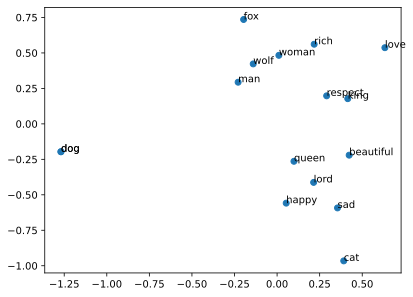

In [ ]:
result= compute_pca(X, 2)
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# NLP with Sequencial models : Sentimenet Analysis

## Libraries :

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from utils import load_tweets, process_tweet_2

%matplotlib inline

## Import the Data

### Load and split the Data

- Import the positive and negative tweets
- Have a look at some examples of the tweets
- Split the data into the training and validation sets
- Create labels for the data

In [ ]:
# Load positive and negative tweets
all_positive_tweets, all_negative_tweets = load_tweets()

# View the total number of positive and negative tweets.
print(f"The number of positive tweets: {len(all_positive_tweets)}")
print(f"The number of negative tweets: {len(all_negative_tweets)}")

The number of positive tweets: 5000
The number of negative tweets: 5000


In [ ]:
# Change the tweet number to any number between 0 and 4999 to see a different pair of tweets.
tweet_number = 4
print('Positive tweet example:')
print(all_positive_tweets[tweet_number])
print('\nNegative tweet example:')
print(all_negative_tweets[tweet_number])

Positive tweet example:
yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days

Negative tweet example:
Dang starting next week I have "work" :(


Here you will process the tweets. This part of the code has been implemented for you.  The processing includes:

- tokenizing the sentence (splitting to words)
- removing stock market tickers like $GE
- removing old style retweet text "RT"
- removing hyperlinks
- removing hashtags
- lowercasing
- removing stopwords and punctuation
- stemming

Some of these things are general steps you would do when processing any text, some others are very "tweet-specific". The details of the process_tweet function are available in utils.py file

In [ ]:
# Process all the tweets: tokenize the string, remove tickers, handles, punctuation and stopwords, stem the words
all_positive_tweets_processed = [process_tweet_2(tweet) for tweet in all_positive_tweets]
all_negative_tweets_processed = [process_tweet_2(tweet) for tweet in all_negative_tweets]

In [ ]:
# Change the tweet number to any number between 0 and 4999 to see a different pair of tweets.
tweet_number = 4
print('Positive processed tweet example:')
print(all_positive_tweets_processed[tweet_number])
print('\nNegative processed tweet example:')
print(all_negative_tweets_processed[tweet_number])

Positive processed tweet example:
['yeaaah', 'yipppy', 'accnt', 'verify', 'rqst', 'succeed', 'get', 'blue', 'tick', 'mark', 'fb', 'profile', ':)', '15', 'day']

Negative processed tweet example:
['dang', 'start', 'next', 'week', 'work', ':(']


In [ ]:
# Split positive set into validation and training
val_pos = all_positive_tweets_processed[4000:]
train_pos = all_positive_tweets_processed[:4000]
# Split negative set into validation and training
val_neg = all_negative_tweets_processed[4000:]
train_neg = all_negative_tweets_processed[:4000]

train_x = train_pos + train_neg
val_x  = val_pos + val_neg

# Set the labels for the training and validation set (1 for positive, 0 for negative)
train_y = [[1] for _ in train_pos] + [[0] for _ in train_neg]
val_y  = [[1] for _ in val_pos] + [[0] for _ in val_neg]

print(f"There are {len(train_x)} sentences for training.")
print(f"There are {len(train_y)} labels for training.\n")
print(f"There are {len(val_x)} sentences for validation.")
print(f"There are {len(val_y)} labels for validation.")

There are 8000 sentences for training.
There are 8000 labels for training.

There are 2000 sentences for validation.
There are 2000 labels for validation.


### The Vocabulary

The vocabulary will also include some special tokens
- `''`: padding
- `'[UNK]'`: a token representing any word that is not in the vocabulary.

In [ ]:
def build_vocabulary(corpus):
    '''Function that builds a vocabulary from the given corpus
    Input:
        - corpus (list): the corpus
    Output:
        - vocab (dict): Dictionary of all the words in the corpus.
                The keys are the words and the values are integers.
    '''

    # The vocabulary includes special tokens like padding token and token for unknown words
    # Keys are words and values are distinct integers (increasing by one from 0)
    vocab = {'': 0, '[UNK]': 1}
    c = 2
    # For each tweet in the training set
    for tweet in corpus:
        # For each word in the tweet
        for word in tweet:
            # If the word is not in vocabulary yet, add it to vocabulary
            if word not in vocab:
                vocab[word] = c
                c += 1

    return vocab


vocab = build_vocabulary(train_x)
num_words = len(vocab)

print(f"Vocabulary contains {num_words} words\n")
print(vocab)

Vocabulary contains 9535 words

{'': 0, '[UNK]': 1, 'followfriday': 2, 'top': 3, 'engage': 4, 'member': 5, 'community': 6, 'week': 7, ':)': 8, 'hey': 9, 'james': 10, 'odd': 11, ':/': 12, 'please': 13, 'call': 14, 'contact': 15, 'centre': 16, '02392441234': 17, 'able': 18, 'assist': 19, 'many': 20, 'thanks': 21, 'listen': 22, 'last': 23, 'night': 24, 'bleed': 25, 'amazing': 26, 'track': 27, 'scotland': 28, 'congrats': 29, 'yeaaah': 30, 'yipppy': 31, 'accnt': 32, 'verify': 33, 'rqst': 34, 'succeed': 35, 'get': 36, 'blue': 37, 'tick': 38, 'mark': 39, 'fb': 40, 'profile': 41, '15': 42, 'day': 43, 'one': 44, 'irresistible': 45, 'flipkartfashionfriday': 46, 'like': 47, 'keep': 48, 'lovely': 49, 'customer': 50, 'wait': 51, 'long': 52, 'hope': 53, 'enjoy': 54, 'happy': 55, 'friday': 56, 'lwwf': 57, 'second': 58, 'thought': 59, '’': 60, 'enough': 61, 'time': 62, 'dd': 63, 'new': 64, 'short': 65, 'enter': 66, 'system': 67, 'sheep': 68, 'must': 69, 'buy': 70, 'jgh': 71, 'go': 72, 'bayan': 73, ':D

<a name="2-3"></a>
### 2.3 - Convert a Tweet to a Tensor

Next, you will write a function that will convert each tweet to a tensor (a list of integer IDs representing the processed tweet).
- You already transformed each tweet to a list of tokens with the `process_tweet` function in order to make a vocabulary.
- Now you will transform the tokens to integers and pad the tensors so they all have equal length.
- Note, the returned data type will be a **regular Python `list()`**
    - You won't use TensorFlow in this function
    - You also won't use a numpy array
- For words in the tweet that are not in the vocabulary, set them to the unique ID for the token `[UNK]`.

##### Example
You had the original tweet:
```CPP
'@happypuppy, is Maria happy?'
```

The tweet is already converted into a list of tokens (including only relevant words).
```CPP
['maria', 'happy']
```

Now you will convert each word into its unique integer.

```CPP
[1, 55]
```
- Notice that the word "maria" is not in the vocabulary, so it is assigned the unique integer associated with the `[UNK]` token, because it is considered "unknown."

After that, you will pad the tweet with zeros so that all the tweets have the same length.

```CPP
[1, 56, 0, 0, ... , 0]
```

(array([4.760e+03, 3.373e+03, 1.605e+03, 2.090e+02, 1.300e+01, 3.800e+01,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  5.1, 10.2, 15.3, 20.4, 25.5, 30.6, 35.7, 40.8, 45.9, 51. ]),
 <BarContainer object of 10 artists>)

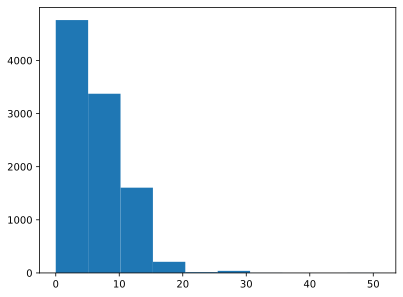

In [ ]:
# Tweet lengths
plt.hist([len(t) for t in train_x + val_x])

In [ ]:
def max_length(training_x, validation_x):
    """Computes the length of the longest tweet in the training and validation sets.

    Args:
        training_x (list): The tweets in the training set.
        validation_x (list): The tweets in the validation set.

    Returns:
        int: Length of the longest tweet.
    """
    max_len = 0
    for tweet in (training_x+validation_x):
        if max_len < len(tweet):
            max_len = len(tweet)

    return max_len

max_len = max_length(train_x, val_x)
print(f'The length of the longest tweet is {max_len} tokens.')

The length of the longest tweet is 51 tokens.


In [ ]:
def padded_sequence(tweet, vocab_dict, max_len, unk_token='[UNK]'):
    """Transform sequences of words into padded sequences of numbers.

    Args:
        tweet (list): A single tweet encoded as a list of strings.
        vocab_dict (dict): Vocabulary.
        max_len (int): Length of the longest tweet.
        unk_token (str, optional): Unknown token. Defaults to '[UNK]'.

    Returns:
        list: Padded tweet encoded as a list of int.
    """
    # Find the ID of the UNK token, to use it when encountering a new word
    unk_ID = vocab_dict.get(unk_token, None)

    # Convert the words to integers by looking up the vocab_dict
    int_sequence = [vocab_dict.get(word, unk_ID) for word in tweet]

    # Pad the sequence with zeroes up to the length max_len
    padded_sequence = int_sequence + [0] * (max_len - len(int_sequence))

    return padded_sequence


Pad the train and validation dataset

In [ ]:
train_x_padded = [padded_sequence(x, vocab, max_len) for x in train_x]
val_x_padded = [padded_sequence(x, vocab, max_len) for x in val_x]

## Define the structure of the neural network layers


### Dense Class

Implement the weight initialization in the `__init__` method.
- Weights are initialized with a random key.
- The shape of the weights (num_rows, num_cols) should equal the number of columns in the input data (this is in the last column) and the number of units respectively.
    - The number of rows in the weight matrix should equal the number of columns in the input data `x`.  Since `x` may have 2 dimensions if it represents a single training example (row, col), or three dimensions (batch_size, row, col), get the last dimension from the tuple that holds the dimensions of x.
    - The number of columns in the weight matrix is the number of units chosen for that dense layer.
- The values generated should have a mean of 0 and standard deviation of `stdev`.
    - To initialize random weights, a random generator is created using `random_generator = np.random.default_rng(seed=random_seed)`. This part is implemented for you. You will use `random_generator.normal(...)` to create your random weights. Check [here](https://numpy.org/doc/stable/reference/random/generator.html) how the random generator works.

Implement the `forward` function of the Dense class.
- The forward function multiplies the input to the layer (`x`) by the weight matrix (`W`)

$$\mathrm{forward}(\mathbf{x},\mathbf{W}) = \mathbf{xW} $$

- You can use `numpy.dot` to perform the matrix multiplication.

In [ ]:
class Dense():
    """
    A dense (fully-connected) layer.
    """

    def __init__(self, n_units, input_shape, activation, stdev=0.1, random_seed=42):
        """
        Initialize the dense layer.

        Args:
        n_units (int): Number of units in the layer.
        input_shape (tuple): Shape of the input data.
        activation (callable): Activation function to use.
        stdev (float, optional): Standard deviation for weight initialization. Defaults to 0.1.
        random_seed (int, optional): Seed for random weight initialization. Defaults to 42.
        """
        # Set the number of units in this layer
        self.n_units = n_units
        # Set the random key for initializing weights
        self.random_generator = np.random.default_rng(seed=random_seed)
        self.activation = activation

        # Get the last dimension of the input data
        input_dim = input_shape[-1]

        # Generate the weight matrix from a normal distribution with a standard deviation of 'stdev'
        self.weights = self.random_generator.normal(loc=0, scale=stdev, size=(input_dim, n_units))

    def __call__(self, x):
        """
        Call function for the layer.

        Args:
        x (numpy.ndarray): Input data.

        Returns:
        numpy.ndarray: Output of the layer after forward pass.
        """
        return self.forward(x)

    def forward(self, x):
        """
        Forward pass of the layer.

        Args:
        x (numpy.ndarray): Input data.

        Returns:
        numpy.ndarray: Output of the layer.
        """
        # Matrix multiply x and the weight matrix
        dense = np.dot(x, self.weights)

        # Apply the activation function
        if self.activation is not None:
            dense = self.activation(dense)

        return dense


In [ ]:
def relu(x):
    '''Relu activation function implementation
    Input:
        - x (numpy array)
    Output:
        - activation (numpy array): input with negative values set to zero
    '''
    activation = np.maximum(0,x)
    return activation

In [ ]:
## Examaple
# random_key = np.random.get_prng()  # sets random seed
z = np.array([[2.0, 7.0, 25.0]]) # input array

# Testing your Dense layer
dense_layer = Dense(n_units=10, input_shape=z.shape, activation=relu)  #sets  number of units in dense layer

print("Weights are:\n",dense_layer.weights) #Returns randomly generated weights
print("Foward function output is:", dense_layer(z)) # Returns multiplied values of units and weights

Weights are:
 [[ 0.03047171 -0.10399841  0.07504512  0.09405647 -0.19510352 -0.13021795
   0.01278404 -0.03162426 -0.00168012 -0.08530439]
 [ 0.0879398   0.07777919  0.00660307  0.11272412  0.04675093 -0.08592925
   0.03687508 -0.09588826  0.08784503 -0.00499259]
 [-0.01848624 -0.06809295  0.12225413 -0.01545295 -0.04283278 -0.03521336
   0.05323092  0.03654441  0.04127326  0.0430821 ]]
Foward function output is: [[0.21436609 0.         3.25266507 0.59085808 0.         0.
  1.61446659 0.17914382 1.64338651 0.87149558]]


### Model

Now you will implement a classifier using neural networks. Here is the model architecture you will be implementing.


For the model implementation, you will use `TensorFlow` module, imported as `tf`. Your model will consist of layers and activation functions that you implemented above, but you will take them directly from the tensorflow library.

You will use the [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) module, which allows you to stack the layers in a sequence as you want them in the model. You will use the following layers:
- [tf.keras.layers.Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding)
    - Turns positive integers (word indices) into vectors of fixed size. You can imagine it as creating one-hot vectors out of indices and then running them through a fully-connected (dense) layer.
- [tf.keras.layers.GlobalAveragePooling1D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling1D)
- [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
    - Regular fully connected layer
    
Please use the `help` function to view documentation for each layer.

First you need to create the model. The `tf.keras.Sequential` has been implemented for you. Within it you should put the following layers:
- `tf.keras.layers.Embedding` with the size `num_words` times `embeding_dim` and the `input_length` set to the length of the input sequences (which is the length of the longest tweet).
- `tf.keras.layers.GlobalAveragePooling1D` with no extra parameters.
- `tf.keras.layers.Dense` with the size of one (this is your classification output) and `'sigmoid'` activation passed to the  `activation` keyword parameter.
Make sure to separate the layers with a comma.

Then you need to compile the model. Here you can look at all the parameters you can set when compiling the model:  [tf.keras.Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model). In this notebook, you just need to set the loss to `'binary_crossentropy'` (because you are doing binary classification with a sigmoid function at the output), the optimizer to `'adam'` and the metrics to `'accuracy'` (so that you can track the accuracy on the training and validation sets.

In [ ]:
def create_model(num_words, embedding_dim, max_len):
    """
    Creates a text classifier model

    Args:
        num_words (int): size of the vocabulary for the Embedding layer input
        embedding_dim (int): dimensionality of the Embedding layer output
        max_len (int): length of the input sequences

    Returns:
        model (tf.keras Model): the text classifier model
    """
    tf.random.set_seed(123)

    # Create the model
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(num_words, embedding_dim, input_length=max_len),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model


In [ ]:
model = create_model(num_words=num_words, embedding_dim=16, max_len=max_len)

In [ ]:
# Prepare the data
train_x_prepared = np.array(train_x_padded)
val_x_prepared = np.array(val_x_padded)

train_y_prepared = np.array(train_y)
val_y_prepared = np.array(val_y)

print('The data is prepared for training!\n')

# Fit the model
print('Training:')
history = model.fit(train_x_prepared, train_y_prepared, epochs=20, validation_data=(val_x_prepared, val_y_prepared))

The data is prepared for training!

Training:
Epoch 1/20
250/250 [==============================] - 3s 10ms/step - loss: 0.6818 - accuracy: 0.6662 - val_loss: 0.6653 - val_accuracy: 0.9895
Epoch 2/20
250/250 [==============================] - 1s 6ms/step - loss: 0.6312 - accuracy: 0.9557 - val_loss: 0.5970 - val_accuracy: 0.9765
Epoch 3/20
250/250 [==============================] - 1s 4ms/step - loss: 0.5404 - accuracy: 0.9872 - val_loss: 0.4998 - val_accuracy: 0.9890
Epoch 4/20
250/250 [==============================] - 1s 4ms/step - loss: 0.4342 - accuracy: 0.9900 - val_loss: 0.3992 - val_accuracy: 0.9935
Epoch 5/20
250/250 [==============================] - 1s 4ms/step - loss: 0.3370 - accuracy: 0.9942 - val_loss: 0.3125 - val_accuracy: 0.9920
Epoch 6/20
250/250 [==============================] - 1s 6ms/step - loss: 0.2582 - accuracy: 0.9942 - val_loss: 0.2449 - val_accuracy: 0.9955
Epoch 7/20
250/250 [==============================] - 2s 7ms/step - loss: 0.1984 - accuracy: 0.9952 -

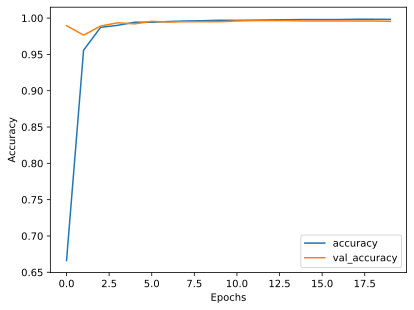

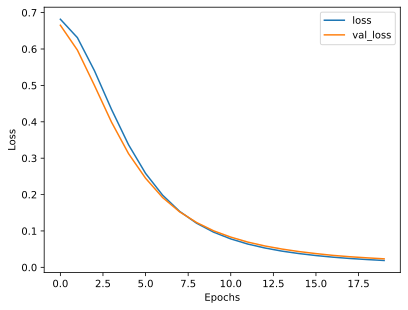

In [ ]:
def plot_metrics(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric.title())
    plt.legend([metric, f'val_{metric}'])
    plt.show()

plot_metrics(history, "accuracy")
plot_metrics(history, "loss")

You can see that already after just a few epochs the model reached very high accuracy on both sets. But if you zoom in, you can see that the performance was still slightly improving on the training set through all 20 epochs, while it stagnated a bit earlier on the validation set. The loss on the other hand kept decreasing through all 20 epochs, which means that the model also got more confident in its predictions.

### Predict on Data

Now you can use the model for predictions on unseen tweets as `model.predict()`. This is as simple as passing an array of sequences you want to predict to the mentioned method.
In the cell below you prepare an extract of positive and negative samples from the validation set (remember, the positive examples are at the beginning and the negative are at the end) for the demonstration and predict their values with the model. Note that in the ideal case you should have another test set from which you would draw this data to inspect the model performance. But for the demonstration here the validation set will do just as well.

In [ ]:
# Prepare an example with 10 positive and 10 negative tweets.
example_for_prediction = np.append(val_x_prepared[0:10], val_x_prepared[-10:], axis=0)

# Make a prediction on the tweets.
model.predict(example_for_prediction)

1/1 [==============================] - 0s 89ms/step


array([[0.9009629 ],
       [0.99421334],
       [0.9969746 ],
       [0.95066565],
       [0.9976228 ],
       [0.99611795],
       [0.9920226 ],
       [0.97857827],
       [0.99846965],
       [0.99828887],
       [0.01066653],
       [0.04227672],
       [0.01330912],
       [0.01701258],
       [0.0179815 ],
       [0.00650696],
       [0.0165382 ],
       [0.00839444],
       [0.02382962],
       [0.03353189]], dtype=float32)

## Test With Your Own Input

Finally you will test with your own input. You will see that deepnets are more powerful than the older methods you have used before.

In [ ]:
def get_prediction_from_tweet(tweet, model, vocab, max_len):
    tweet = process_tweet_2(tweet)
    tweet = padded_sequence(tweet, vocab, max_len)
    tweet = np.array([tweet])

    prediction = model.predict(tweet, verbose=False)

    return prediction[0][0]

In [ ]:
unseen_tweet = 'Oh nice good jobbb I like what you did last week with NLp course good luck'

prediction_unseen = get_prediction_from_tweet(unseen_tweet, model, vocab, max_len)
print(f"positivety: {prediction_unseen}")

positivety: 0.9226690530776978


In [ ]:
unseen_tweet = 'No, this is bad soo bad I hate youuuuu'
prediction_unseen = get_prediction_from_tweet(unseen_tweet, model, vocab, max_len)
print(f"The positivety: {prediction_unseen}")

The positivety: 0.08683968335390091


# NLP with Sequencial models : NER LSM

## Libraries:

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

# set random seeds to make this notebook easier to replicate
tf.keras.utils.set_random_seed(33)

## Exploring the Data

You will be using a dataset from Kaggle, which it will be preprocessed for you. The original data consists of four columns: the sentence number, the word, the part of speech of the word and the tags.  A few tags you might expect to see are:

* geo: geographical entity
* org: organization
* per: person
* gpe: geopolitical entity
* tim: time indicator
* art: artifact
* eve: event
* nat: natural phenomenon
* O: filler word


In [ ]:
data = pd.read_csv("/content/NLP_Chapitre/data/NLP with Sequencial models  NER LSM/ner_dataset.csv", encoding = "ISO-8859-1")
train_sents = open('/content/NLP_Chapitre/data/NLP with Sequencial models  NER LSM/small/sentences.txt', 'r').readline()
train_labels = open('/content/NLP_Chapitre/data/NLP with Sequencial models  NER LSM/small/labels.txt', 'r').readline()
print('SENTENCE:', train_sents)
print('SENTENCE LABEL:', train_labels)
print('ORIGINAL DATA:\n', data.head())
del(data, train_sents, train_labels)

SENTENCE: Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .

SENTENCE LABEL: O O O O O O B-geo O O O O O B-geo O O O O O B-gpe O O O O O

ORIGINAL DATA:
     Sentence #           Word  POS Tag
0  Sentence: 1      Thousands  NNS   O
1          NaN             of   IN   O
2          NaN  demonstrators  NNS   O
3          NaN           have  VBP   O
4          NaN        marched  VBN   O


In [ ]:
def load_data(file_path):
    with open(file_path,'r') as file:
        data = np.array([line.strip() for line in file.readlines()])
    return data


In [ ]:
train_sentences = load_data('/content/NLP_Chapitre/data/NLP with Sequencial models  NER LSM/large/train/sentences.txt')
train_labels = load_data('/content/NLP_Chapitre/data/NLP with Sequencial models  NER LSM/large/train/labels.txt')

val_sentences = load_data('/content/NLP_Chapitre/data/NLP with Sequencial models  NER LSM/large/val/sentences.txt')
val_labels = load_data('/content/NLP_Chapitre/data/NLP with Sequencial models  NER LSM/large/val/labels.txt')

test_sentences = load_data('/content/NLP_Chapitre/data/NLP with Sequencial models  NER LSM/large/test/sentences.txt')
test_labels = load_data('/content/NLP_Chapitre/data/NLP with Sequencial models  NER LSM/large/test/labels.txt')


## Encoding

### Encoding the sentences

In this section, you will use [`tf.keras.layers.TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization) to transform the sentences into integers, so they can be fed into the model you will build later on.

You can use `help(tf.keras.layers.TextVectorization)` to further investigate the object and its parameters.

The parameter you will need to pass explicitly is `standardize`. This will tell how the parser splits the sentences. By default, `standardize = 'lower_and_strip_punctuation'`, this means the parser will remove all punctuation and make everything lowercase. Note that this may influence the NER task, since an upper case in the middle of a sentence may indicate an entity. Furthermore, the sentences in the dataset are already split into tokens, and all tokens, including punctuation, are separated by a whitespace. The punctuations are also labeled. That said, you will use `standardize = None` so everything will just be split into single tokens and then mapped to a positive integer.

Note that `tf.keras.layers.TextVectorization` will also pad the sentences. In this case, it will always pad using the largest sentence in the set you call it with. You will be calling it for the entire training/validation/test set, but padding won't impact at all the model's output, as you will see later on.

After instantiating the object, you will need to adapt it to the **sentences training set**, so it will map every token in the training set to an integer. Also, it will by default create two tokens: one for unknown tokens and another for the padding token. Tensorflow maps in the following way:

1. padding token: "", integer mapped: 0
1. unknown token "[UNK]", integer mapped: 1

In [ ]:
def get_sentence_vectorizer(sentences):
    tf.keras.utils.set_random_seed(33)
    """
    Create a TextVectorization layer for sentence tokenization and adapt it to the provided sentences.

    Parameters:
    sentences (list of str): Sentences for vocabulary adaptation.

    Returns:
    sentence_vectorizer (tf.keras.layers.TextVectorization): TextVectorization layer for sentence tokenization.
    vocab (list of str): Extracted vocabulary.
    """

    # Define TextVectorization object with the appropriate standardize parameter
    sentence_vectorizer = tf.keras.layers.TextVectorization(output_mode='int', standardize=None)
    # Adapt the sentence vectorization object to the given sentences
    sentence_vectorizer.adapt(sentences)
    # Get the vocabulary
    vocab = sentence_vectorizer.get_vocabulary()

    return sentence_vectorizer, vocab


In [ ]:
test_vectorizer, test_vocab = get_sentence_vectorizer(train_sentences[:1000])
print(f"Test vocab size: {len(test_vocab)}")

sentence = "I like learning new NLP models !"
sentence_vectorized = test_vectorizer(sentence)
print(f"Sentence: {sentence}\nSentence vectorized: {sentence_vectorized}")

Test vocab size: 4650
Sentence: I like learning new NLP models !
Sentence vectorized: [ 296  314    1   59    1    1 4649]


In [ ]:
sentence_vectorizer, vocab = get_sentence_vectorizer(train_sentences)

### Encoding the labels

In this section you will encode the labels. The process is a bit simpler than encoding the sentences, because there are only a few tags, compared with words in the vocabulary. Note, also, that there will be one extra tag to represent the padded token that some sentences may have included. Padding will not interfere at all in this task, as you will see further on. Run the next cell to print one example of a tag related to one sentence.

Because there is no meaning in having an UNK token for labels and the padding token will be another number different from 0 (you will see why soon), TextVectorization is not a good choice.

You will need also to pad the labels, because the number of labels must match the number of words.

In [ ]:
print(f"Sentence: {train_sentences[0]}")
print(f"Labels: {train_labels[0]}")

Sentence: Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .
Labels: O O O O O O B-geo O O O O O B-geo O O O O O B-gpe O O O O O


In [ ]:
def get_tags(labels):
    tag_set = set() # Define an empty set
    for el in labels:
        for tag in el.split(" "):
            tag_set.add(tag)
    tag_list = list(tag_set)
    tag_list.sort()
    return tag_list

In [ ]:
tags = get_tags(train_labels)
print(tags)

['B-art', 'B-eve', 'B-geo', 'B-gpe', 'B-nat', 'B-org', 'B-per', 'B-tim', 'I-art', 'I-eve', 'I-geo', 'I-gpe', 'I-nat', 'I-org', 'I-per', 'I-tim', 'O']


In [ ]:
def make_tag_map(tags):
    tag_map = {}
    for i,tag in enumerate(tags):
        tag_map[tag] = i
    return tag_map

The `tag_map` is a dictionary that maps the tags that you could have to numbers. Run the cell below to see the possible classes you will be predicting. The prepositions in the tags mean:
* I: Token is inside an entity.
* B: Token begins an entity.

If you had the sentence

**"Sharon flew to Miami on Friday"**

The tags would look like:

```
Sharon B-per
flew   O
to     O
Miami  B-geo
on     O
Friday B-tim
```

where you would have three tokens beginning with B-, since there are no multi-token entities in the sequence. But if you added Sharon's last name to the sentence:

**"Sharon Floyd flew to Miami on Friday"**

```
Sharon B-per
Floyd  I-per
flew   O
to     O
Miami  B-geo
on     O
Friday B-tim
```

Your tags would change to show first "Sharon" as B-per, and "Floyd" as I-per, where I- indicates an inner token in a multi-token sequence.

In [ ]:
tag_map = make_tag_map(tags)
print(tag_map)

{'B-art': 0, 'B-eve': 1, 'B-geo': 2, 'B-gpe': 3, 'B-nat': 4, 'B-org': 5, 'B-per': 6, 'B-tim': 7, 'I-art': 8, 'I-eve': 9, 'I-geo': 10, 'I-gpe': 11, 'I-nat': 12, 'I-org': 13, 'I-per': 14, 'I-tim': 15, 'O': 16}


### Padding the labels

In this section, you will pad the labels. TextVectorization already padded the sentences, so you must ensure that the labels are properly padded as well. This is not a hard task for two main reasons:

1. Tensorflow has built-in functions for padding
1. Padding will be performed uniformly per dataset (train, validation and test) using the maximum sentence length in each dataset and the size of each sentence is exactly the same as the size of their respective labels.

You will pad the vectorized labels with the value -1. You will not use 0 to simplify loss masking and evaluation in further steps. This is because to properly classify one token, a log softmax transformation will be performed and the index with greater value will be the index label. Since index starts at 0, it is better to keep the label 0 as a valid index, even though it is possible to also use 0 as a mask value for labels, but it would require some tweaks in the model architecture or in the loss computation.

Tensorflow provides the function [`tf.keras.utils.pad_sequences`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/pad_sequences). The arguments you will need are:

- `sequences`: An array with the labels.
- `padding`: The position where padding will take place, the standard is `pre`, meaning the sequences will be padded at the beginning. You need to pass the argument `post`.
- `value`: Padding value. The default value is  0.

In [ ]:
def label_vectorizer(labels, tag_map):
    """
    Convert list of label strings to padded label IDs using a tag mapping.

    Parameters:
    labels (list of str): List of label strings.
    tag_map (dict): Dictionary mapping tags to IDs.
    Returns:
    label_ids (numpy.ndarray): Padded array of label IDs.
    """
    label_ids = [] # It can't be a numpy array yet, since each sentence has a different size

    # Each element in labels is a string of tags so for each of them:
    for element in labels:
        # Split it into single tokens. You may use .split function for strings. Be aware to split it by a blank space!
        tokens = element.split()

        # Use the dictionary tag_map passed as an argument to the label_vectorizer function
        # to make the correspondence between tags and numbers.
        element_ids = [tag_map[token] for token in tokens]

        # Append the found ids corresponding to the current element to label_ids list
        label_ids.append(element_ids)

    # Pad the elements
    label_ids = tf.keras.utils.pad_sequences(label_ids, padding='post', value=-1)


    return label_ids


In [ ]:
print(f"Sentence: {train_sentences[5]}")
print(f"Labels: {train_labels[5]}")
print(f"Vectorized labels: {label_vectorizer([train_labels[5]], tag_map)}")

Sentence: The party is divided over Britain 's participation in the Iraq conflict and the continued deployment of 8,500 British troops in that country .
Labels: O O O O O B-gpe O O O O B-geo O O O O O O O B-gpe O O O O O
Vectorized labels: [[16 16 16 16 16  3 16 16 16 16  2 16 16 16 16 16 16 16  3 16 16 16 16 16]]


## Building the Dataset

In this section, you will build the dataset for training, validation and testing. You will be using [`tf.data.Dataset`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) class, which provides an optimized way to handle data to feed into a tensorflow model. It may be not as straightforward as a pandas dataset, but it avoids keeping all the data in memory, thus it makes the training faster.

You will be using the `tf.data.Dataset.from_tensor_slices` function that converts any iterable into a Tensorflow dataset. You can pass a tuple of `(sentences,labels)` and Tensorflow will understand that each sentence is mapped to its respective label, therefore it is expected that if a tuple of arrays is passed, both arrays have the same length.

In [ ]:
def generate_dataset(sentences, labels, sentence_vectorizer, tag_map):
    sentences_ids = sentence_vectorizer(sentences)
    labels_ids = label_vectorizer(labels, tag_map = tag_map)
    dataset = tf.data.Dataset.from_tensor_slices((sentences_ids, labels_ids))
    return dataset

In [ ]:
train_dataset = generate_dataset(train_sentences,train_labels, sentence_vectorizer, tag_map)
val_dataset = generate_dataset(val_sentences,val_labels,  sentence_vectorizer, tag_map)
test_dataset = generate_dataset(test_sentences, test_labels,  sentence_vectorizer, tag_map)

In [ ]:
# Exploring information about the training data
print(f'The number of outputs is {len(tags)}')
# The number of vocabulary tokens (including <PAD>)
g_vocab_size = len(vocab)
print(f"Num of vocabulary words in the training set: {g_vocab_size}")
print('The training size is', len(train_dataset))
print('The validation size is', len(val_dataset))
print('An example of the first sentence is\n\t', next(iter(train_dataset))[0].numpy())
print('An example of its corresponding label is\n\t', next(iter(train_dataset))[1].numpy())

The number of outputs is 17
Num of vocabulary words in the training set: 29847
The training size is 33570
The validation size is 7194
An example of the first sentence is
	 [1046    6 1121   18 1832  232  543    7  528    2  158    5   60    9
  648    2  922    6  192   87   22   16   54    3    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
An example of its corresponding label is
	 [16 16 16 16 16 16  2 16 16 16 16 16  2 16 16 16 16 16  3 16 16 16 16 16
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 

### Considerations about RNNs and LSTMs inputs

Tensorflow implementation of RNNs (in particular LSTMs) allow you to pass a variable size of input sentences, however this cannot be done **in the same batch**. You must assure that, for each batch, the shapes for our input tensors are the same.

A second point here is that, for this purpose, the size of the padding should not influence the final result. Therefore, it does not matter if you perform the padding for each batch or in the entire dataset.


## Building the Model

### 4.1 Model structure


Concretely, your inputs will be sentences represented as tensors that are fed to a model with:

* An Embedding layer,
* A LSTM layer
* A Dense layer
* A log softmax layer.

You may choose between outputting only the very last LSTM output for each sentence, but you may also request the LSTM to output every value for a sentence - this is what you want. You will need every output, because the idea is to label every token in the sentence and not to predict the next token or even make an overall classification task for that sentence.

This implies that when you input a single sentence, such as `[452, 3400, 123, 0, 0, 0]`, the expected output should be an array for each word ID, with a length equal to the number of tags. This output is obtained by applying the LogSoftfmax function for each of the `len(tags)` values. So, in the case of the example array with a shape of `(6,)`, the output should be an array with a shape of `(6, len(tags))`.

In your case, you've seen that each sentence in the training set is 104 values long, so in a batch of, say, 64 tensors, the model shoud input a tensor of shape `(64,104)` and output another tensor with shape `(64,104,17)`.

Good news! We won't make you implement the LSTM cell drawn above. You will be in charge of the overall architecture of the model.

   
- [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential): Combinator that applies layers serially (by function composition) - **this is not properly a layer (it is under `tensorflow.keras` only and not under `tensorflow.keras.layers`)**. It is in fact a Tensorflow [model](https://www.tensorflow.org/api_docs/python/tf/keras/Model) object.
    - You can add the layers to a `Sequential` layer by calling the method `.add(layer)`.  
    - You may skip the input shape and pass it in the first layer you instantiate, if necessary (RNNs usually don't need to fix an input length).


-  [tf.keras.layers.Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding): Initializes the embedding layer. An embedding layer in tensorflow will input only **positive integers**.
    - `Embedding(input_dim, output_dim, mask_zero = False)`.
    - `input_dim` is the expected range of integers for each tensor in the batch. Note that the input_dim is not related to array size, but to the possible range of integers expected in the input. Usually this is the vocabulary size, but it may differ by 1, depending on further parameters.  See below.
    - `output_dim` is the number of elements in the word embedding (some choices for a word embedding size range from 150 to 300, for example). Each word processed will be assigned an array of size `output_dim`. So if one array of shape (3,) is passed (example of such an array `[100,203,204]`), then the Embedding layer should have output shape (3,output_dim).
    - `mask_zero` is a boolean telling whether 0 is a mask value or not. If `mask_zero = True`, then some considerations must be done:
                1. The value 0 should be reserved as the mask value, as it will be ignored in training.
                2. You need to add 1 in `input_dim`, since now Tensorflow will consider that one extra 0 value may show up in each sentence.

-  [tf.keras.layers.LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM): An LSTM layer.
    - `LSTM(units, return_sequences)` Builds an LSTM layer with hidden state and cell sizes equal to `units`. The arguments you will need:
            1. `units`: It is the number of `LSTM` cells you will create to pass every input to. In this case, set the `units` as the Embedding `output_dim`. This is just a choice, in fact there is no static rule preventing one from choosing any amount of LSTM units.
            2. `return_sequences`: A boolean, telling whether you want to return every output value from the LSTM cells. If `return_sequences = False`, then the LSTM output shape will be `(batch_size, units)`. Otherwise, it is `(batch_size, sentence_length, units)`, since there will be an output for each word in the sentence.


-  [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense): A dense layer.
    - `Dense(units, activation)`: The parameters for this layer are:
            1. `units`: It is the number of units chosen for this dense layer, i.e., it is the dimensionality of the output space. In this case, each value passed through the Dense layer must be mapped into a vector with length `num_of_classes` (in this case, `len(tags)`).
            2. `activation`: This is the activation that will be performed after computing the values in the Dense layer. Since the Dense layer comes before the LogSoftmax step, you can pass the LogSoftmax function as activation function here. **You can find the implementation for LogSoftmax under `tf.nn`. So you may call it as `tf.nn.log_softmax`. See its documentation [here](https://www.tensorflow.org/api_docs/python/tf/nn/log_softmax).
    

In [ ]:

def NER(len_tags, vocab_size, embedding_dim=50):
    """
    Create a Named Entity Recognition (NER) model.

    Parameters:
    len_tags (int): Number of NER tags (output classes).
    vocab_size (int): Vocabulary size.
    embedding_dim (int, optional): Dimension of embedding and LSTM layers (default is 50).

    Returns:
    model (Sequential): NER model.
    """
    model = tf.keras.Sequential(name='sequential')
    # Add the tf.keras.layers.Embedding layer. Do not forget to mask out the zeros!
    model.add(tf.keras.layers.Embedding(input_dim=vocab_size + 1, output_dim=embedding_dim, mask_zero=True))
    # Add the LSTM layer. Make sure you are passing the right dimension (defined in the docstring above)
    # and returning every output for the tf.keras.layers.LSTM layer and not the very last one.
    model.add(tf.keras.layers.LSTM(units=embedding_dim, return_sequences=True))
    # Add the final tf.keras.layers.Dense with the appropriate activation function. Remember you must pass the activation function itself ant not its call!
    # You must use tf.nn.log_softmax instead of tf.nn.log_softmax().
    model.add(tf.keras.layers.Dense(units=len_tags, activation=tf.nn.log_softmax))


    return model



### Masked loss and metrics

Before training the model, you need to create your own function to compute the accuracy. Tensorflow has built-in accuracy metrics but you cannot pass values to be ignored. This will impact the calculations, since you must remove the padded values. Before diving into the exercise, let's just make some points clear.

Usually, the metric that inputs true labels and predicted labels and outputs how many times the predicted and true labels match is called `accuracy`. In some cases, however, there is one more step before getting the predicted labels. This may happen if, instead of passing the predicted labels, a vector of probabilities is passed. In such case, there is a need to perform an `argmax` for each prediction to find the appropriate predicted label. Such situations happen very often, therefore Tensorflow has a set of functions, with prefix `Sparse`, that performs this operation in the backend. Unfortunately, it does not provide values to ignore in the accuracy case. This is what you will work on now.

Note that the model's prediction has 3 axes:
- the number of examples (batch size)
- the number of words in each example (padded to be as long as the longest sentence in the batch)
- the number of possible targets (the 17 named entity tags).

In [ ]:
def masked_loss(y_true, y_pred):
    """
    Calculate the masked sparse categorical cross-entropy loss.

    Parameters:
    y_true (tensor): True labels.
    y_pred (tensor): Predicted logits.

    Returns:
    loss (tensor): Calculated loss.
    """
    # Create a mask where true labels are not equal to -1
    mask = tf.math.not_equal(y_true, -1)
    # Cast mask to float32
    mask = tf.cast(mask, tf.float32)
    # Replace padded values in y_true with a valid class label (e.g., 0)
    y_true = tf.where(tf.equal(y_true, -1), tf.zeros_like(y_true), y_true)
    # Calculate the loss for each item in the batch
    loss = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=True)
    # Cast the loss tensor to float32 (to match the data type of the mask)
    loss = tf.cast(loss, tf.float32)
    # Apply the mask to the loss
    masked_loss = loss * mask
    # Compute the mean loss
    masked_loss = tf.reduce_mean(masked_loss)
    return masked_loss



In [ ]:
true_labels = [0,1,2,0]
predicted_logits = [[0.1,0.6,0.3] , [0.2,0.7,0.1], [0.1, 0.5,0.4], [0.4,0.4,0.2]]
print(masked_loss(true_labels, predicted_logits))

tf.Tensor(1.0508584, shape=(), dtype=float32)


You will maked a masked version of the accuracy function. You will need to perform an argmax to get the predicted label for each element in the batch. Remember to provide the appropriate axis in the argmax function. Furthermore, remember to use only tensorflow operations. Even though numpy has every function you will need, to pass it as a loss function and/or metric function, you must use tensorflow operations, due to internal optimizations that Tensorflow performs for reliable fitting. The following tensorflow functions are already loaded in memory, so you can directly call them.

1. tf.equal, equivalent to np.equal
2. tf.cast, equivalent to np.astype
3. tf.reduce_sum, equiavalent to np.sum
4. tf.math.argmax, equivalent to np.argmax
5. You may need tf.float32 while casting

In [ ]:
def masked_accuracy(y_true, y_pred):
    """
    Calculate masked accuracy for predicted labels.

    Parameters:
    y_true (tensor): True labels.
    y_pred (tensor): Predicted logits.

    Returns:
    accuracy (tensor): Masked accuracy.

    """

    # Calculate the loss for each item in the batch.
    # You must always cast the tensors to the same type in order to use them in training. Since you will make divisions, it is safe to use tf.float32 data type.
    y_true = tf.cast(y_true, tf.float32)
    # Create the mask, i.e., the values that will be ignored
    mask = tf.cast(tf.math.not_equal(y_true, -1), tf.float32)
    # Perform argmax to get the predicted values
    y_pred_class = tf.cast(tf.math.argmax(y_pred, axis=-1), tf.float32)
    # Compare the true values with the predicted ones
    matches_true_pred = tf.equal(y_true, y_pred_class)
    matches_true_pred = tf.cast(matches_true_pred, tf.float32)
    # Multiply the matches tensor with the masks
    matches_true_pred *= mask
    # Compute masked accuracy (quotient between the total matches and the total valid values, i.e., the amount of non-masked values)
    masked_acc = tf.reduce_sum(matches_true_pred) / tf.reduce_sum(mask)

    return masked_acc


In [ ]:
true_labels = [0,1,2,0]
predicted_logits = [[0.1,0.6,0.3] , [0.2,0.7,0.1], [0.1, 0.5,0.4], [0.4,0.4,0.2]]
print(masked_accuracy(true_labels, predicted_logits))

tf.Tensor(0.5, shape=(), dtype=float32)


In [ ]:
model = NER(len(tag_map), len(vocab))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 50)          1492400   
                                                                 
 lstm (LSTM)                 (None, None, 50)          20200     
                                                                 
 dense_1 (Dense)             (None, None, 17)          867       
                                                                 
Total params: 1513467 (5.77 MB)
Trainable params: 1513467 (5.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### A note on padding

You will check now how padding does not affect the model's output. Of course the output dimension will change. If ten zeros are added at the end of the tensor, then the resulting output dimension will have 10 more elements (more specifically, 10 more arrays of length 17 each). However, those are removed from any calculation further on, so it won't impact at all the model's performance and training. You will be using the function tf.expand_dims.

In [ ]:
x = tf.expand_dims(np.array([545, 467, 896]), axis = 0) # Expanding dims is needed to pass it to the model,
                                                        # since it expects batches and not single prediction arrays
x_padded = tf.expand_dims(np.array([545, 467, 896, 0, 0, 0]), axis = 0)

In [ ]:
pred_x = model(x)
pred_x_padded = model(x_padded)
print(f'x shape: {pred_x.shape}\nx_padded shape: {pred_x_padded.shape}')

x shape: (1, 3, 17)
x_padded shape: (1, 6, 17)


If the last three elements of `pred_x_padded` are removed, both `pred_x` and `pred_x_padded[:3]` must have the same elements.

In [ ]:
np.allclose(pred_x, pred_x[:3])

True

In [ ]:
y_true = tf.expand_dims([16, 6, 12], axis = 0)
y_true_padded = tf.expand_dims([16,6,12,-1,-1,-1], axis = 0) # Remember you mapped the padded values to -1 in the labels
print(f"masked_loss is the same: {np.allclose(masked_loss(y_true,pred_x), masked_loss(y_true_padded,pred_x_padded))}")
print(f"masked_accuracy is the same: {np.allclose(masked_accuracy(y_true,pred_x), masked_accuracy(y_true_padded,pred_x_padded))}")

masked_loss is the same: False
masked_accuracy is the same: True


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss = masked_loss,
               metrics = [masked_accuracy])

### Training the Model

You will now train the model.


- You will train it with `shuffle = True`, over 2 epochs and passing the validation dataset as `validation_data`.
- You will run into an error if you just pass the datasets as they are right now, because they are not prepared in batches. You must use the method `.batch` that returns a dataset already divided in batches


**NOTE**: The fitting takes about 1 minute to run. Only the first epoch is slow, the following ones are much faster.

In [ ]:
tf.keras.utils.set_random_seed(33) ## Setting again a random seed to ensure reproducibility

BATCH_SIZE = 64

model.fit(train_dataset.batch(BATCH_SIZE),
          validation_data = val_dataset.batch(BATCH_SIZE),
          shuffle=True,
          epochs = 2)

Epoch 1/2
525/525 [==============================] - 72s 125ms/step - loss: 0.0576 - masked_accuracy: 0.9288 - val_loss: 0.0422 - val_masked_accuracy: 0.9578
Epoch 2/2
525/525 [==============================] - 63s 121ms/step - loss: 0.0233 - masked_accuracy: 0.9657 - val_loss: 0.0405 - val_masked_accuracy: 0.9588


## Compute Accuracy

You will now evaluate on the test set. Previously, you have seen the accuracy on the training set and the validation (noted as eval) set. You will now evaluate on your test set. You already have a function to compute the accuracy.

In [ ]:
# Convert the sentences into ids
test_sentences_id = sentence_vectorizer(test_sentences)
# Convert the labels into token ids
test_labels_id = label_vectorizer(test_labels,tag_map)
# Rename to prettify next function call
y_true = test_labels_id
y_pred = model.predict(test_sentences_id)

225/225 [==============================] - 5s 14ms/step


In [ ]:
print(f"The model's accuracy in test set is: {masked_accuracy(y_true,y_pred).numpy():.4f}")

The model's accuracy in test set is: 0.9583


## Testing with your Own Sentence

In this section you will make a predictor function to predict the NER labels for any sentence.

You will make a function `predict` that inputs one arbitrary sentence, a trained NER model, the sentence_vectorizer and the tag mapping and return a list of predicted NER labels. Remember that the sentences in pre-processing were already separated by token, so you do not need to worry about separating tokens such as commas or dots. You will just pass one sentence in the desired format, e.g., sentence = "I like apples , oranges and grapes ."

To get a single prediction from a tensorflow model, you will need to make some changes in the input array, since tensorflow expects a batch of sentences. You can use the function `tf.expand_dims` to do this.

In [ ]:
def predict(sentence, model, sentence_vectorizer, tag_map):
    """
    Predict NER labels for a given sentence using a trained model.

    Parameters:
    sentence (str): Input sentence.
    model (tf.keras.Model): Trained NER model.
    sentence_vectorizer (tf.keras.layers.TextVectorization): Sentence vectorization layer.
    tag_map (dict): Dictionary mapping tag IDs to labels.

    Returns:
    predictions (list): Predicted NER labels for the sentence.

    """

    # Convert the sentence into ids
    sentence_vectorized = sentence_vectorizer([sentence])
    # Get the model output
    output = model.predict(sentence_vectorized)
    # Get the predicted labels for each token, using argmax function and specifying the correct axis to perform the argmax
    outputs = np.argmax(output, axis=-1)
    # Next line is just to adjust outputs dimension. Since this function expects only one input to get a prediction, outputs will be something like [[1,2,3]]
    # so to avoid heavy notation below, let's transform it into [1,2,3]
    outputs = outputs[0]
    # Get a list of all keys, remember that the tag_map was built in a way that each label id matches its index in a list
    labels = list(tag_map.keys())
    pred = []
    # Iterating over every predicted token in outputs list
    for tag_idx in outputs:
        pred_label = labels[tag_idx]
        pred.append(pred_label)


    return pred


In [ ]:
# New york times news:
sentence = "Peter Parker , the White House director of trade and manufacturing policy of U.S , said in an interview on Sunday morning that the White House was working to prepare for the possibility of a second wave of the coronavirus in the fall , though he said it wouldn ’t necessarily come"
predictions = predict(sentence, model, sentence_vectorizer, tag_map)
for x,y in zip(sentence.split(' '), predictions):
    if y != 'O':
        print(x,y)

1/1 [==============================] - 1s 1s/step
Peter B-per
Parker I-per
White B-org
House I-org
U.S B-org
Sunday B-tim
morning I-tim
White B-org
House I-org


# NLP with Sequencial models : Siamese Networks

## Importing the Data
[One Shot Learning](https://medium.com/@saba99/one-shot-learning-312e385993bc)

### Loading in the data

You will be using the 'Quora question answer' dataset to build a model that can identify similar questions. This is a useful task because you don't want to have several versions of the same question posted. Several times when teaching I end up responding to similar questions on piazza, or on other community forums. This data set has already been labeled for you. Run the cell below to import some of the packages you will be using.

In [ ]:
import os
import numpy as np
import pandas as pd
import random as rnd
import tensorflow as tf


# Set random seeds
rnd.seed(34)

In [ ]:
data = pd.read_csv("/content/NLP_Chapitre/data/NLP with Sequencial models  Siamese Networks/questions.csv")
N = len(data)
print('Number of question pairs: ', N)
data.head()

Number of question pairs:  404351


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
N_train = 300000
N_test = 10240
data_train = data[:N_train]
data_test = data[N_train:N_train + N_test]
print("Train set:", len(data_train), "Test set:", len(data_test))
del (data)  # remove to free memory

Train set: 300000 Test set: 10240


The following cells are in charge of selecting only duplicate questions from the training set, which will give you a smaller dataset. First find the indexes with duplicate questions.

You will start by identifying the indexes in the training set which correspond to duplicate questions. For this you will define a boolean variable `td_index`, which has value `True` if the index corresponds to duplicate questions and `False` otherwise.

In [ ]:
td_index = data_train['is_duplicate'] == 1
td_index = [i for i, x in enumerate(td_index) if x]
print('Number of duplicate questions: ', len(td_index))
print('Indexes of first ten duplicate questions:', td_index[:10])

Number of duplicate questions:  111486
Indexes of first ten duplicate questions: [5, 7, 11, 12, 13, 15, 16, 18, 20, 29]


In [ ]:
print(data_train['question1'][5])
print(data_train['question2'][5])
print('is_duplicate: ', data_train['is_duplicate'][5])

Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?
I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?
is_duplicate:  1


Next, keep only the rows in the original training set that correspond to the rows where `td_index` is `True`

In [ ]:
Q1_train = np.array(data_train['question1'][td_index])
Q2_train = np.array(data_train['question2'][td_index])

Q1_test = np.array(data_test['question1'])
Q2_test = np.array(data_test['question2'])
y_test  = np.array(data_test['is_duplicate'])

In [ ]:
print('TRAINING QUESTIONS:\n')
print('Question 1: ', Q1_train[0])
print('Question 2: ', Q2_train[0], '\n')
print('Question 1: ', Q1_train[5])
print('Question 2: ', Q2_train[5], '\n')

print('TESTING QUESTIONS:\n')
print('Question 1: ', Q1_test[0])
print('Question 2: ', Q2_test[0], '\n')
print('is_duplicate =', y_test[0], '\n')

TRAINING QUESTIONS:

Question 1:  Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?
Question 2:  I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me? 

Question 1:  What would a Trump presidency mean for current international master’s students on an F1 visa?
Question 2:  How will a Trump presidency affect the students presently in US or planning to study in US? 

TESTING QUESTIONS:

Question 1:  How do I prepare for interviews for cse?
Question 2:  What is the best way to prepare for cse? 

is_duplicate = 0 



In [ ]:
# Splitting the data
cut_off = int(len(Q1_train) * 0.8)
train_Q1, train_Q2 = Q1_train[:cut_off], Q2_train[:cut_off]
val_Q1, val_Q2 = Q1_train[cut_off:], Q2_train[cut_off:]
print('Number of duplicate questions: ', len(Q1_train))
print("The length of the training set is:  ", len(train_Q1))
print("The length of the validation set is: ", len(val_Q1))

Number of duplicate questions:  111486
The length of the training set is:   89188
The length of the validation set is:  22298


### Learning question encoding

The next step is to learn how to encode each of the questions as a list of numbers (integers). You will be learning how to encode each word of the selected duplicate pairs with an index.

You will start by learning a word dictionary, or vocabulary, containing all the words in your training dataset, which you will use to encode each word of the selected duplicate pairs with an index.

For this task you will be using the [`TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization) layer from Keras. which will take care of everything for you. Begin by setting a seed, so we all get the same encoding.

The vocabulary is learned using the `.adapt()`. This will analyze the dataset, determine the frequency of individual string values, and create a vocabulary from them. If you need, you can later access the vocabulary by using `.get_vocabulary()`.

In [ ]:
tf.random.set_seed(0)
text_vectorization = tf.keras.layers.TextVectorization(output_mode='int',split='whitespace', standardize='strip_punctuation')
text_vectorization.adapt(np.concatenate((Q1_train,Q2_train)))

As you can see, it is set to split text on whitespaces and it's stripping the punctuation from text. You can check how big your vocabulary is.

In [ ]:
print(f'Vocabulary size: {text_vectorization.vocabulary_size()}')

Vocabulary size: 36224


You can also call `text_vectorization` to see what the encoding looks like for the first questions of the training and test datasets

In [ ]:
print('first question in the train set:\n')
print(Q1_train[0], '\n')
print('encoded version:')
print(text_vectorization(Q1_train[0]),'\n')

print('first question in the test set:\n')
print(Q1_test[0], '\n')
print('encoded version:')
print(text_vectorization(Q1_test[0]) )

first question in the train set:

Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me? 

encoded version:
tf.Tensor(
[ 6984     6   178    10  8988  2442 35393   761    13  6636 28205    31
    28   483    45    98], shape=(16,), dtype=int64) 

first question in the test set:

How do I prepare for interviews for cse? 

encoded version:
tf.Tensor([    4     8     6   160    17  2079    17 11775], shape=(8,), dtype=int64)



## Defining the Siamese model

### Understanding the Siamese Network

A Siamese network is a neural network which uses the same weights while working in tandem on two different input vectors to compute comparable output vectors. The Siamese network you are about to implement looks something like this:


You get the question, get it vectorized and embedded, run it through an LSTM layer, normalize $v_1$ and $v_2$, and finally get the corresponding cosine similarity for each pair of questions (remember that each question is a single string). Because of the implementation of the loss function you will see in the next section, you are not going to have the cosine similarity as output of your Siamese network, but rather $v_1$ and $v_2$. You will add the cosine distance step once you reach the classification step.

To train the model, you will use the triplet loss (explained below). This loss makes use of a baseline (anchor) input that is compared to a positive (truthy) input and a negative (falsy) input. The (cosine) distance from the baseline input to the positive input is minimized, and the distance from the baseline input to the negative  input is maximized. Mathematically, you are trying to maximize the following.

$$\mathcal{L}(A, P, N)=\max \left(\|\mathrm{f}(A)-\mathrm{f}(P)\|^{2}-\|\mathrm{f}(A)-\mathrm{f}(N)\|^{2}+\alpha, 0\right),$$

where $A$ is the anchor input, for example $q1_1$, $P$ is the duplicate input, for example, $q2_1$, and $N$ is the negative input (the non duplicate question), for example $q2_2$.<br>
$\alpha$ is a margin; you can think about it as a safety net, or by how much you want to push the duplicates from the non duplicates. This is the essence of the triplet loss. However, as you will see in the next section, you will be using a pretty smart trick to improve your training, known as hard negative mining.
<br>


- [`tf.keras.models.Sequential`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential): groups a linear stack of layers into a tf.keras.Model.
    - You can pass in the layers as arguments to `Serial`, separated by commas, or simply instantiate the `Sequential`model and use the `add` method to add layers.
    - For example: `Sequential(Embeddings(...), AveragePooling1D(...), Dense(...), Softmax(...))` or
    
    `model = Sequential()
     model.add(Embeddings(...))
     model.add(AveragePooling1D(...))
     model.add(Dense(...))
     model.add(Softmax(...))`

-  [`tf.keras.layers.Embedding`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) : Maps positive integers into vectors of fixed size. It will have shape (vocabulary length X dimension of output vectors). The dimension of output vectors (called `d_feature`in the model) is the number of elements in the word embedding.
    - `Embedding(input_dim, output_dim)`.
    - `input_dim` is the number of unique words in the given vocabulary.
    - `output_dim` is the number of elements in the word embedding (some choices for a word embedding size range from 150 to 300, for example).
    


-  [`tf.keras.layers.LSTM`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) : The LSTM layer. The number of units should be specified and should match the number of elements in the word embedding.
    - `LSTM(units)` Builds an LSTM layer of n_units.
    
    
    
- [`tf.keras.layers.GlobalAveragePooling1D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling1D) : Computes global average pooling, which essentially takes the mean across a desired axis. GlobalAveragePooling1D uses one tensor axis to form groups of values and replaces each group with the mean value of that group.
    - `GlobalAveragePooling1D()` takes the mean.



- [`tf.keras.layers.Lambda`](https://trax-ml.readthedocs.io/en/latest/trax.layers.html#trax.layers.base.Fn): Layer with no weights that applies the function f, which should be specified using a lambda syntax. You will use this layer to apply normalization with the function
    - `tfmath.l2_normalize(x)`



- [`tf.keras.layers.Input`](https://www.tensorflow.org/api_docs/python/tf/keras/Input): it is used to instantiate a Keras tensor. Remember to set correctly the dimension and type of the input, which are batches of questions. For this, keep in mind that each question is a single string.
    - `Input(input_shape,dtype=None,...)`
    - `input_shape`: Shape tuple (not including the batch axis)
    - `dtype`: (optional) data type of the input



- [`tf.keras.layers.Concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate): Layer that concatenates a list of inputs. This layer will concatenate the normalized outputs of each LSTM into a single output for the model.
    - `Concatenate()`

In [ ]:
def Siamese(text_vectorizer, vocab_size=36224, d_feature=128):
    """Returns a Siamese model.

    Args:
        text_vectorizer (TextVectorization): TextVectorization instance, already adapted to your training data.
        vocab_size (int, optional): Length of the vocabulary. Defaults to 36224, which is the vocabulary size for your case.
        d_model (int, optional): Depth of the model. Defaults to 128.
        d_feature : length of Embedding vectors.
    Returns:
        tf.model.Model: A Siamese model.

    """
    branch = tf.keras.models.Sequential(name='sequential')
    # Add the text_vectorizer layer. This is the text_vectorizer you instantiated and trained before
    branch.add(text_vectorizer)
    # Add the Embedding layer. Remember to call it 'embedding' using the parameter `name`
    branch.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=d_feature, name='embedding'))
    # Add the LSTM layer, recall from W2 that you want to the LSTM layer to return sequences, ot just one value.
    # Remember to call it 'LSTM' using the parameter `name`
    branch.add(tf.keras.layers.LSTM(units=d_feature, return_sequences=True, name='LSTM'))
    # Add the GlobalAveragePooling1D layer. Remember to call it 'mean' using the parameter `name`
    branch.add(tf.keras.layers.GlobalAveragePooling1D(name='mean'))
    # Add the normalizing layer using the Lambda function. Remember to call it 'out' using the parameter `name`
    branch.add(tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1), name='out'))

    # Define both inputs. Remember to call then 'input_1' and 'input_2' using the `name` parameter.
    # Be mindful of the data type and size
    input1 = tf.keras.layers.Input(shape=(1,), dtype='string', name='input_1')
    input2 = tf.keras.layers.Input(shape=(1,), dtype='string', name='input_2')
    # Define the output of each branch of your Siamese network. Remember that both branches have the same coefficients,
    # but they each receive different inputs.
    branch1 = branch(input1)
    branch2 = branch(input2)
    # Define the Concatenate layer. You should concatenate columns, you can fix this using the `axis`parameter.
    # This layer is applied over the outputs of each branch of the Siamese network
    conc = tf.keras.layers.Concatenate(axis=1, name='conc_1_2')([branch1, branch2])

    return tf.keras.models.Model(inputs=[input1, input2], outputs=conc, name="SiameseModel")


In [ ]:
# check your model
model = Siamese(text_vectorization, vocab_size=text_vectorization.vocabulary_size())
model.build(input_shape=None)
model.summary()
model.get_layer(name='sequential').summary()

Model: "SiameseModel"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 sequential (Sequential)     (None, 128)                  4768256   ['input_1[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 conc_1_2 (Concatenate)      (None, 256)                  0         ['sequential[0][0]'

### 2.2 Hard Negative Mining


You will now implement the `TripletLoss` with hard negative mining.<br>
As explained in the lecture, you will be using all the questions from each batch to compute this loss. Positive examples are questions $q1_i$, and $q2_i$, while all the other combinations $q1_i$, $q2_j$ ($i\neq j$), are considered negative examples. The loss will be composed of two terms. One term utilizes the mean of all the non duplicates, the second utilizes the *closest negative*. Our loss expression is then:

\begin{align}
 \mathcal{Loss_1(A,P,N)} &=\max \left( -cos(A,P)  + mean_{neg} +\alpha, 0\right) \\
 \mathcal{Loss_2(A,P,N)} &=\max \left( -cos(A,P)  + closest_{neg} +\alpha, 0\right) \\
\mathcal{Loss(A,P,N)} &= mean(Loss_1 + Loss_2) \\
\end{align}


Further, two sets of instructions are provided. The first set, found just below, provides a brief description of the task. If that set proves insufficient, a more detailed set can be displayed.  


Here is a list of things you should do: <br>

- As this will be run inside Tensorflow, use all operation supplied by `tf.math` or `tf.linalg`, instead of `numpy` functions. You will also need to explicitly use `tf.shape` to get the batch size from the inputs. This is to make it compatible with the Tensor inputs it will receive when doing actual training and testing.
- Use [`tf.linalg.matmul`](https://www.tensorflow.org/api_docs/python/tf/linalg/matmul) to calculate the similarity matrix $v_2v_1^T$ of dimension `batch_size` x `batch_size`.
- Take the score of the duplicates on the diagonal with [`tf.linalg.diag_part`](https://www.tensorflow.org/api_docs/python/tf/linalg/diag_part).
- Use the `TensorFlow` functions [`tf.eye`](https://www.tensorflow.org/api_docs/python/tf/eye) and [`tf.math.reduce_max`](https://www.tensorflow.org/api_docs/python/tf/math/reduce_max) for the identity matrix and the maximum respectively.

In [ ]:
def TripletLossFn(v1, v2, margin=0.25):
    """Custom Loss function.

    Args:
        v1 (numpy.ndarray or Tensor): Array with dimension (batch_size, model_dimension) associated to Q1.
        v2 (numpy.ndarray or Tensor): Array with dimension (batch_size, model_dimension) associated to Q2.
        margin (float, optional): Desired margin. Defaults to 0.25.

    Returns:
        triplet_loss (numpy.ndarray or Tensor)
    """

    # use `tf.linalg.matmul` to take the dot product of the two batches.
    # Don't forget to transpose the second argument using `transpose_b=True`
    scores = tf.linalg.matmul(v2, v1, transpose_b=True)
    # calculate new batch size and cast it as the same datatype as scores.
    batch_size = tf.cast(tf.shape(v1)[0], scores.dtype)
    # use `tf.linalg.diag_part` to grab the cosine similarity of all positive examples
    positive = tf.linalg.diag_part(scores)
    # subtract the diagonal from scores. You can do this by creating a diagonal matrix with the values
    # of all positive examples using `tf.linalg.diag`
    negative_zero_on_duplicate = scores - tf.linalg.diag(positive)
    # use `tf.math.reduce_sum` on `negative_zero_on_duplicate` for `axis=1` and divide it by `(batch_size - 1)`
    mean_negative = tf.math.reduce_sum(negative_zero_on_duplicate, axis=1) / (batch_size - 1)
    # create a composition of two masks:
    # the first mask to extract the diagonal elements (make sure you use the variable batch_size here),
    # the second mask to extract elements in the negative_zero_on_duplicate matrix that are larger than the elements in the diagonal
    mask_exclude_positives = tf.cast((tf.eye(batch_size, dtype=tf.bool)) | (negative_zero_on_duplicate > tf.expand_dims(positive, axis=1)),
                                    scores.dtype)
    # multiply `mask_exclude_positives` with 2.0 and subtract it out of `negative_zero_on_duplicate`
    negative_without_positive = negative_zero_on_duplicate - mask_exclude_positives * 2.0
    # take the row by row `max` of `negative_without_positive`.
    # Hint: `tf.math.reduce_max(negative_without_positive, axis = 1)`
    closest_negative = tf.math.reduce_max(negative_without_positive, axis=1)
    # compute `tf.maximum` among 0.0 and `A`
    # A = subtract `positive` from `margin` and add `closest_negative`
    triplet_loss1 = tf.maximum(0.0, margin - positive + closest_negative)
    # compute `tf.maximum` among 0.0 and `B`
    # B = subtract `positive` from `margin` and add `mean_negative`
    triplet_loss2 = tf.maximum(0.0, margin - positive + mean_negative)
    # add the two losses together and take the `tf.math.reduce_sum` of it
    triplet_loss = tf.reduce_sum(triplet_loss1 + triplet_loss2)


    return triplet_loss




In [ ]:
v1 = np.array([[0.26726124, 0.53452248, 0.80178373],[0.5178918 , 0.57543534, 0.63297887]])
v2 = np.array([[ 0.26726124,  0.53452248,  0.80178373],[-0.5178918 , -0.57543534, -0.63297887]])
print("Triplet Loss:", TripletLossFn(v1,v2).numpy())

Triplet Loss: 0.7035076825158911


To recognize it as a loss function, keras needs it to have two inputs: true labels, and output labels. You will not be using the true labels, but you still need to pass some dummy variable with size `(batch_size,)` for TensorFlow to accept it as a valid loss.

Additionally, the `out` parameter must coincide with the output of your Siamese network, which is the concatenation of the processing of each of the inputs, so you need to extract $v_1$ and $v_2$ from there.

In [ ]:
def TripletLoss(labels, out, margin=0.25):
    _, out_size = out.shape # get embedding size
    v1 = out[:,:int(out_size/2)] # Extract v1 from out
    v2 = out[:,int(out_size/2):] # Extract v2 from out
    return TripletLossFn(v1, v2, margin=margin)

## Training

Now it's time to finally train your model. As usual, you have to define the cost function and the optimizer. You also have to build the actual model you will be training.

To pass the input questions for training and validation you will use the iterator produced by [`tensorflow.data.Dataset`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset). Run the next cell to create your train and validation datasets.

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices(((train_Q1, train_Q2),tf.constant([1]*len(train_Q1))))
val_dataset = tf.data.Dataset.from_tensor_slices(((val_Q1, val_Q2),tf.constant([1]*len(val_Q1))))

In [ ]:
def train_model(Siamese, TripletLoss, text_vectorizer, train_dataset, val_dataset, d_feature=128, lr=0.01, train_steps=5):
    """Training the Siamese Model

    Args:
        Siamese (function): Function that returns the Siamese model.
        TripletLoss (function): Function that defines the TripletLoss loss function.
        text_vectorizer: trained instance of `TextVecotrization`
        train_dataset (tf.data.Dataset): Training dataset
        val_dataset (tf.data.Dataset): Validation dataset
        d_feature (int, optional) = size of the encoding. Defaults to 128.
        lr (float, optional): learning rate for optimizer. Defaults to 0.01
        train_steps (int): number of epochs

    Returns:
        tf.keras.Model
    """
    # Instantiate your Siamese model
    model = Siamese(text_vectorizer,
                    vocab_size = text_vectorizer.vocabulary_size(),
                    d_feature = d_feature)
    # Compile the model
    model.compile(loss=TripletLoss,
                  optimizer = tf.keras.optimizers.Adam(lr)
            )
    # Train the model
    model.fit(train_dataset,
              epochs = train_steps,
              validation_data = val_dataset,
             )


    return model


Now call the `train_model` function. You will be using a batch size of 256.

To create the data generators you will be using the method `batch` for `Dataset` object. You will also call the `shuffle` method, to shuffle the dataset on each iteration.

In [ ]:
train_steps = 2
batch_size = 256
train_generator = train_dataset.shuffle(len(train_Q1),
                                        seed=7,
                                        reshuffle_each_iteration=True).batch(batch_size=batch_size)
val_generator = val_dataset.shuffle(len(val_Q1),
                                   seed=7,
                                   reshuffle_each_iteration=True).batch(batch_size=batch_size)
model = train_model(Siamese, TripletLoss,text_vectorization,
                                            train_generator,
                                            val_generator,
                                            train_steps=train_steps,)

Epoch 1/2
349/349 [==============================] - 195s 543ms/step - loss: 31.2572 - val_loss: 12.6258
Epoch 2/2
349/349 [==============================] - 213s 610ms/step - loss: 8.7717 - val_loss: 9.5100


## Evaluation  

### Evaluating your siamese network

In this section you will learn how to evaluate a Siamese network. You will start by loading a pretrained model, and then you will use it to predict. For the prediction you will need to take the output of your model and compute the cosine loss between each pair of questions.

### Classify

To determine the accuracy of the model, you will use the test set that was configured earlier. While in training you used only positive examples, the test data, `Q1_test`, `Q2_test` and `y_test`, is set up as pairs of questions, some of which are duplicates and some are not.
This routine will run all the test question pairs through the model, compute the cosine similarity of each pair, threshold it and compare the result to `y_test` - the correct response from the data set. The results are accumulated to produce an accuracy; the confusion matrix is also computed to have a better understanding of the errors.



 - Use a `tensorflow.data.Dataset` to go through the data in chunks with size batch_size. This time you don't need the labels, so you can just replace them by `None`,
 - use `predict` on the chunks of data.
 - compute `v1`, `v2` using the model output,
 - for each element of the batch
        - compute the cosine similarity of each pair of entries, `v1[j]`,`v2[j]`
        - determine if `d > threshold`
        - increment accuracy if that result matches the expected results (`y_test[j]`)
  
   Instead of running a for loop, you will vectorize all these operations to make things more efficient,
 - compute the final accuracy and confusion matrix and return. For the confusion matrix you can use the [`tf.math.confusion_matrix`](https://www.tensorflow.org/api_docs/python/tf/math/confusion_matrix) function.

In [ ]:
def classify(test_Q1, test_Q2, y_test, threshold, model, batch_size=64, verbose=True):
    """Function to test the accuracy of the model.

    Args:
        test_Q1 (numpy.ndarray): Array of Q1 questions. Each element of the array would be a string.
        test_Q2 (numpy.ndarray): Array of Q2 questions. Each element of the array would be a string.
        y_test (numpy.ndarray): Array of actual target.
        threshold (float): Desired threshold
        model (tensorflow.Keras.Model): The Siamese model.
        batch_size (int, optional): Size of the batches. Defaults to 64.

    Returns:
        float: Accuracy of the model
        numpy.array: confusion matrix
    """
    y_pred = []
    test_gen = tf.data.Dataset.from_tensor_slices(((test_Q1, test_Q2), None)).batch(batch_size=batch_size)
    pred = model.predict(test_gen)
    _, n_feat = pred.shape
    v1 = pred[:, :n_feat//2]
    v2 = pred[:, n_feat//2:]

    # Compute the cosine similarity. Using `tf.math.reduce_sum`.
    # Don't forget to use the appropriate axis argument.
    d = tf.math.reduce_sum(tf.multiply(v1, v2), axis=1)
    # Check if d>threshold to make predictions
    y_pred = tf.cast(d > threshold, tf.float64)
    # take the average of correct predictions to get the accuracy
    accuracy = tf.reduce_mean(tf.cast(tf.equal(y_pred, y_test), tf.float64))
    # compute the confusion matrix using `tf.math.confusion_matrix`
    cm = tf.math.confusion_matrix(y_test, y_pred)
    return accuracy, cm


In [ ]:
# this takes around 1 minute
accuracy, cm = classify(Q1_test,Q2_test, y_test, 0.7, model,  batch_size = 512)
print("Accuracy", accuracy.numpy())
print(f"Confusion matrix:\n{cm.numpy()}")

20/20 [==============================] - 9s 394ms/step
Accuracy 0.72236328125
Confusion matrix:
[[4399 1983]
 [ 860 2998]]


## Testing with your own questions

In this final section you will test the model with your own questions. You will write a function `predict` which takes two questions as input and returns `True` or `False` depending on whether the question pair is a duplicate or not.   

In [ ]:
def predict(question1, question2, threshold, model, verbose=False):
    """Function for predicting if two questions are duplicates.

    Args:
        question1 (str): First question.
        question2 (str): Second question.
        threshold (float): Desired Similarity threshold.
        model (tensorflow.keras.Model): The Siamese model.
        verbose (bool, optional): If the results should be printed out. Defaults to False.

    Returns:
        bool: True if the questions are duplicates, False otherwise.
    """
    generator = tf.data.Dataset.from_tensor_slices((([question1], [question2]), None)).batch(batch_size=1)

    # Call the predict method of your model and save the output into v1v2
    v1v2 = model.predict(generator)
    d_feature = v1v2.shape[1] // 2  # Calculate the dimensionality of the output vectors
    # Extract v1 and v2 from the model output
    v1 = v1v2[:, :d_feature]
    v2 = v1v2[:, d_feature:]
    # Take the dot product to compute cos similarity of each pair of entries, v1, v2
    # Since v1 and v2 are both vectors, use the function tf.math.reduce_sum instead of tf.linalg.matmul
    d = tf.math.reduce_sum(tf.multiply(v1, v2), axis=1)
    # Is d greater than the threshold?
    result = d > threshold

    if(verbose):
        print("Q1  = ", question1, "\nQ2  = ", question2)
        print("Similarity   = ", d.numpy()[0])
        print("Duplicates ? :", result.numpy()[0])



In [ ]:
# Feel free to try with your own questions
question1 = "When will I see you?"
question2 = "When can I see you again?"
# 1 means it is duplicated, 0 otherwise
predict(question1 , question2, 0.7, model, verbose = True)

1/1 [==============================] - 0s 15ms/step
Q1  =  When will I see you? 
Q2  =  When can I see you again?
Similarity   =  0.9395939
Duplicates ? : True


# NLP with Attention models : Translation Machine

## Libraries

In [4]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Setting this env variable prevents TF warnings from showing up

import numpy as np
import tensorflow as tf
from collections import Counter
from utils import (sentences, train_data, val_data, english_vectorizer, portuguese_vectorizer,
                   masked_loss, masked_acc, tokens_to_text)

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Data Preparation

The text pre-processing bits have already been taken care of (if you are interested in this be sure to check the `utils.py` file). The steps performed can be summarized as:

- Reading the raw data from the text files
- Cleaning the data (using lowercase, adding space around punctuation, trimming whitespaces, etc)
- Splitting it into training and validation sets
- Adding the start-of-sentence and end-of-sentence tokens to every sentence
- Tokenizing the sentences
- Creating a Tensorflow dataset out of the tokenized sentences

Take a moment to inspect the raw sentences:

In [5]:
portuguese_sentences, english_sentences = sentences

print(f"English (to translate) sentence:\n\n{english_sentences[-5]}\n")
print(f"Portuguese (translation) sentence:\n\n{portuguese_sentences[-5]}")

English (to translate) sentence:

No matter how much you try to convince people that chocolate is vanilla, it'll still be chocolate, even though you may manage to convince yourself and a few others that it's vanilla.

Portuguese (translation) sentence:

Não importa o quanto você tenta convencer os outros de que chocolate é baunilha, ele ainda será chocolate, mesmo que você possa convencer a si mesmo e poucos outros de que é baunilha.


You don't have much use for the raw sentences so delete them to save memory:

In [6]:
del portuguese_sentences
del english_sentences
del sentences

Notice that you imported an `english_vectorizer` and a `portuguese_vectorizer` from `utils.py`. These were created using [tf.keras.layers.TextVectorization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization) and they provide interesting features such as ways to visualize the vocabulary and convert text into tokenized ids and vice versa. In fact, you can inspect the first ten words of the vocabularies for both languages:

In [7]:
print(f"First 10 words of the english vocabulary:\n\n{english_vectorizer.get_vocabulary()[:10]}\n")
print(f"First 10 words of the portuguese vocabulary:\n\n{portuguese_vectorizer.get_vocabulary()[:10]}")

First 10 words of the english vocabulary:

['', '[UNK]', '[SOS]', '[EOS]', '.', 'tom', 'i', 'to', 'you', 'the']

First 10 words of the portuguese vocabulary:

['', '[UNK]', '[SOS]', '[EOS]', '.', 'tom', 'que', 'o', 'nao', 'eu']


Notice that the first 4 words are reserved for special words. In order, these are:

- the empty string
- a special token to represent an unknown word
- a special token to represent the start of a sentence
- a special token to represent the end of a sentence

You can see how many words are in a vocabulary by using the `vocabulary_size` method:

In [8]:
# Size of the vocabulary
vocab_size_por = portuguese_vectorizer.vocabulary_size()
vocab_size_eng = english_vectorizer.vocabulary_size()

print(f"Portuguese vocabulary is made up of {vocab_size_por} words")
print(f"English vocabulary is made up of {vocab_size_eng} words")

Portuguese vocabulary is made up of 12000 words
English vocabulary is made up of 12000 words


You can define [tf.keras.layers.StringLookup](https://www.tensorflow.org/api_docs/python/tf/keras/layers/StringLookup) objects that will help you map from words to ids and vice versa. Do this for the portuguese vocabulary since this will be useful later on when you decode the predictions from your model:

In [9]:
# This helps you convert from words to ids
word_to_id = tf.keras.layers.StringLookup(
    vocabulary=portuguese_vectorizer.get_vocabulary(),
    mask_token="",
    oov_token="[UNK]"
)

# This helps you convert from ids to words
id_to_word = tf.keras.layers.StringLookup(
    vocabulary=portuguese_vectorizer.get_vocabulary(),
    mask_token="",
    oov_token="[UNK]",
    invert=True,
)

Try it out for the special tokens and a random word:

In [10]:
unk_id = word_to_id("[UNK]")
sos_id = word_to_id("[SOS]")
eos_id = word_to_id("[EOS]")
baunilha_id = word_to_id("baunilha")

print(f"The id for the [UNK] token is {unk_id}")
print(f"The id for the [SOS] token is {sos_id}")
print(f"The id for the [EOS] token is {eos_id}")
print(f"The id for baunilha (vanilla) is {baunilha_id}")

The id for the [UNK] token is 1
The id for the [SOS] token is 2
The id for the [EOS] token is 3
The id for baunilha (vanilla) is 7079


Finally take a look at how the data that is going to be fed to the neural network looks like. Both `train_data` and `val_data` are of type `tf.data.Dataset` and are already arranged in batches of 64 examples. To get the first batch out of a tf dataset you can use the `take` method. To get the first example out of the batch you can slice the tensor and use the `numpy` method for nicer printing:

In [11]:
for (to_translate, sr_translation), translation in train_data.take(1):
    print(f"Tokenized english sentence:\n{to_translate[0, :].numpy()}\n\n")
    print(f"Tokenized portuguese sentence (shifted to the right):\n{sr_translation[0, :].numpy()}\n\n")
    print(f"Tokenized portuguese sentence:\n{translation[0, :].numpy()}\n\n")

Tokenized english sentence:
[   2  210    9  146  123   38    9 1672    4    3    0    0    0    0]


Tokenized portuguese sentence (shifted to the right):
[   2 1085    7  128   11  389   37 2038    4    0    0    0    0    0
    0]


Tokenized portuguese sentence:
[1085    7  128   11  389   37 2038    4    3    0    0    0    0    0
    0]




There are a couple of important details to notice.

- Padding has already been applied to the tensors and the value used for this is 0
- Each example consists of 3 different tensors:
    - The sentence to translate
    - The shifted-to-the-right translation
    - The translation
    
The first two can be considered as the features, while the third one as the target. By doing this your model can perform Teacher Forcing as you saw in the lectures.

Now it is time to begin coding!

## NMT model with attention

The model you will build uses an encoder-decoder architecture. This Recurrent Neural Network (RNN) takes in a tokenized version of a sentence in its encoder, then passes it on to the decoder for translation. As mentioned in the lectures, just using a a regular sequence-to-sequence model with LSTMs will work effectively for short to medium sentences but will start to degrade for longer ones. You can picture it like the figure below where all of the context of the input sentence is compressed into one vector that is passed into the decoder block. You can see how this will be an issue for very long sentences (e.g. 100 tokens or more) because the context of the first parts of the input will have very little effect on the final vector passed to the decoder.


Adding an attention layer to this model avoids this problem by giving the decoder access to all parts of the input sentence. To illustrate, let's just use a 4-word input sentence as shown below. Remember that a hidden state is produced at each timestep of the encoder (represented by the orange rectangles). These are all passed to the attention layer and each are given a score given the current activation (i.e. hidden state) of the decoder. For instance, let's consider the figure below where the first prediction "como" is already made. To produce the next prediction, the attention layer will first receive all the encoder hidden states (i.e. orange rectangles) as well as the decoder hidden state when producing the word "como" (i.e. first green rectangle). Given this information, it will score each of the encoder hidden states to know which one the decoder should focus on to produce the next word. As a result of training, the model might have learned that it should align to the second encoder hidden state and subsequently assigns a high probability to the word "você". If we are using greedy decoding, we will output the said word as the next symbol, then restart the process to produce the next word until we reach an end-of-sentence prediction.


There are different ways to implement attention and the one we'll use for this assignment is the Scaled Dot Product Attention which has the form:

$$Attention(Q, K, V) = softmax(\frac{QK^T}{\sqrt{d_k}})V$$

You will dive deeper into this equation in the next week but for now, you can think of it as computing scores using queries (Q) and keys (K), followed by a multiplication of values (V) to get a context vector at a particular timestep of the decoder. This context vector is fed to the decoder RNN to get a set of probabilities for the next predicted word. The division by square root of the keys dimensionality ($\sqrt{d_k}$) is for improving model performance and you'll also learn more about it next week. For our machine translation application, the encoder activations (i.e. encoder hidden states) will be the keys and values, while the decoder activations (i.e. decoder hidden states) will be the queries.

You will see in the upcoming sections that this complex architecture and mechanism can be implemented with just a few lines of code.

First you will define two important global variables:

- The size of the vocabulary
- The number of units in the LSTM layers (the same number will be used for all LSTM layers)

In this assignment, the vocabulary sizes for English and Portuguese are the same. Therefore, we use a single constant VOCAB_SIZE throughout the notebook. While in other settings, vocabulary sizes could differ, that is not the case in our assignment.

In [12]:
VOCAB_SIZE = 12000
UNITS = 256

## Encoder

Your first exercise is to code the encoder part of the neural network. For this, complete the `Encoder` class below. Notice that in the constructor (the `__init__` method) you need to define all of the sublayers of the encoder and then use these sublayers during the forward pass (the `call` method).

The encoder consists of the following layers:

- [Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding). For this layer you need to define the appropriate `input_dim` and `output_dim` and let it know that you are using '0' as padding, which can be done by using the appropriate value for the `mask_zero` parameter.
    
+ [Bidirectional](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional) [LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM). In TF you can implement bidirectional behaviour for RNN-like layers. This part is already taken care of but you will need to specify the appropriate type of layer as well as its parameters. In particular you need to set the appropriate number of units and make sure that the LSTM returns the full sequence and not only the last output, which can be done by using the appropriate value for the `return_sequences` parameter.


You need to define the forward pass using the syntax of TF's [functional API](https://www.tensorflow.org/guide/keras/functional_api). What this means is that you chain function calls together to define your network like this:

```python
encoder_input = keras.Input(shape=(28, 28, 1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)
```

In [13]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, vocab_size, units):
        """Initializes an instance of this class

        Args:
            vocab_size (int): Size of the vocabulary
            units (int): Number of units in the LSTM layer
        """
        super(Encoder, self).__init__()

        self.embedding = tf.keras.layers.Embedding(
            input_dim=vocab_size,
            output_dim=units,
            mask_zero=True
        )

        self.rnn = tf.keras.layers.Bidirectional(
            layer=tf.keras.layers.LSTM(
                units=units,
                return_sequences=True
            ),
            merge_mode="sum"
        )

    def call(self, context):
        """Forward pass of this layer

        Args:
            context (tf.Tensor): The sentence to translate

        Returns:
            tf.Tensor: Encoded sentence to translate
        """
        # Pass the context through the embedding layer
        x = self.embedding(context)

        # Pass the output of the embedding through the RNN
        x = self.rnn(x)
        return x


In [14]:
# Do a quick check of your implementation

# Create an instance of your class
encoder = Encoder(VOCAB_SIZE, UNITS)

# Pass a batch of sentences to translate from english to portuguese
encoder_output = encoder(to_translate)

print(f'Tensor of sentences in english has shape: {to_translate.shape}\n')
print(f'Encoder output has shape: {encoder_output.shape}')

Tensor of sentences in english has shape: (64, 14)

Encoder output has shape: (64, 14, 256)


## CrossAttention

Your next exercise is to code the layer that will perform cross attention between the original sentences and the translations. For this, complete the `CrossAttention` class below. Notice that in the constructor (the `__init__` method) you need to define all of the sublayers and then use these sublayers during the forward pass (the `call` method). For this particular case some of these bits are already taken care of.

The cross attention consists of the following layers:

- [MultiHeadAttention](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MultiHeadAttention). For this layer you need to define the appropriate `key_dim`, which is the size of the key and query tensors. You will also need to set the number of heads to 1 since you aren't implementing multi head attention but attention between two tensors. The reason why this layer is preferred over [Attention](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Attention) is that it allows simpler code during the forward pass.
    
A couple of things to notice:
- You need a way to pass both the output of the attention alongside the shifted-to-the-right translation (since this cross attention happens in the decoder side). For this you will use an [Add](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Add) layer so that the original dimension is preserved, which would not happen if you use something like a [Concatenate](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate) layer.

+ Layer normalization is also performed for better stability of the network by using a [LayerNormalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LayerNormalization) layer.




In [15]:
class CrossAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        """Initializes an instance of this class

        Args:
            units (int): Number of units in the LSTM layer
        """
        super().__init__()

        ### START CODE HERE ###

        self.mha = (
            tf.keras.layers.MultiHeadAttention(
                key_dim=units,
                num_heads=1
            )
        )

        ### END CODE HERE ###

        self.layernorm = tf.keras.layers.LayerNormalization()
        self.add = tf.keras.layers.Add()

    def call(self, context, target):
        """Forward pass of this layer

        Args:
            context (tf.Tensor): Encoded sentence to translate
            target (tf.Tensor): The embedded shifted-to-the-right translation

        Returns:
            tf.Tensor: Cross attention between context and target
        """
        ### START CODE HERE ###

        # Call the MH attention by passing in the query and value
        # For this case the query should be the translation and the value the encoded sentence to translate
        # Hint: Check the call arguments of MultiHeadAttention in the docs
        attn_output = self.mha(
            query=target,
            value=context
        )

        ### END CODE HERE ###

        x = self.add([target, attn_output])

        x = self.layernorm(x)

        return x


In [16]:
# Do a quick check of your implementation

# Create an instance of your class
attention_layer = CrossAttention(UNITS)

# The attention layer expects the embedded sr-translation and the context
# The context (encoder_output) is already embedded so you need to do this for sr_translation:
sr_translation_embed = tf.keras.layers.Embedding(VOCAB_SIZE, output_dim=UNITS, mask_zero=True)(sr_translation)

# Compute the cross attention
attention_result = attention_layer(encoder_output, sr_translation_embed)

print(f'Tensor of contexts has shape: {encoder_output.shape}')
print(f'Tensor of translations has shape: {sr_translation_embed.shape}')
print(f'Tensor of attention scores has shape: {attention_result.shape}')

Tensor of contexts has shape: (64, 14, 256)
Tensor of translations has shape: (64, 15, 256)
Tensor of attention scores has shape: (64, 15, 256)


## Decoder


Now you will implement the decoder part of the neural network by completing the `Decoder` class below. Notice that in the constructor (the `__init__` method) you need to define all of the sublayers of the decoder and then use these sublayers during the forward pass (the `call` method).

The decoder consists of the following layers:

- [Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding). For this layer you need to define the appropriate `input_dim` and `output_dim` and let it know that you are using '0' as padding, which can be done by using the appropriate value for the `mask_zero` parameter.
  
  
+ Pre-attention [LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM). Unlike in the encoder in which you used a Bidirectional LSTM, here you will use a vanilla LSTM. Don't forget to set the appropriate number of units and make sure that the LSTM returns the full sequence and not only the last output, which can be done by using the appropriate value for the `return_sequences` parameter. It is very important that this layer returns the state since this will be needed for inference so make sure to set the `return_state` parameter accordingly. Notice that LSTM layers return state as a tuple of two tensors called `memory_state` and `carry_state`, **however these names have been changed to better reflect what you have seen in the lectures to `hidden_state` and `cell_state` respectively**.

- The attention layer that performs cross attention between the sentence to translate and the right-shifted translation. Here you need to use the `CrossAttention` layer you defined in the previous exercise.

+ Post-attention [LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM). Another LSTM layer. For this one you don't need it to return the state.

- Finally a [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) layer. This one should have the same number of units as the size of the vocabulary since you expect it to compute the logits for every possible word in the vocabulary. Make sure to use a `logsoftmax` activation function for this one, which you can get as [tf.nn.log_softmax](https://www.tensorflow.org/api_docs/python/tf/nn/log_softmax).



In [17]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, vocab_size, units):
        """Initializes an instance of this class

        Args:
            vocab_size (int): Size of the vocabulary
            units (int): Number of units in the LSTM layer
        """
        super(Decoder, self).__init__()

        ### START CODE HERE ###

        # The embedding layer
        self.embedding = tf.keras.layers.Embedding(
            input_dim=vocab_size,
            output_dim=units,
            mask_zero=True
        )

        # The RNN before attention
        self.pre_attention_rnn = tf.keras.layers.LSTM(
            units=units,
            return_sequences=True,
            return_state=True
        )

        # The attention layer
        self.attention = CrossAttention(units)

        # The RNN after attention
        self.post_attention_rnn = tf.keras.layers.LSTM(
            units=units,
            return_sequences=True
        )

        # The dense layer with logsoftmax activation
        self.output_layer = tf.keras.layers.Dense(
            units=vocab_size,
            activation=tf.nn.log_softmax
        )

        ### END CODE HERE ###

    def call(self, context, target, state=None, return_state=False):
        """Forward pass of this layer

        Args:
            context (tf.Tensor): Encoded sentence to translate
            target (tf.Tensor): The shifted-to-the-right translation
            state (list[tf.Tensor, tf.Tensor], optional): Hidden state of the pre-attention LSTM. Defaults to None.
            return_state (bool, optional): If set to true return the hidden states of the LSTM. Defaults to False.

        Returns:
            tf.Tensor: The log_softmax probabilities of predicting a particular token
        """
        ### START CODE HERE ###

        # Get the embedding of the input
        x = self.embedding(target)

        # Pass the embedded input into the pre attention LSTM
        # Hints:
        # - The LSTM you defined earlier should return the output alongside the state (made up of two tensors)
        # - Pass in the state to the LSTM (needed for inference)
        x, hidden_state, cell_state = self.pre_attention_rnn(x, initial_state=state)

        # Perform cross attention between the context and the output of the LSTM (in that order)
        x = self.attention(context, x)

        # Do a pass through the post attention LSTM
        x = self.post_attention_rnn(x)

        # Compute the logits
        logits = self.output_layer(x)

        ### END CODE HERE ###

        if return_state:
            return logits, [hidden_state, cell_state]

        return logits


In [18]:
# Do a quick check of your implementation

# Create an instance of your class
decoder = Decoder(VOCAB_SIZE, UNITS)

# Notice that you don't need the embedded version of sr_translation since this is done inside the class
logits = decoder(encoder_output, sr_translation)

print(f'Tensor of contexts has shape: {encoder_output.shape}')
print(f'Tensor of right-shifted translations has shape: {sr_translation.shape}')
print(f'Tensor of logits has shape: {logits.shape}')

Tensor of contexts has shape: (64, 14, 256)
Tensor of right-shifted translations has shape: (64, 15)
Tensor of logits has shape: (64, 15, 12000)


## Translator

Now you have to put together all of the layers you previously coded into an actual model. For this, complete the `Translator` class below. Notice how unlike the Encoder and Decoder classes inherited from `tf.keras.layers.Layer`, the Translator class inherits from `tf.keras.Model`.

Remember that `train_data` will yield a tuple with the sentence to translate and the shifted-to-the-right translation, which are the "features" of the model. This means that the inputs of your network will be tuples containing context and targets.

In [19]:
class Translator(tf.keras.Model):
    def __init__(self, vocab_size, units):
        """Initializes an instance of this class

        Args:
            vocab_size (int): Size of the vocabulary
            units (int): Number of units in the LSTM layer
        """
        super().__init__()

        ### START CODE HERE ###

        # Define the encoder with the appropriate vocab_size and number of units
        self.encoder = Encoder(vocab_size, units)

        # Define the decoder with the appropriate vocab_size and number of units
        self.decoder = Decoder(vocab_size, units)

        ### END CODE HERE ###

    def call(self, inputs):
        """Forward pass of this layer

        Args:
            inputs (tuple(tf.Tensor, tf.Tensor)): Tuple containing the context (sentence to translate) and the target (shifted-to-the-right translation)

        Returns:
            tf.Tensor: The log_softmax probabilities of predicting a particular token
        """

        ### START CODE HERE ###

        # In this case inputs is a tuple consisting of the context and the target, unpack it into single variables
        context, target = inputs

        # Pass the context through the encoder
        encoded_context = self.encoder(context)

        # Compute the logits by passing the encoded context and the target to the decoder
        logits = self.decoder(encoded_context, target)

        ### END CODE HERE ###
        return logits


In [20]:
# Do a quick check of your implementation

# Create an instance of your class
translator = Translator(VOCAB_SIZE, UNITS)

# Compute the logits for every word in the vocabulary
logits = translator((to_translate, sr_translation))

print(f'Tensor of sentences to translate has shape: {to_translate.shape}')
print(f'Tensor of right-shifted translations has shape: {sr_translation.shape}')
print(f'Tensor of logits has shape: {logits.shape}')

Tensor of sentences to translate has shape: (64, 14)
Tensor of right-shifted translations has shape: (64, 15)
Tensor of logits has shape: (64, 15, 12000)


## Training

Now that you have an untrained instance of the NMT model, it is time to train it. You can use the `compile_and_train` function below to achieve this:

In [21]:
def compile_and_train(model, epochs=20, steps_per_epoch=500):
    model.compile(optimizer="adam", loss=masked_loss, metrics=[masked_acc, masked_loss])

    history = model.fit(
        train_data.repeat(),
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_data=val_data,
        validation_steps=50,
        callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)],
    )

    return model, history

In [22]:
# Train the translator (this takes some minutes)
trained_translator, history = compile_and_train(translator)

Epoch 1/20
500/500 [==============================] - 62s 84ms/step - loss: 5.1705 - masked_acc: 0.2139 - masked_loss: 5.1723 - val_loss: 4.3570 - val_masked_acc: 0.3191 - val_masked_loss: 4.3580
Epoch 2/20
500/500 [==============================] - 25s 51ms/step - loss: 3.7503 - masked_acc: 0.4117 - masked_loss: 3.7517 - val_loss: 3.0558 - val_masked_acc: 0.4938 - val_masked_loss: 3.0577
Epoch 3/20
500/500 [==============================] - 27s 53ms/step - loss: 2.7543 - masked_acc: 0.5411 - masked_loss: 2.7554 - val_loss: 2.4082 - val_masked_acc: 0.5777 - val_masked_loss: 2.4092
Epoch 4/20
500/500 [==============================] - 25s 51ms/step - loss: 2.2329 - masked_acc: 0.6151 - masked_loss: 2.2330 - val_loss: 1.9889 - val_masked_acc: 0.6458 - val_masked_loss: 1.9892
Epoch 5/20
500/500 [==============================] - 27s 54ms/step - loss: 1.8919 - masked_acc: 0.6640 - masked_loss: 1.8930 - val_loss: 1.7389 - val_masked_acc: 0.6811 - val_masked_loss: 1.7394
Epoch 6/20
500/500 [

## Using the model for inference


Now that your model is trained you can use it for inference. To help you with this the `generate_next_token` function is provided. Notice that this function is meant to be used inside a for-loop, so you feed to it the information of the previous step to generate the information of the next step. In particular you need to keep track of the state of the pre-attention LSTM in the decoder and if you are done with the translation. Also notice that a `temperature` variable is introduced which determines how to select the next token given the predicted logits:  

In [23]:
def generate_next_token(decoder, context, next_token, done, state, temperature=0.0):
    """Generates the next token in the sequence

    Args:
        decoder (Decoder): The decoder
        context (tf.Tensor): Encoded sentence to translate
        next_token (tf.Tensor): The predicted next token
        done (bool): True if the translation is complete
        state (list[tf.Tensor, tf.Tensor]): Hidden states of the pre-attention LSTM layer
        temperature (float, optional): The temperature that controls the randomness of the predicted tokens. Defaults to 0.0.

    Returns:
        tuple(tf.Tensor, np.float, list[tf.Tensor, tf.Tensor], bool): The next token, log prob of said token, hidden state of LSTM and if translation is done
    """
    # Get the logits and state from the decoder
    logits, state = decoder(context, next_token, state=state, return_state=True)

    # Trim the intermediate dimension
    logits = logits[:, -1, :]

    # If temp is 0 then next_token is the argmax of logits
    if temperature == 0.0:
        next_token = tf.argmax(logits, axis=-1)

    # If temp is not 0 then next_token is sampled out of logits
    else:
        logits = logits / temperature
        next_token = tf.random.categorical(logits, num_samples=1)

    # Trim dimensions of size 1
    logits = tf.squeeze(logits)
    next_token = tf.squeeze(next_token)

    # Get the logit of the selected next_token
    logit = logits[next_token].numpy()

    # Reshape to (1,1) since this is the expected shape for text encoded as TF tensors
    next_token = tf.reshape(next_token, shape=(1,1))

    # If next_token is End-of-Sentence token you are done
    if next_token == eos_id:
        done = True

    return next_token, logit, state, done

See how it works by running the following cell:

In [24]:
# PROCESS SENTENCE TO TRANSLATE AND ENCODE

# A sentence you wish to translate
eng_sentence = "I love languages"

# Convert it to a tensor
texts = tf.convert_to_tensor(eng_sentence)[tf.newaxis]

# Vectorize it and pass it through the encoder
context = english_vectorizer(texts).to_tensor()
context = encoder(context)

# SET STATE OF THE DECODER

# Next token is Start-of-Sentence since you are starting fresh
next_token = tf.fill((1,1), sos_id)

# Hidden and Cell states of the LSTM can be mocked using uniform samples
state = [tf.random.uniform((1, UNITS)), tf.random.uniform((1, UNITS))]

# You are not done until next token is EOS token
done = False

# Generate next token
next_token, logit, state, done = generate_next_token(decoder, context, next_token, done, state, temperature=0.5)
print(f"Next token: {next_token}\nLogit: {logit:.4f}\nDone? {done}")

Next token: [[6188]]
Logit: -18.8530
Done? False


## translate

Now you can put everything together to translate a given sentence. For this, complete the `translate` function below. This function will take care of the following steps:
- Process the sentence to translate and encode it

+ Set the initial state of the decoder

- Get predictions of the next token (starting with the \<SOS> token) for a maximum of iterations (in case the \<EOS> token is never returned)
    
+ Return the translated text (as a string), the logit of the last iteration (this helps measure how certain was that the sequence was translated in its totality) and the translation in token format.


Hints:

- The previous cell provides a lot of insights on how this function should work, so if you get stuck refer to it.

+ Some useful docs:
    + [tf.newaxis](https://www.tensorflow.org/api_docs/python/tf#newaxis)

    - [tf.fill](https://www.tensorflow.org/api_docs/python/tf/fill)

    + [tf.zeros](https://www.tensorflow.org/api_docs/python/tf/zeros)


In [25]:
def translate(model, text, max_length=50, temperature=0.0):
    """Translate a given sentence from English to Portuguese

    Args:
        model (Translator): The trained translator
        text (string): The sentence to translate
        max_length (int, optional): The maximum length of the translation. Defaults to 50.
        temperature (float, optional): The temperature that controls the randomness of the predicted tokens. Defaults to 0.0.

    Returns:
        tuple(str, np.float, tf.Tensor): The translation, logit that predicted <EOS> token and the tokenized translation
    """
    tokens, logits = [], []
    eng_sentence = text
    # Convert it to a tensor
    texts = tf.convert_to_tensor(eng_sentence)[tf.newaxis]

    # Vectorize it and pass it through the encoder
    context = english_vectorizer(texts).to_tensor()
    context = model.encoder(context)

    # SET STATE OF THE DECODER

    # Next token is Start-of-Sentence since you are starting fresh
    next_token = tf.fill((1,1), sos_id)

    # Hidden and Cell states of the LSTM can be mocked using uniform samples
    state =[tf.zeros((1, UNITS)), tf.zeros((1, UNITS))]

    # You are not done until next token is EOS token
    done = False

    # Iterate for max_length iterations
    for _ in range(max_length):
        next_token, logit, state, done = generate_next_token(model.decoder, context, next_token, done, state, temperature)
        #print(f"Next token: {next_token}\nLogit: {logit:.4f}\nDone? {done}")

        # If done then break out of the loop
        if done:
            break

        # Add next_token to the list of tokens
        tokens.append(next_token)

        # Add logit to the list of logits
        logits.append(logit)

    # Concatenate all tokens into a tensor
    tokens = tf.concat(tokens, axis=-1)

    # Convert the translated tokens into text
    translation = tf.squeeze(tokens_to_text(tokens, id_to_word))
    translation = translation.numpy().decode()

    return translation, logits[-1], tokens


Try your function with temperature of 0, which will yield a deterministic output and is equivalent to a greedy decoding:

In [26]:
# Running this cell multiple times should return the same output since temp is 0

temp = 0.0
original_sentence = "I love languages"

translation, logit, tokens = translate(trained_translator, original_sentence, temperature=temp)

print(f"Temperature: {temp}\n\nOriginal sentence: {original_sentence}\nTranslation: {translation}\nTranslation tokens:{tokens}\nLogit: {logit:.3f}")

Temperature: 0.0

Original sentence: I love languages
Translation: eu adoro linguas de vez .
Translation tokens:[[   9  564 1032   11  135    4]]
Logit: -1.843


Try your function with temperature of 0.7 (stochastic output):

In [28]:
# Running this cell multiple times should return different outputs since temp is not 0
# You can try different temperatures

temp = 0.7
original_sentence = "I love languages"

translation, logit, tokens = translate(trained_translator, original_sentence, temperature=temp)

print(f"Temperature: {temp}\n\nOriginal sentence: {original_sentence}\nTranslation: {translation}\nTranslation tokens:{tokens}\nLogit: {logit:.3f}")

Temperature: 0.7

Original sentence: I love languages
Translation: eu adoro linguas estrangeiras .
Translation tokens:[[   9  564 1032 2569    4]]
Logit: -1.430


## Minimum Bayes-Risk Decoding

As mentioned in the lectures, getting the most probable token at each step may not necessarily produce the best results. Another approach is to do Minimum Bayes Risk Decoding or MBR. The general steps to implement this are:

- Take several random samples
+ Score each sample against all other samples
- Select the one with the highest score

You will be building helper functions for these steps in the following sections.

With the ability to generate different translations by setting different temperature values you can do what you saw in the lectures and generate a bunch of translations and then determine which one is the best candidate. You will now do this by using the provided `generate_samples` function. This function will return any desired number of candidate translations alongside the log-probability for each one:

In [29]:
def generate_samples(model, text, n_samples=4, temperature=0.6):

    samples, log_probs = [], []

    # Iterate for n_samples iterations
    for _ in range(n_samples):

        # Save the logit and the translated tensor
        _, logp, sample = translate(model, text, temperature=temperature)

        # Save the translated tensors
        samples.append(np.squeeze(sample.numpy()).tolist())

        # Save the logits
        log_probs.append(logp)

    return samples, log_probs

In [30]:
samples, log_probs = generate_samples(trained_translator, 'I love languages')

for s, l in zip(samples, log_probs):
    print(f"Translated tensor: {s} has logit: {l:.3f}")

Translated tensor: [9, 564, 1032, 795, 10] has logit: -2.773
Translated tensor: [9, 564, 1032, 1, 4] has logit: -0.351
Translated tensor: [9, 564, 1032, 2163, 4] has logit: -0.860
Translated tensor: [9, 564, 1032, 2163, 4] has logit: -0.860


## Comparing overlaps

Now that you can generate multiple translations it is time to come up with a method to measure the goodness of each one. As you saw in the lectures, one way to achieve this is by comparing each sample against the others.

There are several metrics you can use for this purpose, as shown in the lectures and you can try experimenting with any one of these. For this assignment, you will be calculating scores for **unigram overlaps**.

One of these metrics is the widely used yet simple [Jaccard similarity](https://en.wikipedia.org/wiki/Jaccard_index) which gets the intersection over union of two sets. The `jaccard_similarity` function returns this metric for any pair of candidate and reference translations:


In [31]:
def jaccard_similarity(candidate, reference):

    # Convert the lists to sets to get the unique tokens
    candidate_set = set(candidate)
    reference_set = set(reference)

    # Get the set of tokens common to both candidate and reference
    common_tokens = candidate_set.intersection(reference_set)

    # Get the set of all tokens found in either candidate or reference
    all_tokens = candidate_set.union(reference_set)

    # Compute the percentage of overlap (divide the number of common tokens by the number of all tokens)
    overlap = len(common_tokens) / len(all_tokens)

    return overlap

In [32]:
l1 = [1, 2, 3]
l2 = [1, 2, 3, 4]

js = jaccard_similarity(l1, l2)

print(f"jaccard similarity between lists: {l1} and {l2} is {js:.3f}")

jaccard similarity between lists: [1, 2, 3] and [1, 2, 3, 4] is 0.750


## rouge1_similarity

Jaccard similarity is good but a more commonly used metric in machine translation is the ROUGE score. For unigrams, this is called ROUGE-1 and as shown in the lectures, you can output the scores for both precision and recall when comparing two samples. To get the final score, you will want to compute the F1-score as given by:

$$score = 2* \frac{(precision * recall)}{(precision + recall)}$$

For the implementation of the `rouge1_similarity` function you want to use the [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) class from the Python standard library:

In [33]:
def rouge1_similarity(candidate, reference):
    """Computes the ROUGE 1 score between two token lists

    Args:
        candidate (list[int]): Tokenized candidate translation
        reference (list[int]): Tokenized reference translation

    Returns:
        float: Overlap between the two token lists
    """
    ### START CODE HERE ###

    # Make a frequency table of the candidate and reference tokens
    # Hint: use the Counter class (already imported)
    candidate_word_counts = Counter(candidate)
    reference_word_counts = Counter(reference)

    # Initialize overlap at 0
    overlap = 0

    # Iterate over the tokens in the candidate frequency table
    # Hint: Counter is a subclass of dict and you can get the keys
    #       out of a dict using the keys method like this: dict.keys()
    for token in candidate_word_counts.keys():

        # Get the count of the current token in the candidate frequency table
        # Hint: You can access the counts of a token as you would access values of a dictionary
        token_count_candidate = candidate_word_counts[token]

        # Get the count of the current token in the reference frequency table
        # Hint: You can access the counts of a token as you would access values of a dictionary
        token_count_reference = reference_word_counts[token]

        # Update the overlap by getting the minimum between the two token counts above
        overlap += min(token_count_candidate, token_count_reference)

    # Compute the precision
    # Hint: precision = overlap / (number of tokens in candidate list)
    precision = overlap / len(candidate)

    # Compute the recall
    # Hint: recall = overlap / (number of tokens in reference list)
    recall = overlap / len(reference)

    if precision + recall != 0:
        # Compute the Rouge1 Score
        # Hint: This is equivalent to the F1 score
        f1_score = 2 * (precision * recall) / (precision + recall)

        return f1_score

    ### END CODE HERE ###

    return 0 # If precision + recall = 0 then return 0


In [34]:
l1 = [1, 2, 3]
l2 = [1, 2, 3, 4]

r1s = rouge1_similarity(l1, l2)

print(f"rouge 1 similarity between lists: {l1} and {l2} is {r1s:.3f}")

rouge 1 similarity between lists: [1, 2, 3] and [1, 2, 3, 4] is 0.857


## Computing the Overall Score


You will now build a function to generate the overall score for a particular sample. As mentioned in the lectures, you need to compare each sample with all other samples. For instance, if we generated 30 sentences, we will need to compare sentence 1 to sentences 2 through 30. Then, we compare sentence 2 to sentences 1 and 3 through 30, and so forth. At each step, we get the average score of all comparisons to get the overall score for a particular sample. To illustrate, these will be the steps to generate the scores of a 4-sample list.

- Get similarity score between sample 1 and sample 2
+ Get similarity score between sample 1 and sample 3
- Get similarity score between sample 1 and sample 4
+ Get average score of the first 3 steps. This will be the overall score of sample 1
- Iterate and repeat until samples 1 to 4 have overall scores.


The results will be stored in a dictionary for easy lookups.

### average_overlap

Complete the `average_overlap` function below which should implement the process described above:

In [35]:
def average_overlap(samples, similarity_fn):
    """Computes the arithmetic mean of each candidate sentence in the samples

    Args:
        samples (list[list[int]]): Tokenized version of translated sentences
        similarity_fn (Function): Similarity function used to compute the overlap

    Returns:
        dict[int, float]: A dictionary mapping the index of each translation to its score
    """
    # Initialize dictionary
    scores = {}

    # Iterate through all samples (enumerate helps keep track of indexes)
    for index_candidate, candidate in enumerate(samples):

        ### START CODE HERE ###

        # Initially overlap is zero
        overlap = 0

        # Iterate through all samples (enumerate helps keep track of indexes)
        for index_sample, sample in enumerate(samples):

            # Skip if the candidate index is the same as the sample index
            if index_candidate == index_sample:
                continue

            # Get the overlap between candidate and sample using the similarity function
            sample_overlap = similarity_fn(candidate, sample)

            # Add the sample overlap to the total overlap
            overlap += sample_overlap

        ### END CODE HERE ###

        # Get the score for the candidate by computing the average
        score = overlap / (len(samples) - 1)

        # Only use 3 decimal points
        score = round(score, 3)

        # Save the score in the dictionary. use index as the key.
        scores[index_candidate] = score

    return scores


In [36]:
# Test with Jaccard similarity

l1 = [1, 2, 3]
l2 = [1, 2, 4]
l3 = [1, 2, 4, 5]

avg_ovlp = average_overlap([l1, l2, l3], jaccard_similarity)

print(f"average overlap between lists: {l1}, {l2} and {l3} using Jaccard similarity is:\n\n{avg_ovlp}")

average overlap between lists: [1, 2, 3], [1, 2, 4] and [1, 2, 4, 5] using Jaccard similarity is:

{0: 0.45, 1: 0.625, 2: 0.575}


In practice, it is also common to see the weighted mean being used to calculate the overall score instead of just the arithmetic mean. This is implemented in the `weighted_avg_overlap` function below and you can use it in your experiments to see which one will give better results:

In [37]:
def weighted_avg_overlap(samples, log_probs, similarity_fn):

    # Scores dictionary
    scores = {}

    # Iterate over the samples
    for index_candidate, candidate in enumerate(samples):

        # Initialize overlap and weighted sum
        overlap, weight_sum = 0.0, 0.0

        # Iterate over all samples and log probabilities
        for index_sample, (sample, logp) in enumerate(zip(samples, log_probs)):

            # Skip if the candidate index is the same as the sample index
            if index_candidate == index_sample:
                continue

            # Convert log probability to linear scale
            sample_p = float(np.exp(logp))

            # Update the weighted sum
            weight_sum += sample_p

            # Get the unigram overlap between candidate and sample
            sample_overlap = similarity_fn(candidate, sample)

            # Update the overlap
            overlap += sample_p * sample_overlap

        # Compute the score for the candidate
        score = overlap / weight_sum

        # Only use 3 decimal points
        score = round(score, 3)

        # Save the score in the dictionary. use index as the key.
        scores[index_candidate] = score

    return scores

In [38]:
l1 = [1, 2, 3]
l2 = [1, 2, 4]
l3 = [1, 2, 4, 5]
log_probs = [0.4, 0.2, 0.5]

w_avg_ovlp = weighted_avg_overlap([l1, l2, l3], log_probs, jaccard_similarity)

print(f"weighted average overlap using Jaccard similarity is:\n\n{w_avg_ovlp}")

weighted average overlap using Jaccard similarity is:

{0: 0.443, 1: 0.631, 2: 0.558}


## mbr_decode

You will now put everything together in the the `mbr_decode` function below. This final step is not graded as this function is just a wrapper around all the cool stuff you have coded so far!

You can use it to play around, trying different numbers of samples, temperatures and similarity functions!

In [39]:
def mbr_decode(model, text, n_samples=5, temperature=0.6, similarity_fn=jaccard_similarity):

    # Generate samples
    samples, log_probs = generate_samples(model, text, n_samples=n_samples, temperature=temperature)

    # Compute the overlap scores
    scores = weighted_avg_overlap(samples, log_probs, similarity_fn)

    # Decode samples
    decoded_translations = [tokens_to_text(s, id_to_word).numpy().decode('utf-8') for s in samples]

    # Find the key with the highest score
    max_score_key = max(scores, key=lambda k: scores[k])

    # Get the translation
    translation = decoded_translations[max_score_key]

    return translation, decoded_translations

In [40]:
english_sentence = "I love languages"

translation, candidates = mbr_decode(trained_translator, english_sentence, n_samples=10, temperature=0.6)

print("Translation candidates:")
for c in candidates:
    print(c)

print(f"\nSelected translation: {translation}")

Translation candidates:
eu adoro idiomas .
eu adoro linguas joguei .
eu amo idiomas de maneira que eu [UNK] .
eu adoro idiomas todo tom .
eu adoro linguas publico .
eu adoro idiomas .
eu adoro linguas de vez ontem eu eu adoro eu adoro eu eu adoro eu eu adoro eu eu adoro eu adoro eu adorei eu eu adoro linguas eu adoro eu eu adoro linguas eu adoro eu adoro linguas eu adoro eu eu adoro idiomas .
eu amo linguas .
adoro linguas do frances .
eu detesto linguas do mundo que eu eu [UNK] .

Selected translation: eu adoro idiomas .


# NLP with Attention models : Transformer Summarizer

In [41]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import utils

import textwrap
wrapper = textwrap.TextWrapper(width=70)


tf.keras.utils.set_random_seed(10)

## Import the Dataset
You have the dataset saved in a .json file, which you can easily open with pandas. The loading function has already been taken care of in `utils.py`.

In [42]:
data_dir = "/content/NLP_Chapitre/data/NLP with Attention models  Transformer Summarizer/corpus"

train_data, test_data = utils.get_train_test_data(data_dir)

# Take one example from the dataset and print it
example_summary, example_dialogue = train_data.iloc[10]
print(f"Dialogue:\n{example_dialogue}")
print(f"\nSummary:\n{example_summary}")

Dialogue:
Lucas: Hey! How was your day?
Demi: Hey there! 
Demi: It was pretty fine, actually, thank you!
Demi: I just got promoted! :D
Lucas: Whoa! Great news!
Lucas: Congratulations!
Lucas: Such a success has to be celebrated.
Demi: I agree! :D
Demi: Tonight at Death & Co.?
Lucas: Sure!
Lucas: See you there at 10pm?
Demi: Yeah! See you there! :D

Summary:
Demi got promoted. She will celebrate that with Lucas at Death & Co at 10 pm.


## Preprocess the data

First you will do some preprocessing of the data and split it into inputs and outputs. Here you also remove some of the characters that are specific to this dataset and add the `[EOS]` (end of sentence) token to the end, like it was discussed in the lecture videos. You will also add a `[SOS]` (start of sentence) token to the beginning of the sentences.

In [43]:
document, summary = utils.preprocess(train_data)
document_test, summary_test = utils.preprocess(test_data)

Now perform the standard preprocessing with the tensorflow library. You will need to modify the filters, because you dont want the `[EOS]` tokens to be removed.

Then create the vocabulary by combining the data in the documents and the summaries and using `.fit_on_texts()`:

In [44]:
# The [ and ] from default tokens cannot be removed, because they mark the SOS and EOS token.
filters = '!"#$%&()*+,-./:;<=>?@\\^_`{|}~\t\n'
oov_token = '[UNK]'

tokenizer = tf.keras.preprocessing.text.Tokenizer(filters=filters, oov_token=oov_token, lower=False)

documents_and_summary = pd.concat([document, summary], ignore_index=True)

tokenizer.fit_on_texts(documents_and_summary)

inputs = tokenizer.texts_to_sequences(document)
targets = tokenizer.texts_to_sequences(summary)

vocab_size = len(tokenizer.word_index) + 1

print(f'Size of vocabulary: {vocab_size}')

Size of vocabulary: 34250


Now you can pad the tokenized sequences for the training data.

For the purpose of this notebook you need to limit the length of the sequences, as transformers are really big models and are not meant to be trained in such small environments.

In [45]:
# Limit the size of the input and output data for being able to run it in this environment.
encoder_maxlen = 150
decoder_maxlen = 50

# Pad the sequences.
inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs, maxlen=encoder_maxlen, padding='post', truncating='post')
targets = tf.keras.preprocessing.sequence.pad_sequences(targets, maxlen=decoder_maxlen, padding='post', truncating='post')

inputs = tf.cast(inputs, dtype=tf.int32)
targets = tf.cast(targets, dtype=tf.int32)

# Create the final training dataset.
BUFFER_SIZE = 10000
BATCH_SIZE = 64

dataset = tf.data.Dataset.from_tensor_slices((inputs, targets)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

## Positional Encoding

In sequence to sequence tasks, the relative order of your data is extremely important to its meaning. When you were training sequential neural networks such as RNNs, you fed your inputs into the network in order. Information about the order of your data was automatically fed into your model. However, when you train a Transformer network using multi-head attention, you feed your data into the model all at once. While this dramatically reduces training time, there is no information about the order of your data. This is where positional encoding is useful.

You have learned how to implement the positional encoding in one of this week's labs. Here you will use the `positional_encoding` function to create positional encodings for your transformer. The function is already implemented for you.

In [46]:
def positional_encoding(positions, d_model):
    """
    Precomputes a matrix with all the positional encodings

    Arguments:
        positions (int): Maximum number of positions to be encoded
        d_model (int): Encoding size

    Returns:
        pos_encoding (tf.Tensor): A matrix of shape (1, position, d_model) with the positional encodings
    """

    position = np.arange(positions)[:, np.newaxis]
    k = np.arange(d_model)[np.newaxis, :]
    i = k // 2

    # initialize a matrix angle_rads of all the angles
    angle_rates = 1 / np.power(10000, (2 * i) / np.float32(d_model))
    angle_rads = position * angle_rates

    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return tf.cast(pos_encoding, dtype=tf.float32)

## Masking

There are two types of masks that are useful when building your Transformer network: the *padding mask* and the *look-ahead mask*. Both help the softmax computation give the appropriate weights to the words in your input sentence.

You have already learned how to implement and use them in one of this week's labs. Here they are implemented for you.

In [47]:
def create_padding_mask(decoder_token_ids):
    """
    Creates a matrix mask for the padding cells

    Arguments:
        decoder_token_ids (matrix like): matrix of size (n, m)

    Returns:
        mask (tf.Tensor): binary tensor of size (n, 1, m)
    """
    seq = 1 - tf.cast(tf.math.equal(decoder_token_ids, 0), tf.float32)

    # add extra dimensions to add the padding to the attention logits.
    # this will allow for broadcasting later when comparing sequences
    return seq[:, tf.newaxis, :]


def create_look_ahead_mask(sequence_length):
    """
    Returns a lower triangular matrix filled with ones

    Arguments:
        sequence_length (int): matrix size

    Returns:
        mask (tf.Tensor): binary tensor of size (sequence_length, sequence_length)
    """
    mask = tf.linalg.band_part(tf.ones((1, sequence_length, sequence_length)), -1, 0)
    return mask

## Self-Attention
    
The use of self-attention paired with traditional convolutional networks allows for parallelization which speeds up training. You will implement **scaled dot product attention** which takes in a query, key, value, and a mask as inputs to return rich, attention-based vector representations of the words in your sequence. This type of self-attention can be mathematically expressed as:
$$
\text { Attention }(Q, K, V)=\operatorname{softmax}\left(\frac{Q K^{T}}{\sqrt{d_{k}}}+{M}\right) V\tag{4}\
$$

* $Q$ is the matrix of queries
* $K$ is the matrix of keys
* $V$ is the matrix of values
* $M$ is the optional mask you choose to apply
* ${d_k}$ is the dimension of the keys, which is used to scale everything down so the softmax doesn't explode
### scaled_dot_product_attention

Implement the function `scaled_dot_product_attention()` to create attention-based representations.

**Reminder**: The boolean mask parameter can be passed in as `none` or as either padding or look-ahead.
    
* Multiply (1. - mask) by -1e9 before adding it to the scaled attention logits.

**Additional Hints**
* You may find [tf.matmul](https://www.tensorflow.org/api_docs/python/tf/linalg/matmul) useful for matrix multiplication (check how you can use the parameter transpose_b).
* You can use [tf.keras.activations.softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) for softmax.

In [48]:
def scaled_dot_product_attention(q, k, v, mask):
    """
    Calculate the attention weights.
      q, k, v must have matching leading dimensions.
      k, v must have matching penultimate dimension, i.e.: seq_len_k = seq_len_v.
      The mask has different shapes depending on its type(padding or look ahead)
      but it must be broadcastable for addition.

    Arguments:
        q (tf.Tensor): query of shape (..., seq_len_q, depth)
        k (tf.Tensor): key of shape (..., seq_len_k, depth)
        v (tf.Tensor): value of shape (..., seq_len_v, depth_v)
        mask (tf.Tensor): mask with shape broadcastable
              to (..., seq_len_q, seq_len_k). Defaults to None.

    Returns:
        output -- attention_weights
    """
    ### START CODE HERE ###

    # Multiply q and k transposed.
    matmul_qk = tf.matmul(q, k, transpose_b=True)

    # scale matmul_qk with the square root of dk
    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    # add the mask to the scaled tensor.
    if mask is not None:  # Don't replace this None
        mask = (1-mask)*-1e9
        scaled_attention_logits += mask

    # softmax is normalized on the last axis (seq_len_k) so that the scores add up to 1.
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)

    # Multiply the attention weights by v
    output = tf.matmul(attention_weights, v)

    ### END CODE HERE ###

    return output, attention_weights

In [49]:
# Test your function!
q = np.array([[1, 1, 0, 1], [0, 1, 1, 1], [1, 0, 1, 1]]).astype(np.float32)
k = np.array([[1, 1, 0, 1], [1, 0, 1, 1 ], [1, 1, 1, 0], [0, 0, 0, 1], [0, 1, 0, 1]]).astype(np.float32)
v = np.array([[0, 0], [1, 0], [1, 0], [1, 1], [1, 1]]).astype(np.float32)
mask = np.array([[[0, 1, 0, 1, 1], [1, 0, 0, 1, 1], [1, 1, 0, 1, 1]]])

ou, atw = scaled_dot_product_attention(q, k, v, mask)
ou = np.around(ou, decimals=2)
atw = np.around(atw, decimals=2)

print(f"Output:\n {ou}")
print(f"\nAttention weigths:\n {atw}")

Output:
 [[[1.   0.62]
  [0.62 0.62]
  [0.74 0.31]]]

Attention weigths:
 [[[0.   0.38 0.   0.23 0.38]
  [0.38 0.   0.   0.23 0.38]
  [0.26 0.43 0.   0.16 0.16]]]


## Encoder

The Transformer Encoder layer pairs self-attention and convolutional neural network style of processing to improve the speed of training and passes K and V matrices to the Decoder, which you'll build later in the assignment. In this section of the assignment, you will implement the Encoder by pairing multi-head attention and a feed forward neural network (Figure 2a).


* `MultiHeadAttention` you can think of as computing the self-attention several times to detect different features.
* Feed forward neural network contains two Dense layers which we'll implement as the function `FullyConnected`

Your input sentence first passes through a *multi-head attention layer*, where the encoder looks at other words in the input sentence as it encodes a specific word. The outputs of the multi-head attention layer are then fed to a *feed forward neural network*. The exact same feed forward network is independently applied to each position.
   
* For the `MultiHeadAttention` layer, you will use the [MultiHeadAttention](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MultiHeadAttention) implemented in Keras. If you're curious about how to split the query matrix Q, key matrix K, and value matrix V into different heads, you can look through the implementation.
* You will also use the [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) with two dense layers to built the feed forward neural network layers.

In [50]:
def FullyConnected(embedding_dim, fully_connected_dim):
    """
    Returns a sequential model consisting of two dense layers. The first dense layer has
    fully_connected_dim neurons and is activated by relu. The second dense layer has
    embedding_dim and no activation.

    Arguments:
        embedding_dim (int): output dimension
        fully_connected_dim (int): dimension of the hidden layer

    Returns:
        _ (tf.keras.Model): sequential model
    """
    return tf.keras.Sequential([
        tf.keras.layers.Dense(fully_connected_dim, activation='relu'),  # (batch_size, seq_len, d_model)
        tf.keras.layers.Dense(embedding_dim)  # (batch_size, seq_len, d_model)
    ])

### Encoder Layer

Now you can pair multi-head attention and feed forward neural network together in an encoder layer! You will also use residual connections and layer normalization to help speed up training.

The encoder block  is is already implemented for you. Take a very close look at its implementation, as you will later have to create the decoder yourself, and a lot of the code is very similar. The encoder block performs the following steps:
1. It takes the Q, V, K matrices and a boolean mask to a multi-head attention layer. Remember that to compute *self*-attention Q, V and K are the same. You will also perform Dropout in this multi-head attention layer during training.
2. There is a skip connection to add your original input `x` and the output of the multi-head attention layer.
3. After adding the skip connection, the output passes through the first normalization layer.
4. Finally, steps 1-3 are repeated but with the feed forward neural network with a dropout layer instead of the multi-head attention layer.


* The `__init__` method creates all the layers that will be accesed by the the `call` method. Wherever you want to use a layer defined inside  the `__init__`  method you will have to use the syntax `self.[insert layer name]`.
* You will find the documentation of [MultiHeadAttention](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MultiHeadAttention) helpful. *Note that if query, key and value are the same, then this function performs self-attention.*
* The call arguments for `self.mha` are (Where B is for batch_size, T is for target sequence shapes, and S is output_shape):
 - `query`: Query Tensor of shape (B, T, dim).
 - `value`: Value Tensor of shape (B, S, dim).
 - `key`: Optional key Tensor of shape (B, S, dim). If not given, will use the same value for both key and value, which is the most common case.
 - `attention_mask`: a boolean mask of shape (B, T, S), that prevents attention to certain positions. The boolean mask specifies which query elements can attend to which key elements, 1 indicates attention and 0 indicates no attention. Broadcasting can happen for the missing batch dimensions and the head dimension.
 - `return_attention_scores`: A boolean to indicate whether the output should be attention output if True, or (attention_output, attention_scores) if False. Defaults to False.
 - `training`: Python boolean indicating whether the layer should behave in training mode (adding dropout) or in inference mode (no dropout). Defaults to either using the training mode of the parent layer/model, or False (inference) if there is no parent layer. Take a look at [tf.keras.layers.Dropout](https://www.tensorflow.org/versions/r2.4/api_docs/python/tf/keras/layers/Dropout) for more details (Additional reading in [Keras FAQ](https://keras.io/getting_started/faq/#whats-the-difference-between-the-training-argument-in-call-and-the-trainable-attribute))

In [51]:
class EncoderLayer(tf.keras.layers.Layer):
    """
    The encoder layer is composed by a multi-head self-attention mechanism,
    followed by a simple, positionwise fully connected feed-forward network.
    This architecture includes a residual connection around each of the two
    sub-layers, followed by layer normalization.
    """
    def __init__(self, embedding_dim, num_heads, fully_connected_dim,
                 dropout_rate=0.1, layernorm_eps=1e-6):

        super(EncoderLayer, self).__init__()

        self.mha = tf.keras.layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=embedding_dim,
            dropout=dropout_rate
        )

        self.ffn = FullyConnected(
            embedding_dim=embedding_dim,
            fully_connected_dim=fully_connected_dim
        )

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=layernorm_eps)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=layernorm_eps)

        self.dropout_ffn = tf.keras.layers.Dropout(dropout_rate)

    def call(self, x, training, mask):
        """
        Forward pass for the Encoder Layer

        Arguments:
            x (tf.Tensor): Tensor of shape (batch_size, input_seq_len, fully_connected_dim)
            training (bool): Boolean, set to true to activate
                        the training mode for dropout layers
            mask (tf.Tensor): Boolean mask to ensure that the padding is not
                    treated as part of the input
        Returns:
            encoder_layer_out (tf.Tensor): Tensor of shape (batch_size, input_seq_len, embedding_dim)
        """
        # calculate self-attention using mha(~1 line).
        # Dropout is added by Keras automatically if the dropout parameter is non-zero during training
        self_mha_output = self.mha(x, x, x, mask)  # Self attention (batch_size, input_seq_len, fully_connected_dim)

        # skip connection
        # apply layer normalization on sum of the input and the attention output to get the
        # output of the multi-head attention layer
        skip_x_attention = self.layernorm1(x + self_mha_output)  # (batch_size, input_seq_len, fully_connected_dim)

        # pass the output of the multi-head attention layer through a ffn
        ffn_output = self.ffn(skip_x_attention)  # (batch_size, input_seq_len, fully_connected_dim)

        # apply dropout layer to ffn output during training
        # use `training=training`
        ffn_output = self.dropout_ffn(ffn_output, training=training)

        # apply layer normalization on sum of the output from multi-head attention (skip connection) and ffn output
        # to get the output of the encoder layer
        encoder_layer_out = self.layernorm2(skip_x_attention + ffn_output)  # (batch_size, input_seq_len, embedding_dim)

        return encoder_layer_out


### Full Encoder

Now you're ready to build the full Transformer Encoder (Figure 2b), where you will embed your input and add the positional encodings you calculated. You will then feed your encoded embeddings to a stack of Encoder layers.

The Encoder class is implemented for you. It performs the following steps:
1. Pass the input through the Embedding layer.
2. Scale the embedding by multiplying it by the square root of the embedding dimension.
3. Add the position encoding: self.pos_encoding `[:, :seq_len, :]` to the embedding.
4. Pass the encoded embedding through a dropout layer
5. Pass the output of the dropout layer through the stack of encoding layers using a for loop.

In [52]:
class Encoder(tf.keras.layers.Layer):
    """
    The entire Encoder starts by passing the input to an embedding layer
    and using positional encoding to then pass the output through a stack of
    encoder Layers

    """
    def __init__(self, num_layers, embedding_dim, num_heads, fully_connected_dim, input_vocab_size,
               maximum_position_encoding, dropout_rate=0.1, layernorm_eps=1e-6):
        super(Encoder, self).__init__()

        self.embedding_dim = embedding_dim
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(input_vocab_size, self.embedding_dim)
        self.pos_encoding = positional_encoding(maximum_position_encoding,
                                                self.embedding_dim)


        self.enc_layers = [EncoderLayer(embedding_dim=self.embedding_dim,
                                        num_heads=num_heads,
                                        fully_connected_dim=fully_connected_dim,
                                        dropout_rate=dropout_rate,
                                        layernorm_eps=layernorm_eps)
                           for _ in range(self.num_layers)]

        self.dropout = tf.keras.layers.Dropout(dropout_rate)

    def call(self, x, training, mask):
        """
        Forward pass for the Encoder

        Arguments:
            x (tf.Tensor): Tensor of shape (batch_size, seq_len, embedding_dim)
            training (bool): Boolean, set to true to activate
                        the training mode for dropout layers
            mask (tf.Tensor): Boolean mask to ensure that the padding is not
                    treated as part of the input

        Returns:
            x (tf.Tensor): Tensor of shape (batch_size, seq_len, embedding_dim)
        """
        seq_len = tf.shape(x)[1]

        # Pass input through the Embedding layer
        x = self.embedding(x)  # (batch_size, input_seq_len, embedding_dim)
        # Scale embedding by multiplying it by the square root of the embedding dimension
        x *= tf.math.sqrt(tf.cast(self.embedding_dim, tf.float32))
        # Add the position encoding to embedding
        x += self.pos_encoding[:, :seq_len, :]
        # Pass the encoded embedding through a dropout layer
        # use `training=training`
        x = self.dropout(x, training=training)
        # Pass the output through the stack of encoding layers
        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)

        return x  # (batch_size, input_seq_len, embedding_dim)

## Decoder

Now it is time to implement the decoder. You have seen it in the videos and you can use some help by looking at the encoder implementation above. The Decoder layer takes the K and V matrices generated by the Encoder and computes the second multi-head attention layer with the Q matrix from the output (Figure 3a).


### Decoder Layer

Again, you'll pair multi-head attention with a feed forward neural network, but this time you'll implement two multi-head attention layers. You will also use residual connections and layer normalization to help speed up training.

    
1. Block 1 is a multi-head attention layer with a residual connection, and look-ahead mask. Like in the `EncoderLayer`, Dropout is defined within the multi-head attention layer.
2. Block 2 will take into account the output of the Encoder, so the multi-head attention layer will receive K and V from the encoder, and Q from the Block 1. You will then apply a normalization layer and a residual connection, just like you did before with the `EncoderLayer`.
3. Finally, Block 3 is a feed forward neural network with dropout and normalization layers and a residual connection.
    

In [53]:
class DecoderLayer(tf.keras.layers.Layer):
    """
    The decoder layer is composed by two multi-head attention blocks,
    one that takes the new input and uses self-attention, and the other
    one that combines it with the output of the encoder, followed by a
    fully connected block.
    """
    def __init__(self, embedding_dim, num_heads, fully_connected_dim, dropout_rate=0.1, layernorm_eps=1e-6):
        super(DecoderLayer, self).__init__()

        self.mha1 = tf.keras.layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=embedding_dim,
            dropout=dropout_rate
        )

        self.mha2 = tf.keras.layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=embedding_dim,
            dropout=dropout_rate
        )

        self.ffn = FullyConnected(
            embedding_dim=embedding_dim,
            fully_connected_dim=fully_connected_dim
        )

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=layernorm_eps)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=layernorm_eps)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=layernorm_eps)

        self.dropout_ffn = tf.keras.layers.Dropout(dropout_rate)

    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        """
        Forward pass for the Decoder Layer

        Arguments:
            x (tf.Tensor): Tensor of shape (batch_size, target_seq_len, fully_connected_dim)
            enc_output (tf.Tensor): Tensor of shape(batch_size, input_seq_len, fully_connected_dim)
            training (bool): Boolean, set to true to activate
                        the training mode for dropout layers
            look_ahead_mask (tf.Tensor): Boolean mask for the target_input
            padding_mask (tf.Tensor): Boolean mask for the second multihead attention layer
        Returns:
            out3 (tf.Tensor): Tensor of shape (batch_size, target_seq_len, fully_connected_dim)
            attn_weights_block1 (tf.Tensor): Tensor of shape (batch_size, num_heads, target_seq_len, target_seq_len)
            attn_weights_block2 (tf.Tensor): Tensor of shape (batch_size, num_heads, target_seq_len, input_seq_len)
        """

        # enc_output.shape == (batch_size, input_seq_len, fully_connected_dim)

        # BLOCK 1
        # calculate self-attention and return attention scores as attn_weights_block1.
        # Dropout will be applied during training
        mult_attn_out1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask, training=training,return_attention_scores=True)

        # apply layer normalization (layernorm1) to the sum of the attention output and the input
        Q1 = self.layernorm1(x + mult_attn_out1)

        # BLOCK 2
        # calculate cross-attention using the output of the first block as query, and encoder output as key and value.
        # Dropout will be applied during training
        mult_attn_out2, attn_weights_block2 = self.mha2(Q1, enc_output, enc_output, padding_mask, training=training,return_attention_scores=True)

        # apply layer normalization (layernorm2) to the sum of the attention output and the output of the first block
        mult_attn_out2 = self.layernorm2(mult_attn_out2 + Q1)

        # BLOCK 3
        # pass the output of the second block through a ffn
        ffn_output = self.ffn(mult_attn_out2)

        # apply a dropout layer to the ffn output
        # use `training=training`
        ffn_output = self.dropout_ffn(ffn_output, training=training)

        # apply layer normalization (layernorm3) to the sum of the ffn output and the output of the second block
        out3 = self.layernorm3(ffn_output + mult_attn_out2)

        return out3, attn_weights_block1, attn_weights_block2


In [54]:
# Test your function!
key_dim = 12
n_heads = 16

decoderLayer_test = DecoderLayer(embedding_dim=key_dim, num_heads=n_heads, fully_connected_dim=32)

q = np.ones((1, 15, key_dim))
encoder_test_output = tf.convert_to_tensor(np.random.rand(1, 7, 8))
look_ahead_mask = create_look_ahead_mask(q.shape[1])

out, attn_w_b1, attn_w_b2 = decoderLayer_test(q, encoder_test_output, False, look_ahead_mask, None)

print(f"Using embedding_dim={key_dim} and num_heads={n_heads}:\n")
print(f"q has shape:{q.shape}")
print(f"Output of encoder has shape:{encoder_test_output.shape}\n")

print(f"Output of decoder layer has shape:{out.shape}")
print(f"Att Weights Block 1 has shape:{attn_w_b1.shape}")
print(f"Att Weights Block 2 has shape:{attn_w_b2.shape}")

Using embedding_dim=12 and num_heads=16:

q has shape:(1, 15, 12)
Output of encoder has shape:(1, 7, 8)

Output of decoder layer has shape:(1, 15, 12)
Att Weights Block 1 has shape:(1, 16, 15, 15)
Att Weights Block 2 has shape:(1, 16, 15, 7)


### Full Decoder
You're almost there! Time to use your Decoder layer to build a full Transformer Decoder (Figure 3b). You will embed your output and add positional encodings. You will then feed your encoded embeddings to a stack of Decoder layers.

1. Pass your generated output through the Embedding layer.
2. Scale your embedding by multiplying it by the square root of your embedding dimension. Remember to cast the embedding dimension to data type `tf.float32` before computing the square root.
3. Add the position encoding: self.pos_encoding `[:, :seq_len, :]` to your embedding.
4. Pass the encoded embedding through a dropout layer, remembering to use the `training` parameter to set the model training mode.
5. Pass the output of the dropout layer through the stack of Decoding layers using a for loop.

In [55]:
class Decoder(tf.keras.layers.Layer):
    """
    The entire Encoder starts by passing the target input to an embedding layer
    and using positional encoding to then pass the output through a stack of
    decoder Layers

    """
    def __init__(self, num_layers, embedding_dim, num_heads, fully_connected_dim, target_vocab_size,
               maximum_position_encoding, dropout_rate=0.1, layernorm_eps=1e-6):
        super(Decoder, self).__init__()

        self.embedding_dim = embedding_dim
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(target_vocab_size, self.embedding_dim)
        self.pos_encoding = positional_encoding(maximum_position_encoding, self.embedding_dim)

        self.dec_layers = [DecoderLayer(embedding_dim=self.embedding_dim,
                                        num_heads=num_heads,
                                        fully_connected_dim=fully_connected_dim,
                                        dropout_rate=dropout_rate,
                                        layernorm_eps=layernorm_eps)
                           for _ in range(self.num_layers)]
        self.dropout = tf.keras.layers.Dropout(dropout_rate)

    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        """
        Forward pass for the Decoder

        Arguments:
            x (tf.Tensor): Tensor of shape (batch_size, target_seq_len, fully_connected_dim)
            enc_output (tf.Tensor):  Tensor of shape(batch_size, input_seq_len, fully_connected_dim)
            training (bool): Boolean, set to true to activate
                        the training mode for dropout layers
            look_ahead_mask (tf.Tensor): Boolean mask for the target_input
            padding_mask (tf.Tensor): Boolean mask for the second multihead attention layer
        Returns:
            x (tf.Tensor): Tensor of shape (batch_size, target_seq_len, fully_connected_dim)
            attention_weights (dict[str: tf.Tensor]): Dictionary of tensors containing all the attention weights
                                each of shape Tensor of shape (batch_size, num_heads, target_seq_len, input_seq_len)

        """
        seq_len = tf.shape(x)[1]
        attention_weights = {}

        # create word embeddings
        x = self.embedding(x)

        # scale embeddings by multiplying by the square root of their dimension
        x *= tf.math.sqrt(tf.cast(self.embedding_dim, tf.float32))

        # add positional encodings to word embedding
        x += self.pos_encoding[:, :seq_len, :]

        # apply a dropout layer to x
        # use `training=training`
        x = self.dropout(x, training=training)

        # use a for loop to pass x through a stack of decoder layers and update attention_weights
        for i in range(self.num_layers):
            # pass x and the encoder output through a stack of decoder layers and save the attention weights
            # of block 1 and 2
            x, block1, block2 = self.dec_layers[i](x, enc_output, training, look_ahead_mask, padding_mask)

            #update attention_weights dictionary with the attention weights of block 1 and block 2
            attention_weights[f'decoder_layer_{i+1}_block1_self_att'] = block1
            attention_weights[f'decoder_layer_{i+1}_block2_decenc_att'] = block2

        return x, attention_weights


In [56]:
# Test your function!
n_layers = 5
emb_d = 13
n_heads = 17
fully_connected_dim = 16
target_vocab_size = 300
maximum_position_encoding = 6

x = np.array([[3, 2, 1, 1], [2, 1, 1, 0], [2, 1, 1, 0]])

encoder_test_output = tf.convert_to_tensor(np.random.rand(3, 7, 9))

look_ahead_mask = create_look_ahead_mask(x.shape[1])

decoder_test = Decoder(n_layers, emb_d, n_heads, fully_connected_dim, target_vocab_size,maximum_position_encoding)

outd, att_weights = decoder_test(x, encoder_test_output, False, look_ahead_mask, None)

print(f"Using num_layers={n_layers}, embedding_dim={emb_d} and num_heads={n_heads}:\n")
print(f"x has shape:{x.shape}")
print(f"Output of encoder has shape:{encoder_test_output.shape}\n")

print(f"Output of decoder has shape:{outd.shape}\n")
print("Attention weights:")
for name, tensor in att_weights.items():
    print(f"{name} has shape:{tensor.shape}")

Using num_layers=5, embedding_dim=13 and num_heads=17:

x has shape:(3, 4)
Output of encoder has shape:(3, 7, 9)

Output of decoder has shape:(3, 4, 13)

Attention weights:
decoder_layer_1_block1_self_att has shape:(3, 17, 4, 4)
decoder_layer_1_block2_decenc_att has shape:(3, 17, 4, 7)
decoder_layer_2_block1_self_att has shape:(3, 17, 4, 4)
decoder_layer_2_block2_decenc_att has shape:(3, 17, 4, 7)
decoder_layer_3_block1_self_att has shape:(3, 17, 4, 4)
decoder_layer_3_block2_decenc_att has shape:(3, 17, 4, 7)
decoder_layer_4_block1_self_att has shape:(3, 17, 4, 4)
decoder_layer_4_block2_decenc_att has shape:(3, 17, 4, 7)
decoder_layer_5_block1_self_att has shape:(3, 17, 4, 4)
decoder_layer_5_block2_decenc_att has shape:(3, 17, 4, 7)


## Transformer
    
The flow of data through the Transformer Architecture is as follows:
* First your input passes through an Encoder, which is just repeated Encoder layers that you implemented:
    - embedding and positional encoding of your input
    - multi-head attention on your input
    - feed forward neural network to help detect features
* Then the predicted output passes through a Decoder, consisting of the decoder layers that you implemented:
    - embedding and positional encoding of the output
    - multi-head attention on your generated output
    - multi-head attention with the Q from the first multi-head attention layer and the K and V from the Encoder
    - a feed forward neural network to help detect features
* Finally, after the Nth Decoder layer, one dense layer and a softmax are applied to generate prediction for the next output in your sequence.

In [57]:
class Transformer(tf.keras.Model):
    """
    Complete transformer with an Encoder and a Decoder
    """
    def __init__(self, num_layers, embedding_dim, num_heads, fully_connected_dim, input_vocab_size,
               target_vocab_size, max_positional_encoding_input,
               max_positional_encoding_target, dropout_rate=0.1, layernorm_eps=1e-6):
        super(Transformer, self).__init__()

        self.encoder = Encoder(num_layers=num_layers,
                               embedding_dim=embedding_dim,
                               num_heads=num_heads,
                               fully_connected_dim=fully_connected_dim,
                               input_vocab_size=input_vocab_size,
                               maximum_position_encoding=max_positional_encoding_input,
                               dropout_rate=dropout_rate,
                               layernorm_eps=layernorm_eps)

        self.decoder = Decoder(num_layers=num_layers,
                               embedding_dim=embedding_dim,
                               num_heads=num_heads,
                               fully_connected_dim=fully_connected_dim,
                               target_vocab_size=target_vocab_size,
                               maximum_position_encoding=max_positional_encoding_target,
                               dropout_rate=dropout_rate,
                               layernorm_eps=layernorm_eps)

        self.final_layer = tf.keras.layers.Dense(target_vocab_size, activation='softmax')

    def call(self, input_sentence, output_sentence, training, enc_padding_mask, look_ahead_mask, dec_padding_mask):
        """
        Forward pass for the entire Transformer
        Arguments:
            input_sentence (tf.Tensor): Tensor of shape (batch_size, input_seq_len, fully_connected_dim)
                              An array of the indexes of the words in the input sentence
            output_sentence (tf.Tensor): Tensor of shape (batch_size, target_seq_len, fully_connected_dim)
                              An array of the indexes of the words in the output sentence
            training (bool): Boolean, set to true to activate
                        the training mode for dropout layers
            enc_padding_mask (tf.Tensor): Boolean mask to ensure that the padding is not
                    treated as part of the input
            look_ahead_mask (tf.Tensor): Boolean mask for the target_input
            dec_padding_mask (tf.Tensor): Boolean mask for the second multihead attention layer
        Returns:
            final_output (tf.Tensor): The final output of the model
            attention_weights (dict[str: tf.Tensor]): Dictionary of tensors containing all the attention weights for the decoder
                                each of shape Tensor of shape (batch_size, num_heads, target_seq_len, input_seq_len)

        """
        ### START CODE HERE ###
        # call self.encoder with the appropriate arguments to get the encoder output
        enc_output = self.encoder(input_sentence, training, enc_padding_mask)

        # call self.decoder with the appropriate arguments to get the decoder output
        # dec_output.shape == (batch_size, tar_seq_len, fully_connected_dim)
        dec_output, attention_weights_decoder = self.decoder(output_sentence, enc_output, training, look_ahead_mask, dec_padding_mask)

        # pass decoder output through a linear layer and softmax (~1 line)
        final_output = self.final_layer(dec_output)
        ### END CODE HERE ###

        return final_output, attention_weights_decoder


In [58]:
# Test your function!
n_layers = 3
emb_d = 13
n_heads = 17
fully_connected_dim = 8
input_vocab_size = 300
target_vocab_size = 350
max_positional_encoding_input = 12
max_positional_encoding_target = 12

transformer = Transformer(n_layers,
    emb_d,
    n_heads,
    fully_connected_dim,
    input_vocab_size,
    target_vocab_size,
    max_positional_encoding_input,
    max_positional_encoding_target)

# 0 is the padding value
sentence_a = np.array([[2, 3, 1, 3, 0, 0, 0]])
sentence_b = np.array([[1, 3, 4, 0, 0, 0, 0]])

enc_padding_mask = create_padding_mask(sentence_a)
dec_padding_mask = create_padding_mask(sentence_a)

look_ahead_mask = create_look_ahead_mask(sentence_a.shape[1])

test_summary, att_weights = transformer(
    sentence_a,
    sentence_b,
    False,
    enc_padding_mask,
    look_ahead_mask,
    dec_padding_mask
)

print(f"Using num_layers={n_layers}, target_vocab_size={target_vocab_size} and num_heads={n_heads}:\n")
print(f"sentence_a has shape:{sentence_a.shape}")
print(f"sentence_b has shape:{sentence_b.shape}")

print(f"\nOutput of transformer (summary) has shape:{test_summary.shape}\n")
print("Attention weights:")
for name, tensor in att_weights.items():
    print(f"{name} has shape:{tensor.shape}")

Using num_layers=3, target_vocab_size=350 and num_heads=17:

sentence_a has shape:(1, 7)
sentence_b has shape:(1, 7)

Output of transformer (summary) has shape:(1, 7, 350)

Attention weights:
decoder_layer_1_block1_self_att has shape:(1, 17, 7, 7)
decoder_layer_1_block2_decenc_att has shape:(1, 17, 7, 7)
decoder_layer_2_block1_self_att has shape:(1, 17, 7, 7)
decoder_layer_2_block2_decenc_att has shape:(1, 17, 7, 7)
decoder_layer_3_block1_self_att has shape:(1, 17, 7, 7)
decoder_layer_3_block2_decenc_att has shape:(1, 17, 7, 7)


## Initialize the Model
Now that you have defined the model, you can initialize and train it. First you can initialize the model with the parameters below. Note that generally these models are much larger and you are using a smaller version to fit this environment and to be able to train it in just a few minutes.

The base model described in the original Transformer paper used `num_layers=6`, `embedding_dim=512`, and `fully_connected_dim=2048`.

In [59]:
# Define the model parameters
num_layers = 2
embedding_dim = 128
fully_connected_dim = 128
num_heads = 2
positional_encoding_length = 256

# Initialize the model
transformer = Transformer(
    num_layers,
    embedding_dim,
    num_heads,
    fully_connected_dim,
    vocab_size,
    vocab_size,
    positional_encoding_length,
    positional_encoding_length,
)

## Prepare for Training the Model

The original transformer paper uses Adam optimizer with custom learning rate scheduling, which we define in the cell below. This was empirically shown to produce faster convergence.

In [60]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.d_model = tf.cast(d_model, dtype=tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        step = tf.cast(step, dtype=tf.float32)
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

learning_rate = CustomSchedule(embedding_dim)

optimizer = tf.keras.optimizers.Adam(0.0002, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

Below you can plot, how the custom learning rate looks like.

Text(0.5, 0, 'Train Step')

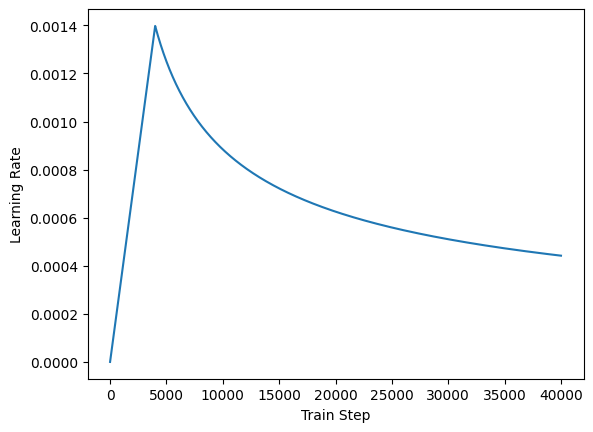

In [61]:
plt.plot(learning_rate(tf.range(40000, dtype=tf.float32)))
plt.ylabel('Learning Rate')
plt.xlabel('Train Step')

Next, you set up the loss. Since the target sequences are padded, it is important to apply a padding mask when calculating the loss.

You will use the sparse categorical cross-entropy loss function (`tf.keras.losses.SparseCategoricalCrossentropy`) and set the parameter `from_logits` to False since the Transformer does not output raw logits since the last layer has a softmax activation:

In [62]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, reduction='none')

def masked_loss(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)


train_loss = tf.keras.metrics.Mean(name='train_loss')

# Here you will store the losses, so you can later plot them
losses = []

Now you can define your custom training function. If you are not very advanced with tensorflow, you can understand this function as an alternative to using `model.compile()` and `model.fit()`, but with added extra flexibility.

In [63]:
@tf.function
def train_step(model, inp, tar):
    """
    One training step for the transformer
    Arguments:
        inp (tf.Tensor): Input data to summarize
        tar (tf.Tensor): Target (summary)
    Returns:
        None
    """
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]

    # Create masks
    enc_padding_mask = create_padding_mask(inp)
    look_ahead_mask = create_look_ahead_mask(tf.shape(tar_inp)[1])
    dec_padding_mask = create_padding_mask(inp) # Notice that both encoder and decoder padding masks are equal

    with tf.GradientTape() as tape:
        predictions, _ = model(
            inp,
            tar_inp,
            True,
            enc_padding_mask,
            look_ahead_mask,
            dec_padding_mask
        )
        loss = masked_loss(tar_real, predictions)

    gradients = tape.gradient(loss, transformer.trainable_variables)
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

    train_loss(loss)

Now you are ready for training the model. But before starting the training, you can also define one more set of functions to perform the inference. Because you are using a custom training loop, you can do whatever you want between the training steps. And wouldnt't it be fun to see after each epoch some examples of how the model performs?

## Summarization

The last thing you will implement is inference. With this, you will be able to produce actual summaries of the documents. You will use a simple method called greedy decoding, which means you will predict one word at a time and append it to the output. You will start with an `[SOS]` token and repeat the word by word inference until the model returns you the `[EOS]` token or until you reach the maximum length of the sentence (you need to add this limit, otherwise a poorly trained model could give you infinite sentences without ever producing the `[EOS]` token.


Write a helper function that predicts the next word, so you can use it to write the whole sentences. Hint: this is very similar to what happens in the train_step, but you have to set the training of the model to False.

In [64]:
def next_word(model, encoder_input, output):
    """
    Helper function for summarization that uses the model to predict just the next word.
    Arguments:
        encoder_input (tf.Tensor): Input data to summarize
        output (tf.Tensor): (incomplete) target (summary)
    Returns:
        predicted_id (tf.Tensor): The id of the predicted word
    """
    # Create a padding mask for the input (encoder)
    enc_padding_mask = create_padding_mask(encoder_input)

    # Create a look-ahead mask for the output
    look_ahead_mask = create_look_ahead_mask(tf.shape(output)[1])

    # Create a padding mask for the input (decoder)
    dec_padding_mask = create_padding_mask(encoder_input)

    # Run the prediction of the next word with the transformer model
    predictions, attention_weights = model.call(encoder_input, output, training=False,
                                                enc_padding_mask=enc_padding_mask,
                                                look_ahead_mask=look_ahead_mask,
                                                dec_padding_mask=dec_padding_mask)

    predictions = predictions[:, -1:, :]
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    return predicted_id


In [65]:
# Take a random sentence as an input
input_document = tokenizer.texts_to_sequences(["a random sentence"])
input_document = tf.keras.preprocessing.sequence.pad_sequences(input_document, maxlen=encoder_maxlen, padding='post', truncating='post')
encoder_input = tf.expand_dims(input_document[0], 0)

# Take the start of sentence token as the only token in the output to predict the next word
output = tf.expand_dims([tokenizer.word_index["[SOS]"]], 0)

# predict the next word with your function
predicted_token = next_word(transformer, encoder_input, output)
print(f"Predicted token: {predicted_token}")

predicted_word = tokenizer.sequences_to_texts(predicted_token.numpy())[0]
print(f"Predicted word: {predicted_word}")

Predicted token: [[30832]]
Predicted word: hahahaha😂😂😂😂😂😂😂


In [66]:
def summarize(model, input_document):
    """
    A function for summarization using the transformer model
    Arguments:
        input_document (tf.Tensor): Input data to summarize
    Returns:
        _ (str): The summary of the input_document
    """
    input_document = tokenizer.texts_to_sequences([input_document])
    input_document = tf.keras.preprocessing.sequence.pad_sequences(input_document, maxlen=encoder_maxlen, padding='post', truncating='post')
    encoder_input = tf.expand_dims(input_document[0], 0)

    output = tf.expand_dims([tokenizer.word_index["[SOS]"]], 0)

    for i in range(decoder_maxlen):
        predicted_id = next_word(model, encoder_input, output)
        output = tf.concat([output, predicted_id], axis=-1)

        if predicted_id == tokenizer.word_index["[EOS]"]:
            break

    return tokenizer.sequences_to_texts(output.numpy())[0]  # since there is just one translated document

Now you can already summarize a sentence! But beware, since the model was not yet trained at all, it will just produce nonsense.

In [67]:
training_set_example = 0

# Check a summary of a document from the training set
print('Training set example:')
print(document[training_set_example])
print('\nHuman written summary:')
print(summary[training_set_example])
print('\nModel written summary:')
summarize(transformer, document[training_set_example])

Training set example:
[SOS] amanda: i baked  cookies. do you want some?  jerry: sure!  amanda: i'll bring you tomorrow :-) [EOS]

Human written summary:
[SOS] amanda baked cookies and will bring jerry some tomorrow. [EOS]

Model written summary:


"[SOS] hahahaha😂😂😂😂😂😂😂 recheck messing messing amanda bettina affected die amanda tomasz electoral pranksters time… hahhah 👍👍20th moaning taht coctails helicoptered wild' mock venezia 👱\u200d♀️ taht north north wrapped wrapped wrapped maybelline fluffly clarissa's developments developments developments developments offering developments tvs developments haemorrhoids maybelline 00pm spuds denon elary sorbonne carey's pressing sauté"

## Train the model

Now you can finally train the model. Below is a loop that will train your model for 20 epochs. note that it should take about 30 seconds per epoch (with the exception of the first few epochs which can take a few minutes each).

Note that after each epoch you perform the summarization on one of the sentences in the test set and print it out, so you can see how your model is improving.

In [68]:
# Take an example from the test set, to monitor it during training
test_example = 0
true_summary = summary_test[test_example]
true_document = document_test[test_example]

# Define the number of epochs
epochs = 20

# Training loop
for epoch in range(epochs):

    start = time.time()
    train_loss.reset_states()
    number_of_batches=len(list(enumerate(dataset)))

    for (batch, (inp, tar)) in enumerate(dataset):
        print(f'Epoch {epoch+1}, Batch {batch+1}/{number_of_batches}', end='\r')
        train_step(transformer, inp, tar)

    print (f'Epoch {epoch+1}, Loss {train_loss.result():.4f}')
    losses.append(train_loss.result())

    print (f'Time taken for one epoch: {time.time() - start} sec')
    print('Example summarization on the test set:')
    print('  True summarization:')
    print(f'    {true_summary}')
    print('  Predicted summarization:')
    print(f'    {summarize(transformer, true_document)}\n')

Epoch 1, Loss 7.8951
Time taken for one epoch: 56.956461668014526 sec
Example summarization on the test set:
  True summarization:
    [SOS] hannah needs betty's number but amanda doesn't have it. she needs to contact larry. [EOS]
  Predicted summarization:
    [SOS] [EOS]

Epoch 2, Loss 6.5896
Time taken for one epoch: 26.31610369682312 sec
Example summarization on the test set:
  True summarization:
    [SOS] hannah needs betty's number but amanda doesn't have it. she needs to contact larry. [EOS]
  Predicted summarization:
    [SOS] is going to the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the

Epoch 3, Loss 6.0232
Time taken for one epoch: 24.21371102333069 sec
Example summarization on the test set:
  True summarization:
    [SOS] hannah needs betty's number but amanda doesn't have it. she needs to contact larry. [EOS]
  Predicted summarization:


Plot the loss funtion.

Text(0.5, 0, 'Epoch')

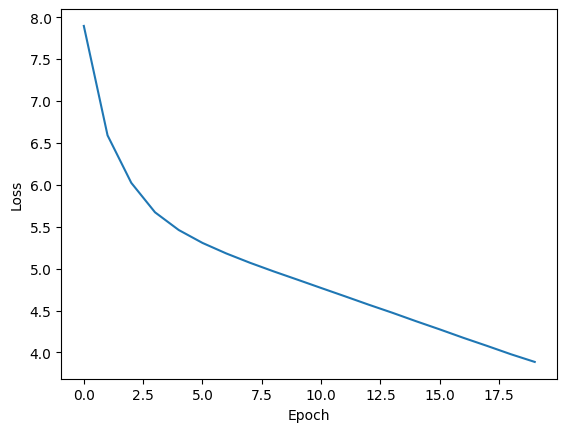

In [69]:
plt.plot(losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

## Summarize some Sentences!

Below you can see an example of summarization of a sentence from the training set and a sentence from the test set. See if you notice anything interesting about them!

In [70]:
training_set_example = 0

# Check a summary of a document from the training set
print('Training set example:')
print(document[training_set_example])
print('\nHuman written summary:')
print(summary[training_set_example])
print('\nModel written summary:')
print(summarize(transformer, document[training_set_example]))

Training set example:
[SOS] amanda: i baked  cookies. do you want some?  jerry: sure!  amanda: i'll bring you tomorrow :-) [EOS]

Human written summary:
[SOS] amanda baked cookies and will bring jerry some tomorrow. [EOS]

Model written summary:
[SOS] amanda will bring some milk and bring some bread tomorrow [EOS]


In [71]:
test_set_example = 3

# Check a summary of a document from the test set
print('Test set example:')
print(document_test[test_set_example])
print('\nHuman written summary:')
print(summary_test[test_set_example])
print('\nModel written summary:')
print(summarize(transformer, document_test[test_set_example]))

Test set example:
[SOS] will: hey babe, what do you want for dinner tonight?  emma:  gah, don't even worry about it tonight  will: what do you mean? everything ok?  emma: not really, but it's ok, don't worry about cooking though, i'm not hungry  will: well what time will you be home?  emma: soon, hopefully  will: you sure? maybe you want me to pick you up?  emma: no no it's alright. i'll be home soon, i'll tell you when i get home.   will: alright, love you.   emma: love you too.  [EOS]

Human written summary:
[SOS] emma will be home soon and she will let will know. [EOS]

Model written summary:
[SOS] emma will pick up tonight at home tonight [EOS]


If you critically examine the output of the model, you can notice a few things:
 - In the training set the model output is (almost) identical to the real output (already after 20 epochs and even more so with more epochs). This might be because the training set is relatively small and the model is relatively big and has thus learned the sentences in the training set by heart (overfitting).
 - While the performance on the training set looks amazing, it is not so good on the test set. The model overfits, but fails to generalize. Again an easy candidate to blame is the small training set and a comparatively large model, but there might be a variety of other factors.
 - Look at the test set example 3 and its summarization. Would you summarize it the same way as it is written here? Sometimes the data may be ambiguous. And the training of **your model can only be as good as your data**.

Here you only use a small dataset, to show that something can be learned in a reasonable amount of time in a relatively small environment. Generally, large transformers are trained on more than one task and on very large quantities of data to achieve superb performance.